# __Stay or Go: Predicting and Understanding Booking Cancellations__
Purwadhika JC Data Science & Machine Learning Bootcamp Final Project
<br>
<br>
**Alpha Team:**
1. Alexandra Andira (JCDS-2804-015)
2. Vanessa Alexandra (JCDS-2804-014)

<br>

---

## **Business Understanding**
Booking cancellations are a common and persistent challenge in the hospitality industry. These cancellations don’t just affect revenue, they also disrupt room assignments, staff scheduling, and pricing decisions. When guests cancel unpredictably, especially close to their check-in dates, hotels are left with unoccupied rooms, wasted resources, and inaccurate demand forecasting.

To stay competitive, hotels cannot rely solely on reactive responses. Instead, they need proactive and data-driven strategies that can anticipate which reservations are most likely to be canceled. By identifying high-risk bookings early, hotels can take targeted actions such as contacting guests, offering tailored incentives, or adjusting overbooking strategies to minimize the potential impact.

### **Stakeholders**
The impact of booking cancellations goes beyond just one team. It cuts across several key departments in hotel operations:
1. **Revenue Managers**
    
    For instance, rely on accurate demand forecasts to set prices, manage overbooking strategies, and avoid lost revenue.

2. **Front Office**
    
    Manage daily check-ins, guest communications, and daily room schedules, all of which are directly affected by last-minute cancellations.

3. **Housekeeping and Operations**

    Need reliable occupancy projections to allocate cleaning staff, prepare rooms, and manage resources efficiently.

4. **General Managers and Executives**
    
    Focus on overall business performance. Cancellations impact Revenue Per Available Room, occupancy rates, and guest satisfaction.

Each of these stakeholders has a different concern, but they are all connected by one thing: the need to better understand, manage, and reduce cancellations.

### **Problem Overview**
Hotels care deeply about cancellations because the consequences are immediate and measurable. Canceled bookings result in unfulfilled revenue, a drop in room utilization, and operational inefficiencies. These problems are only made worse by the fact that cancellations are not random, they are often influenced by several underlying factors:
1. A guest’s profile can be indicative of cancellation risk. 
2. The timing of the booking, such as how far in advance it was made, also plays a role. 
3. The type of customer, whether they’re an individual traveler or part of a group—and the channel through which the booking was made can also have a significant influence. 
4. Seasonal patterns further complicate the picture, as some months naturally see higher cancellation activity than others.

Understanding these patterns is key to making sense of why cancellations happen and how they can be addressed.

### **Project Purpose/Objective**
The purpose of this analysis is to mitigate the risks associated with booking cancellations by building a machine learning model that predicts the likelihood of a cancellation based on reservation details available at the time of booking. These objectives can be broken down into the following key areas:

1. **Revenue Management and Forecasting**

    Cancellations distort demand forecasts. A room that's booked and then cancelled might cause the hotel to **over-** or **underprice** remaining rooms. Overbooking strategies, while common, are risky without reliable predictions.

    With more accurate predictions, hotels can optimize their pricing strategy and reduce the risk of revenue loss due to poor forecasting.

2. **Inventory and Operational Efficiency**

    By predicting which bookings are likely to result in no-shows or cancellations, hotel staff can better plan room assignments and cleaning schedules, avoid over-preparation, and reallocate resources more efficiently.

3. **Targeted Interventions**

    Predicting cancellations allows hotels to contact at-risk guests early; offering better service, upgrades, or confirmations to reduce the likelihood of cancellations.

    Rather than sending messages or perks to all guests (which is costly), predictions help target only those most likely to cancel.

4. **Reducing Last-Minute Cancellations and Revenue Leakage**

    A cancellation 30 days in advance is manageable. One the night before is not, as a canceled booking close to arrival is often impossible to be refilled, which means perishable inventory loss; that room's potential revenue is gone forever. Predictive models help catch late-stage cancellations earlier, so the room can be resold or reallocated.

5. **Strategic Decision-Making and Dynamic Pricing**
    
    Predictive insights help optimize cancellations policies: Should the hotel tighten or relax its refund windows? What booking sources cancel more? By knowing which kinds of bookings are riskier can influence how aggressively the hotel prices rooms and whether to ask for deposits or full repayment.

In short, frequent and unpredictable hotel booking cancellations disrupts revenue forecasts, room assignments, and operational planning.

Thus, this project aims to develop a machine learning model that predicts the likelihood of a booking being cancelled based on reservation features available at the time of booking. This will help hotels mitigate revenue loss, improve forecast accuracy, and enhance the guest experience through smarter interventions.

## **Analytical Approach** (kasih intro buat EDA)
This project aims to predict whether a hotel booking will be canceled (**`is_canceled`**) using features available at the time of booking. Since the target variable is binary (0 = not canceled, 1 = canceled), this is a **supervised classification problem**.

**Why Classification?**<br>
- The outcome of interest is categorical and mutually exclusive: a booking is either canceled or not.
- The hotel needs actionable decisions (e.g., contact this guest or not), which aligns naturally with classification outputs (probability thresholds or class labels).
- Unlike regression, which predicts a continuous outcome, classification allows us to estimate **cancellation risk** and **prioritize intervention**.

**Suitable Algorithms**<br>
Several machine learning models are suitable for this binary classification task. We focus on a mix of interpretable, baseline, and high-performance ensemble models:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. XGBoost / LightGBM<br>
etc.

**Metric Evaluation**<br>
This project cannot focus on accuracy alone. Metrics that reflect the cost of false predictions are:
- Precision
- Recall
- F1-Score
- ROC AUC
- Confusion Matrix

## **Data Structure Overview**
Data used in this project is Hotel Booking Demand dataset from [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data), originally published alongside a research article by [Antonio et al. (2019)](https://www.sciencedirect.com/science/article/pii/S2352340918315191#bib5). The dataset contains real-world booking data collected from two hotels in Portugal:
1. a resort hotel in region of Algarve, and
2. a city hotel in Lisbon.

The dataset include over **119,000 booking records** and **32 variables**, capturing details from guest demographics and booking channels to pricing, stay duration, and cancellation outcomes.

|Variable               |Type               |Description                |
|:---------------------:|:------------------|:--------------------------|
|adr                    |Numeric            |Average Daily Rate         |
|adults                 |Integer            |Number of adults           |
|agent                  |Categorical        |ID of the travel agency that made the booking|
|arrival_date_day_of_month|Integer          |Day of the month of the arrival date|
|arrival_date_month     |Categorical        |Month of arrival date with 12 categories: "January" to "December"|
|arrival_date_week_number|Integer           |Week number of the arrival date|
|arrival_date_year      |Integer            |Year of arrival date       |
|assigned_room_type     |Categorical        |Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons|
|babies                 |Integer            |Number of babies           |
|booking_changes        |Integer            |Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|children               |Integer            |Number of children         |
|company                |Categorical        |ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designmation for anonymity reasons|
|country                |Categorical        |Country of origin. Categories are represented in the ISO 3135-3:2013 format|
|customer_type          |Categorical        |Type of booking, assuming one of four categories<br><br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group - when the booking is associated to a group;<br>Transient - when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party - when the booking is transient, but is associated to at least other transient booking|
|days_in_waiting_list   |Integer            |Number of days the booking was in the waiting list before it was confirmed to the customer|
|deposit_type           |Categorical        |Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br><br>No Deposit - no deposit was made;<br>Non Refund - a deposit was made in the value of the total stay cost;<br>Refundable - a deposit was made with a value under the total cost of stay.|
|distribution_channel   |Categorical        |Booking distribution channel. The term **"TA"** means **Travel Agents** and **"TO"** means **Tour Operators**|
|hotel                  |Categorical        |hotel type                 |
|**is_canceled (Target)**|Categorical       |Value indicating if the booking was canceled (1) or not (0)|
|is_repeated_guest      |Categorical        |Value indicating if the booking name was from a repeated guest (1) or not (0)|
|lead_time              |Integer            |Number of days that elapsed between the entering date of the booking into the PMS and the arrival date|
|market_segment         |Categorical        |Market segment destination. In categories, the term **"TA"** means **Travel Agents** and **"TO"** means **Tour Operators**|
|meal                   |Categorical        |Type of meal booked. Categories are presented in standard hospitality meal packages:<br><br>Undefined/SC - no meal package;<br>BB - Bed & Breakfast;<br>HB - Half board (breakfast and one other meal - usually dinner);<br>FB - Full board (breakfast, lunch, and dinner)|
|previous_bookings_not_canceled|Integer     |Number of previous bookings not cancelled by the customer prior to the current booking|
|previous_cancellations |Integer            |Number of previous bookings that were cancelled by the customer prior to the current booking|
|required_car_parking_spaces|Integer        |Number of car parking spaces required by the customer|
|reservation_status     |Categorical        |Reservation last status, assuming one of three categories:<br><br>Canceled - booking was canceled by the customer;<br>Check-Out - customer has checked in but already departed;<br>No-Show - customer did not check-in and did inform the hotel of the reason why|
|reservation_status_date|Date               |Date at which the last status was set. This variable can be used in conjunction with the *ReservationStatus* to understand when was the booking canceled or when did the customer checked-out of the hotel|
|reserved_room_type     |Categorical        |Code of room type reerved. Code is presented instead of desgination for anonymity reasons|
|stays_in_weekend_nights|Integer            |Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel|
|stays_in_week_nights   |Integer            |Number or week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|total_of_special_requests|Integer          |Number of special requests made by the customer (e.g. twin bed or high floor)|

<br>
<br>

**Key Characteristics**
- Target variable: is_canceled (1 if the booking was canceled, 0 otherwise)
- Booking information: lead time, booking changes, total nights, deposit type, market segment, etc.
- Customer profile: number of adults, children, babies, repeated guest flag
- Timing variables: arrival year, month, week number, day of the month
- Room and stay details: reserved vs. assigned room type, number of special requests
- Financial variables: average daily rate (ADR), meal plan, distribution channel

## **Import Necessary Libraries**

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno

import pycountry_convert as pc

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.outliers_influence import variance_inflation_factor

from category_encoders import BinaryEncoder

from sklearn.base import clone, BaseEstimator
from sklearn.utils.validation import check_is_fitted
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, 
    AdaBoostClassifier, ExtraTreesClassifier
    )
from sklearn.metrics import (
    classification_report, accuracy_score,
    confusion_matrix, ConfusionMatrixDisplay, 
    recall_score, precision_score,
    roc_auc_score, roc_curve, RocCurveDisplay, 
    f1_score, fbeta_score, make_scorer
    )

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier

import pickle

In [3]:
sns.set_theme(style = 'ticks', palette = 'deep')

## **Import Dataset**

In [4]:
df = pd.read_csv('hotel_bookings.csv')

## **Skimming the Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Using the `.info()` function, we know that there are a total of 32 features in this dataset, including the target, before cleaning. There is one feature, `company`, that mostly contains null values. This feature will be inspected before dropping during cleaning. Other features that also contain null values are `children`, `country`, and `agent`. These rows of entries that contain null values will also be inspected first before dropping during cleaning.

In [6]:
df.head(10)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   
9  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   
7                        27                          1   
8                        27                          1   
9                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   
5                        0                     2       2  ...    No Deposit   
6                        0                     2       2  ...    No Deposit   
7                        0                     2       2  ...    No Deposit   
8                        0                     3       2  ...    No Deposit   
9                        0                     3       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type    adr  \
0    NaN     NaN                    0     Transient    0.0   
1    NaN     NaN                    0     Transient    0.0   
2    NaN     NaN                    0     Transient   75.0   
3  304.0     NaN                    0     Transient   75.0   
4  240.0     NaN                    0     Transient   98.0   
5  240.0     NaN                    0     Transient   98.0   
6    NaN     NaN                    0     Transient  107.0   
7  303.0     NaN                    0     Transient  103.0   
8  240.0     NaN                    0     Transient   82.0   
9   15.0     NaN                    0     Transient  105.5   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   
5                            0                          1           Check-Out   
6                            0                          0           Check-Out   
7                            0                          1           Check-Out   
8                            0                          1            Canceled   
9                            0                          0            Canceled   

  reservation_status_date  
0     

In [7]:
df[df['hotel'] == 'Resort Hotel'].describe()

is_canceled     lead_time  arrival_date_year  \
count  40060.000000  40060.000000       40060.000000   
mean       0.277634     92.675686        2016.121443   
std        0.447837     97.285315           0.722347   
min        0.000000      0.000000        2015.000000   
25%        0.000000     10.000000        2016.000000   
50%        0.000000     57.000000        2016.000000   
75%        1.000000    155.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              40060.000000               40060.000000   
mean                  27.140864                  15.821243   
std                   14.005441                   8.883708   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  24.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             40060.000000          40060.000000  40060.000000   
mean                  1.189815              3.128732      1.867149   
std                   1.147812              2.461329      0.697285   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              3.000000      2.000000   
75%                   2.000000              5.000000      2.000000   
max                  19.000000             50.000000     55.000000   

           children        babies  is_repeated_guest  previous_cancellations  \
count  40060.000000  40060.000000       40060.000000            40060.000000   
mean       0.128682      0.013904           0.044383                0.101722   
std        0.445195      0.118998           0.205948                1.335115   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max       10.000000      2.000000           1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes         agent  \
count                    40060.000000     40060.000000  31851.000000   
mean                         0.146455         0.287968    217.571725   
std                          1.001955         0.726548     88.264489   
min                          0.000000         0.000000      1.000000   
25%                          0.000000         0.000000    240.000000   
50%                          0.000000         0.000000    240.000000   
75%                          0.000000         0.000000    242.000000   
max                         30.000000        17.000000    535.000000   

           company  days_in_waiting_list           adr  \
count  3108.000000          40060.000000  40060.000000   
mean    241.486165              0.527758     94.952930   
std     125.930668              7.428580     61.442418   
min       6.000000              0.000000     -6.380000   
25%     154.000000              0.000000     50.000000   
50%     223.000000              0.000000     75.000000   
75%     330.000000              0.000000    125.000000   
max     543.000000            185.000000    508.000000   

       required_car_parking_spaces  total_of_special_requests  
count                 40060.000000                40060.00000  
mean                      0.138068                    0.61977  
std                       0.351001                    0.81393  
min                       0.000000                    0.00000  
25%                       0.000000                    0.00000  
50%                       0.000000  

In [8]:
df[df['hotel'] == 'City Hotel'].describe()

is_canceled     lead_time  arrival_date_year  \
count  79330.000000  79330.000000       79330.000000   
mean       0.417270    109.735724        2016.174285   
std        0.493111    110.948526           0.699181   
min        0.000000      0.000000        2015.000000   
25%        0.000000     23.000000        2016.000000   
50%        0.000000     74.000000        2016.000000   
75%        1.000000    163.000000        2017.000000   
max        1.000000    629.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              79330.000000               79330.000000   
mean                  27.177449                  15.786625   
std                   13.398523                   8.728451   
min                    1.000000                   1.000000   
25%                   17.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             79330.000000          79330.000000  79330.000000   
mean                  0.795185              2.182957      1.850977   
std                   0.885026              1.456416      0.509292   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              2.000000      2.000000   
75%                   2.000000              3.000000      2.000000   
max                  16.000000             41.000000      4.000000   

           children        babies  is_repeated_guest  previous_cancellations  \
count  79326.000000  79330.000000       79330.000000            79330.000000   
mean       0.091370      0.004941           0.025615                0.079743   
std        0.372177      0.084323           0.157983                0.415472   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max        3.000000     10.000000           1.000000               21.000000   

       previous_bookings_not_canceled  booking_changes         agent  \
count                    79330.000000     79330.000000  71199.000000   
mean                         0.132371         0.187369     28.144721   
std                          1.693411         0.608620     56.432181   
min                          0.000000         0.000000      1.000000   
25%                          0.000000         0.000000      9.000000   
50%                          0.000000         0.000000      9.000000   
75%                          0.000000         0.000000     17.000000   
max                         72.000000        21.000000    509.000000   

           company  days_in_waiting_list           adr  \
count  3689.000000          79330.000000  79330.000000   
mean    145.271618              3.226774    105.304465   
std     119.774134             20.870890     43.602954   
min       8.000000              0.000000      0.000000   
25%      40.000000              0.000000     79.200000   
50%      91.000000              0.000000     99.900000   
75%     219.000000              0.000000    126.000000   
max     497.000000            391.000000   5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                 79330.000000               79330.000000  
mean                      0.024367                   0.546918  
std                       0.154919                   0.780776  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000  

In [9]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

df_desc = pd.DataFrame(columns=['Features', 'dType', 'null', 'null %', '# of unique', 'uniqueSample'],
                     data=listItem)
df_desc

Features    dType    null  null %  # of unique  \
0                            hotel   object       0    0.00            2   
1                      is_canceled    int64       0    0.00            2   
2                        lead_time    int64       0    0.00          479   
3                arrival_date_year    int64       0    0.00            3   
4               arrival_date_month   object       0    0.00           12   
5         arrival_date_week_number    int64       0    0.00           53   
6        arrival_date_day_of_month    int64       0    0.00           31   
7          stays_in_weekend_nights    int64       0    0.00           17   
8             stays_in_week_nights    int64       0    0.00           35   
9                           adults    int64       0    0.00           14   
10                        children  float64       4    0.00            5   
11                          babies    int64       0    0.00            5   
12                            meal   object       0    0.00            5   
13                         country   object     488    0.41          177   
14                  market_segment   object       0    0.00            8   
15            distribution_channel   object       0    0.00            5   
16               is_repeated_guest    int64       0    0.00            2   
17          previous_cancellations    int64       0    0.00           15   
18  previous_bookings_not_canceled    int64       0    0.00           73   
19              reserved_room_type   object       0    0.00           10   
20              assigned_room_type   object       0    0.00           12   
21                 booking_changes    int64       0    0.00           21   
22                    deposit_type   object       0    0.00            3   
23                           agent  float64   16340   13.69          333   
24                         company  float64  112593   94.31          352   
25            days_in_waiting_list    int64       0    0.00          128   
26                   customer_type   object       0    0.00            4   
27                             adr  float64       0    0.00         8879   
28     required_car_parking_spaces    int64       0    0.00            5   
29       total_of_special_requests    int64       0    0.00            6   
30              reservation_status   object       0    0.00            3   
31         reservation_status_date   object       0    0.00          926   

                    uniqueSample  
0     [City Hotel, Resort Hotel]  
1                         [1, 0]  
2                      [253, 67]  
3                   [2017, 2016]  
4               [December, June]  
5                       [16, 37]  
6                        [15, 5]  
7                       [10, 19]  
8                       [32, 22]  
9                        [27, 0]  
10                   [10.0, 3.0]  
11                        [2, 1]  
12                      [BB, FB]  
13                    [MLI, DZA]  
14           [Undefined, Direct]  
15        [Corporate, Undefined]  
16                        [1, 0]  
17                       [24, 5]  
18                      [55, 37]  
19                        [C, E]  
20                        [K, D]  
21                       [0, 11]  
22      [Non Refund, Refundable]  
23                [249.0, 111.0]  
24                [273.0, 342.0]  
25                       [6, 17]  
26  [Transient, Transient-Party]  
27               [86.24, 208.56]  
28                        [1, 0]  
29                        [3, 0]  
30         [Canceled, Check-Out]  
31      [2015-03-05, 2015-08-08]

### Exploring **categorical** features

#### `is_canceled`

In [10]:
df['is_canceled'].unique()

array([0, 1])

In [11]:
df['is_canceled'].value_counts(ascending = False, dropna = False)

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [12]:
df['is_canceled'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

is_canceled
0    62.96
1    37.04
Name: proportion, dtype: float64

The target feature contains **75,166** entries (62.96%) of 0 (not canceled), **44,224** entries (37.04%) of 1 (canceled), and no null values present in this feature. This means that class imbalance is present in this dataset, thus balancing techniques must be applied before proceeding to model construction.

#### `hotel`

In [13]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [14]:
df['hotel'].value_counts(ascending = False, dropna = False)

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [15]:
df['hotel'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

hotel
City Hotel      66.45
Resort Hotel    33.55
Name: proportion, dtype: float64

#### `arrival_date_year`

In [16]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [17]:
df['arrival_date_year'].value_counts(ascending = False, dropna = False)

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

In [18]:
df['arrival_date_year'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

arrival_date_year
2016    47.50
2017    34.08
2015    18.42
Name: proportion, dtype: float64

#### `arrival_date_month`

In [19]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [20]:
df['arrival_date_month'].value_counts(ascending = False, dropna = False)

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

In [21]:
df['arrival_date_month'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

arrival_date_month
August       11.62
July         10.60
May           9.88
October       9.35
April         9.29
June          9.16
September     8.80
March         8.20
February      6.76
November      5.69
December      5.68
January       4.97
Name: proportion, dtype: float64

#### `arrival_date_week_number`

In [22]:
df['arrival_date_week_number'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26])

In [23]:
df['arrival_date_week_number'].value_counts(ascending = False, dropna = False)

arrival_date_week_number
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     1387
3     1319
2     1218
52    1195
1     1047
51     933
Name: count, dtype: int64

In [24]:
df['arrival_date_week_number'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

arrival_date_week_number
33    3.00
30    2.59
32    2.55
34    2.55
18    2.45
21    2.39
28    2.39
17    2.35
20    2.33
29    2.31
42    2.31
31    2.30
41    2.26
15    2.25
27    2.23
25    2.23
38    2.23
23    2.20
35    2.17
39    2.16
22    2.13
24    2.09
13    2.02
16    2.01
19    2.01
40    2.01
26    2.00
43    1.97
44    1.90
14    1.90
37    1.87
8     1.86
36    1.82
10    1.80
9     1.77
7     1.77
12    1.74
11    1.73
45    1.63
53    1.52
49    1.49
47    1.41
46    1.32
6     1.26
50    1.26
48    1.26
4     1.25
5     1.16
3     1.10
2     1.02
52    1.00
1     0.88
51    0.78
Name: proportion, dtype: float64

#### `arrival_date_day_of_month`

In [25]:
df['arrival_date_day_of_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [26]:
df['arrival_date_day_of_month'].value_counts(ascending = False, dropna = False)

arrival_date_day_of_month
17    4406
5     4317
15    4196
25    4160
26    4147
9     4096
12    4087
16    4078
2     4055
19    4052
20    4032
18    4002
24    3993
28    3946
8     3921
3     3855
30    3853
6     3833
14    3819
27    3802
21    3767
4     3763
13    3745
7     3665
1     3626
23    3616
11    3599
22    3596
29    3580
10    3575
31    2208
Name: count, dtype: int64

In [27]:
df['arrival_date_day_of_month'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

arrival_date_day_of_month
17    3.69
5     3.62
15    3.51
25    3.48
26    3.47
9     3.43
12    3.42
16    3.42
2     3.40
19    3.39
20    3.38
18    3.35
24    3.34
28    3.31
8     3.28
3     3.23
30    3.23
6     3.21
14    3.20
27    3.18
21    3.16
4     3.15
13    3.14
7     3.07
1     3.04
23    3.03
11    3.01
22    3.01
29    3.00
10    2.99
31    1.85
Name: proportion, dtype: float64

#### `meal`

In [28]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [29]:
df['meal'].value_counts(ascending = False, dropna = False)

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [30]:
df['meal'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

meal
BB           77.32
HB           12.11
SC            8.92
Undefined     0.98
FB            0.67
Name: proportion, dtype: float64

#### `country`

In [31]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [32]:
df['country'].value_counts(ascending = False, dropna = False)

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 178, dtype: int64

In [33]:
df['country'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

country
PRT    40.70
GBR    10.16
FRA     8.72
ESP     7.18
DEU     6.10
       ...  
MRT     0.00
KIR     0.00
SDN     0.00
ATF     0.00
SLE     0.00
Name: proportion, Length: 178, dtype: float64

#### `market_segment`

In [34]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [35]:
df['market_segment'].value_counts(ascending = False, dropna = False)

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [36]:
df['market_segment'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

market_segment
Online TA        47.30
Offline TA/TO    20.29
Groups           16.59
Direct           10.56
Corporate         4.44
Complementary     0.62
Aviation          0.20
Undefined         0.00
Name: proportion, dtype: float64

#### `distribution_channel`

In [37]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [38]:
df['distribution_channel'].value_counts(ascending = False, dropna = False)

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

In [39]:
df['distribution_channel'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

distribution_channel
TA/TO        81.98
Direct       12.27
Corporate     5.59
GDS           0.16
Undefined     0.00
Name: proportion, dtype: float64

#### `is_repeated_guest`

In [40]:
df['is_repeated_guest'].unique()

array([0, 1])

In [41]:
df['is_repeated_guest'].value_counts(ascending = False, dropna = False)

is_repeated_guest
0    115580
1      3810
Name: count, dtype: int64

In [42]:
df['is_repeated_guest'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

is_repeated_guest
0    96.81
1     3.19
Name: proportion, dtype: float64

#### `reserved_room_type`

In [43]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [44]:
df['reserved_room_type'].value_counts(ascending = False, dropna = False)

reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64

In [45]:
df['reserved_room_type'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

reserved_room_type
A    72.03
D    16.08
E     5.47
F     2.43
G     1.75
B     0.94
C     0.78
H     0.50
P     0.01
L     0.01
Name: proportion, dtype: float64

#### `assigned_room_type`

In [46]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [47]:
df['assigned_room_type'].value_counts(ascending = False, dropna = False)

assigned_room_type
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: count, dtype: int64

In [48]:
df['assigned_room_type'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

assigned_room_type
A    62.03
D    21.21
E     6.54
F     3.14
G     2.14
C     1.99
B     1.81
H     0.60
I     0.30
K     0.23
P     0.01
L     0.00
Name: proportion, dtype: float64

#### `deposit_type`

In [49]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [50]:
df['deposit_type'].value_counts(ascending = False, dropna = False)

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

In [51]:
df['deposit_type'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

deposit_type
No Deposit    87.65
Non Refund    12.22
Refundable     0.14
Name: proportion, dtype: float64

#### `customer_type`

In [52]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [53]:
df['customer_type'].value_counts(ascending = False, dropna = False)

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

In [54]:
df['customer_type'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

customer_type
Transient          75.06
Transient-Party    21.04
Contract            3.41
Group               0.48
Name: proportion, dtype: float64

#### `reservation_status`

In [55]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [56]:
df['reservation_status'].value_counts(ascending = False, dropna = False)

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

In [57]:
df['reservation_status'].value_counts(normalize = True, ascending = False, dropna = False).mul(100).round(2)

reservation_status
Check-Out    62.96
Canceled     36.03
No-Show       1.01
Name: proportion, dtype: float64

### Exploring **numerical** features

#### **Summary**

In [58]:
numeric_cols = []

#### **`adr`**

In [59]:
reserved_adr = df.groupby('reserved_room_type')['adr'].mean()
print("Average ADR by Reserved Room Type:")
print(reserved_adr)

Average ADR by Reserved Room Type:
reserved_room_type
A     90.796658
B     90.360447
C    160.216792
D    120.682882
E    124.540179
F    167.689651
G    175.996027
H    188.223111
L    124.666667
P      0.000000
Name: adr, dtype: float64


In [60]:
assigned_adr = df.groupby('assigned_room_type')['adr'].mean()
print("\nAverage ADR by Assigned Room Type:")
print(assigned_adr)


Average ADR by Assigned Room Type:
assigned_room_type
A     93.142347
B     94.450264
C    113.423583
D    107.453633
E    117.704224
F    151.889931
G    166.530309
H    171.380772
I     40.843774
K     53.698889
L      8.000000
P      0.000000
Name: adr, dtype: float64


In [61]:
df[['hotel', 'is_canceled', 'customer_type', 'adr', 'reserved_room_type', 'assigned_room_type', 'reservation_status']].sort_values(by = 'adr', ascending = True).head(50)

hotel  is_canceled    customer_type   adr reserved_room_type  \
14969   Resort Hotel            0  Transient-Party -6.38                  A   
60651     City Hotel            1        Transient  0.00                  P   
94383     City Hotel            0        Transient  0.00                  A   
42273     City Hotel            0        Transient  0.00                  E   
94378     City Hotel            0        Transient  0.00                  A   
94377     City Hotel            0        Transient  0.00                  A   
74709     City Hotel            0        Transient  0.00                  A   
74708     City Hotel            0        Transient  0.00                  D   
74707     City Hotel            0        Transient  0.00                  A   
74706     City Hotel            0        Transient  0.00                  A   
74705     City Hotel            0        Transient  0.00                  A   
84481     City Hotel            0        Transient  0.00                  A   
76831     City Hotel            0  Transient-Party  0.00                  A   
26765   Resort Hotel            0        Transient  0.00                  E   
76837     City Hotel            0        Transient  0.00                  A   
76836     City Hotel            0        Transient  0.00                  A   
98038     City Hotel            0  Transient-Party  0.00                  A   
79007     City Hotel            0  Transient-Party  0.00                  A   
94391     City Hotel            0        Transient  0.00                  F   
94390     City Hotel            0        Transient  0.00                  D   
94389     City Hotel            0        Transient  0.00                  E   
94382     City Hotel            0        Transient  0.00                  A   
94381     City Hotel            0        Transient  0.00                  A   
94380     City Hotel            0        Transient  0.00                  D   
65522     City Hotel            1        Transient  0.00                  A   
79006     City Hotel            1        Transient  0.00                  A   
94388     City Hotel            1  Transient-Party  0.00                  D   
94387     City Hotel            1  Transient-Party  0.00                  D   
105298    City Hotel            0        Transient  0.00                  A   
84488     City Hotel            1        Transient  0.00                  A   
94379     City Hotel            1        Transient  0.00                  A   
103078    City Hotel            0        Transient  0.00                  G   
94392     City Hotel            0        Transient  0.00                  F   
84447     City Hotel            0        Transient  0.00                  D   
84446     City Hotel            0        Transient  0.00                  A   
79005     City Hotel            1        Transient  0.00                  A   
38776   Resort Hotel            0        Transient  0.00                  A   
168     Resort Hotel            0        Transient  0.00                  E   
167     Resort Hotel            0        Transient  0.00                  A   
13889   Resort Hotel            0        Transient  0.00                  F   
42307     City Hotel            0  Transient-Party  0.00                  A   
29268   Resort Hotel            0        Transient  0.00                  E   
103065    City Hotel            0        Transient  0.00                  A   
103061    City Hotel            0        Transient  0.00                  A   
84500     City Hotel            0  Transient-Party  0.00                  A   
84497     City Hotel            0  Transient-Party  0.00                  A   
94386     City Hotel            0        Transient  0.00                  D   
94385     City Hotel            1        Transient  0.00                  F   
94384     City Hotel            0        Transient  0.00                  A   
91220     City Hotel            1        Transient  0.00         

#### **`children`**

In [62]:
df['children'].describe()

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [63]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

## **Data Cleaning**

### **Handling Missing Values**

<Axes: >

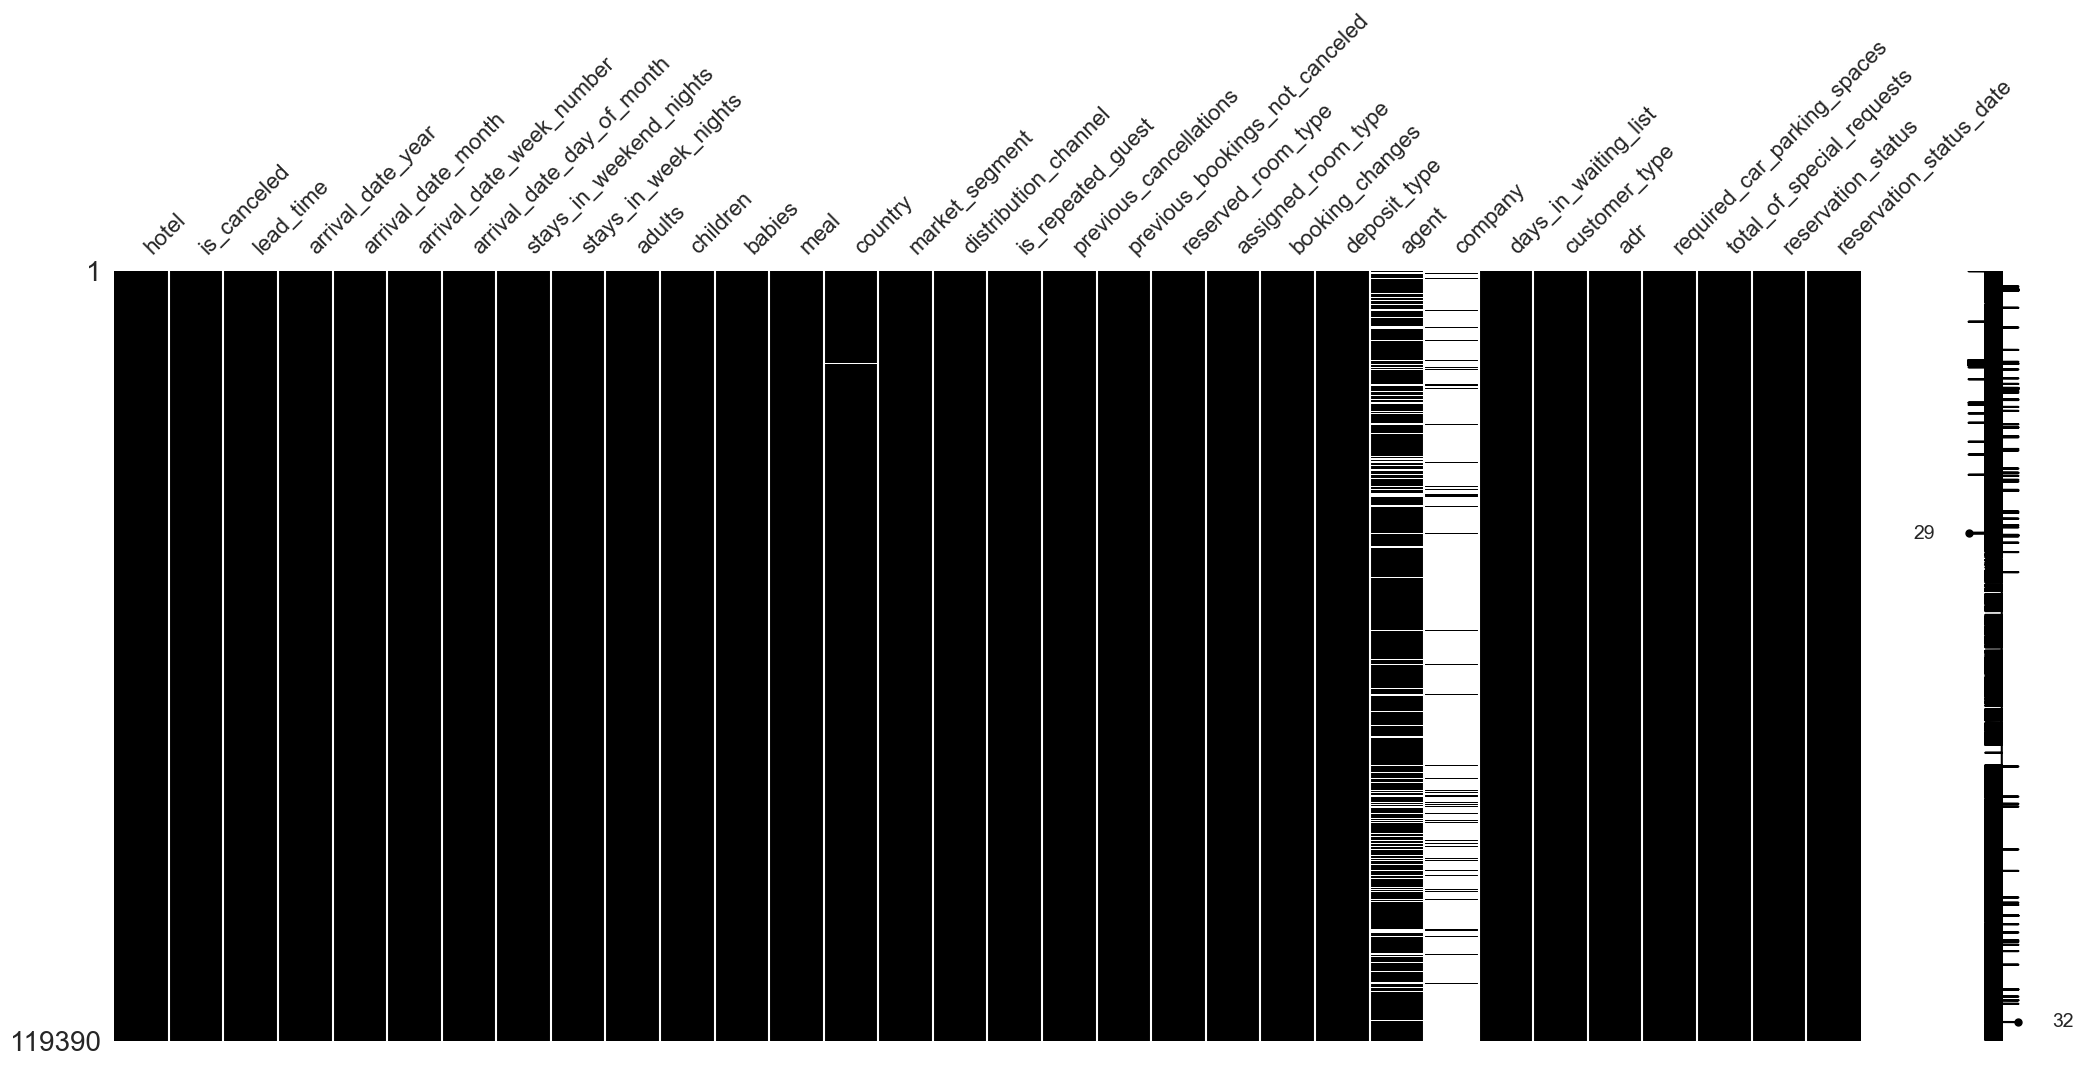

In [64]:
msno.matrix(df, color = (0, 0, 0))

<Axes: >

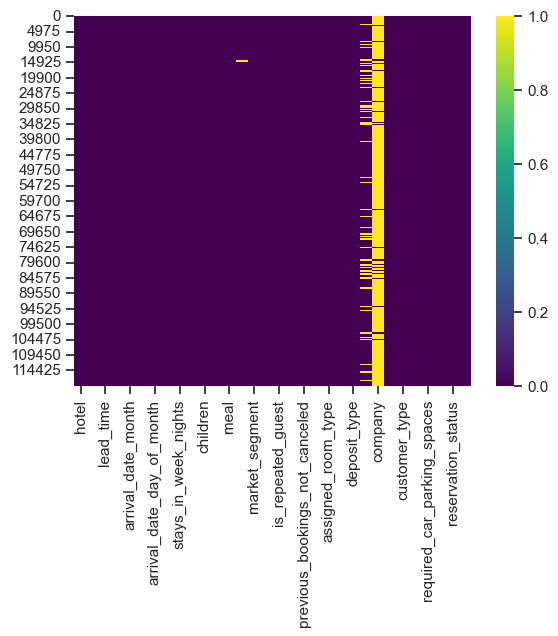

In [65]:
sns.heatmap(df.isna(), cbar = True, cmap = 'viridis')

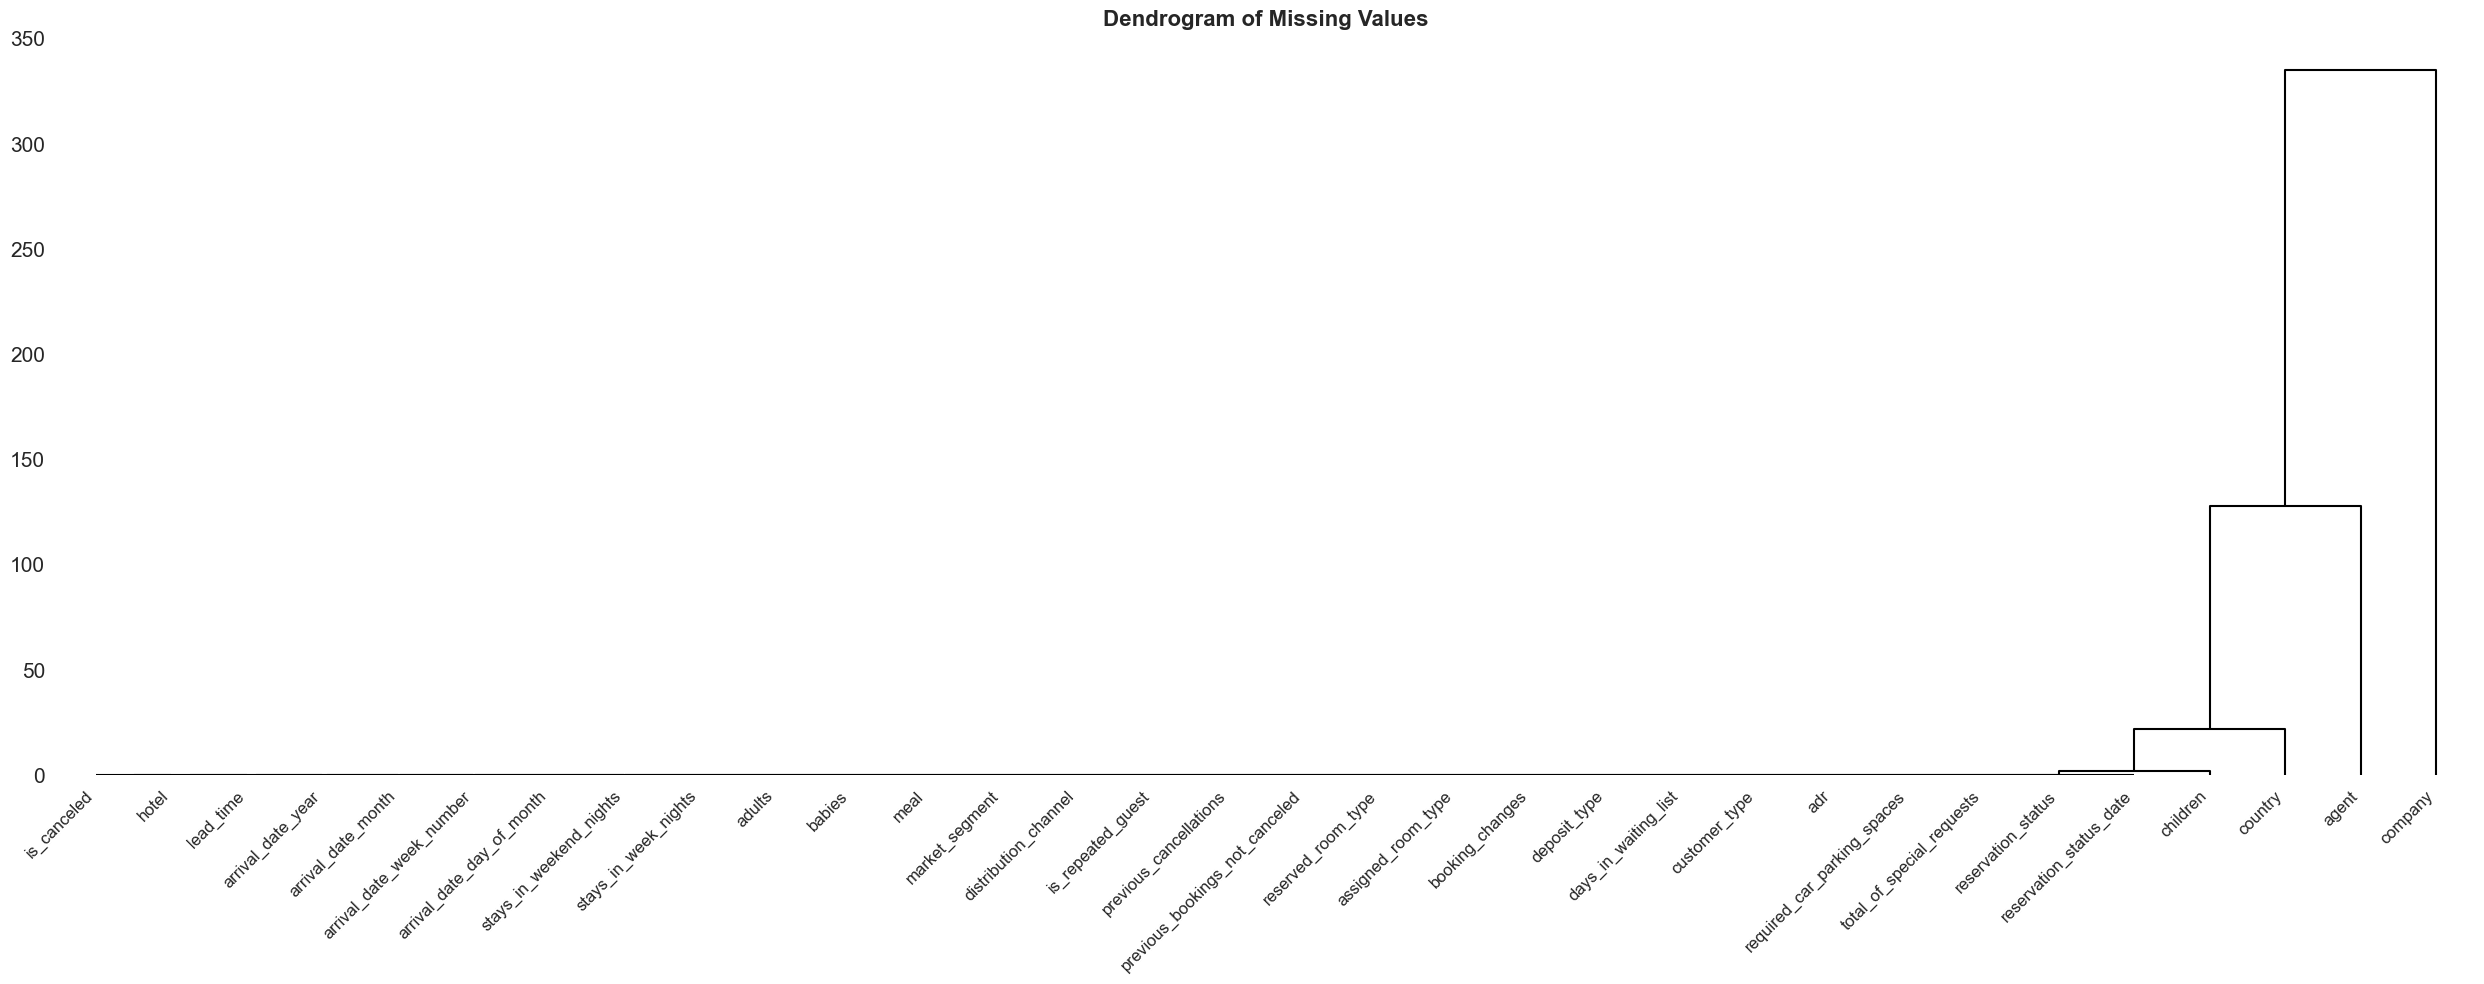

In [66]:
msno.dendrogram(df, orientation = 'top', fontsize = 12)
plt.title('Dendrogram of Missing Values', fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [67]:
missing_val = df.isnull().sum()
missing_pct = (missing_val / len(df)).mul(100).round(2)

missing_summary = pd.DataFrame({
    'Column': missing_val.index,
    '# of Missing': missing_val.values,
    'Percentage (%)': missing_pct.values
})

# Filter hanya kolom yang memiliki missing value
missing_summary = missing_summary[missing_summary['# of Missing'] > 0]

# Urutkan dari yang paling banyak missing-nya
missing_summary = missing_summary.sort_values(by='# of Missing', ascending=False).reset_index(drop=True)

# Tampilkan
missing_summary


Column  # of Missing  Percentage (%)
0   company        112593           94.31
1     agent         16340           13.69
2   country           488            0.41
3  children             4            0.00

Since `company` and `agent` have missing values greater than 10%, dropping the columns would be necessary.

In [68]:
df = df.drop(columns = ['company', 'agent'])

In [69]:
cols_with_undefined = ['market_segment', 'distribution_channel']

undefined_summary = []

for col in cols_with_undefined:
    total = len(df)
    count = (df[col] == 'Undefined').sum()
    percent = (count / total) * 100
    undefined_summary.append({
        'Column': col,
        '# of Undefined': count,
        'Percentage (%)': percent
    })

undefined_df = pd.DataFrame(undefined_summary).sort_values(by='# of Undefined', ascending=False).reset_index(drop=True)

undefined_df


Column  # of Undefined  Percentage (%)
0  distribution_channel               5        0.004188
1        market_segment               2        0.001675

In [70]:
# Replace 'Undefined' with NaN in those columns
df[cols_with_undefined] = df[cols_with_undefined].replace('Undefined', np.nan)

In [71]:
df[cols_with_undefined].isnull().sum()

market_segment          2
distribution_channel    5
dtype: int64

In [72]:
missing_val = df.isnull().sum()
missing_pct = (missing_val / len(df)).mul(100).round(2)

missing_summary = pd.DataFrame({
    'Column': missing_val.index,
    '# of Missing': missing_val.values,
    'Percentage (%)': missing_pct.values
})

# Filter hanya kolom yang memiliki missing value
missing_summary = missing_summary[missing_summary['# of Missing'] > 0]

# Urutkan dari yang paling banyak missing-nya
missing_summary = missing_summary.sort_values(by='# of Missing', ascending=False).reset_index(drop=True)

# Tampilkan
missing_summary

Column  # of Missing  Percentage (%)
0               country           488            0.41
1  distribution_channel             5            0.00
2              children             4            0.00
3        market_segment             2            0.00

In [73]:
df = df.dropna()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118897 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118897 non-null  object 
 1   is_canceled                     118897 non-null  int64  
 2   lead_time                       118897 non-null  int64  
 3   arrival_date_year               118897 non-null  int64  
 4   arrival_date_month              118897 non-null  object 
 5   arrival_date_week_number        118897 non-null  int64  
 6   arrival_date_day_of_month       118897 non-null  int64  
 7   stays_in_weekend_nights         118897 non-null  int64  
 8   stays_in_week_nights            118897 non-null  int64  
 9   adults                          118897 non-null  int64  
 10  children                        118897 non-null  float64
 11  babies                          118897 non-null  int64  
 12  meal                 

### **Checking for Outliers**
Outliers are extreme values that deviate significantly from the rest of the data. In the Hotel Booking Demand dataset, not all extreme values are errors — some may represent rare but valid cases. Therefore, we apply domain-informed, column-specific logic to identify and handle potential outliers responsibly.

> **Does this extreme value make sense in context?**
> - 0 adults for a booking - likely an error
> - ADR of 5400 - very high but maybe a luxury stay (check hotel type, room type, or market segment first)

**Columns Considered for Outlier Detection**
The following numeric columns were analyzed for outliers:
- `adr` (Average Daily Rate)
- `lead_time` (Days between booking and arrival)
- `stays_in_week_nights`
- `stays_in_weekend_nights`
- `adults`
- `children`
- `babies`

#### **Boxplot Visualisation**

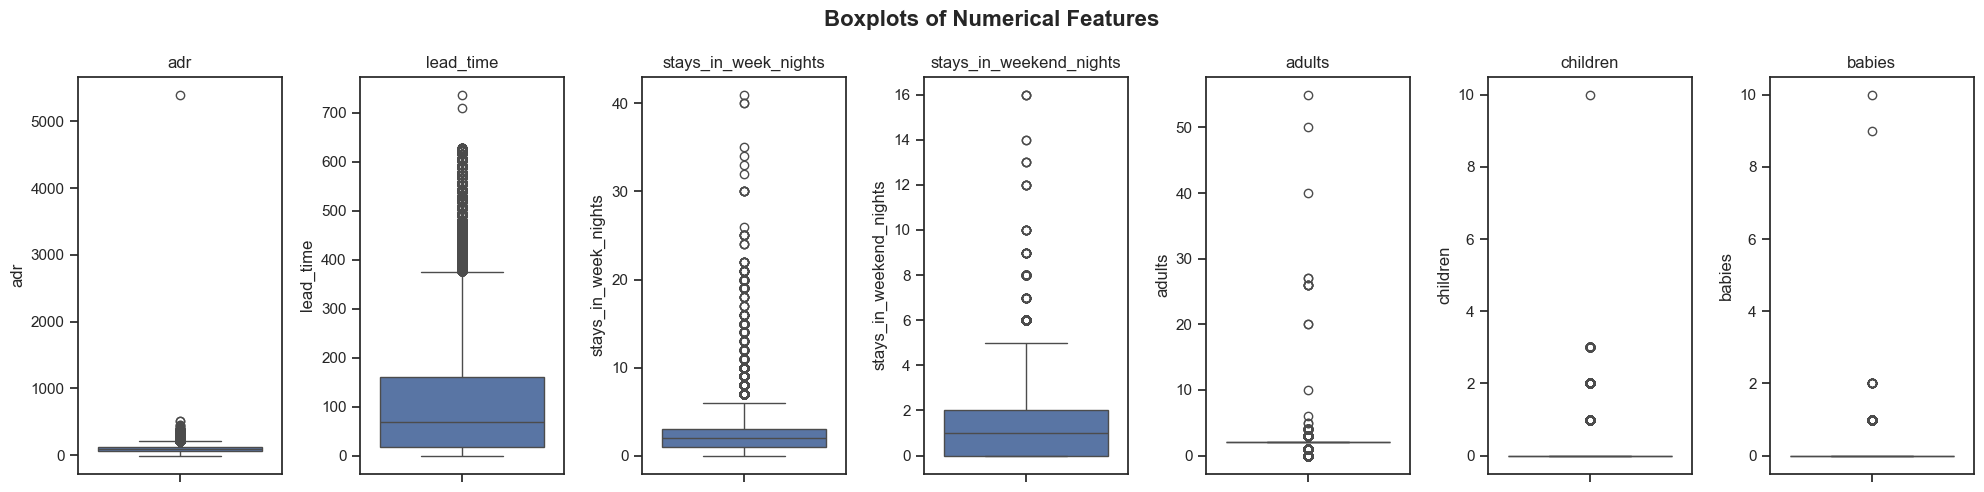

In [75]:
cols = ['adr', 'lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights', 'adults', 'children', 'babies']

# Create subplots
fig, axes = plt.subplots(nrows = 1, ncols = len(cols), figsize = (20, 5))

for i, col in enumerate(cols):
    sns.boxplot(y = df[col], ax = axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

plt.suptitle('Boxplots of Numerical Features', fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.show()

Based on the boxplots above, here are the observations:
1. `adr` (Average Daily Rate)
    - **Outliers**: Extreme outliers > 1000, with one above 5000 EUR
    - **Action**: Consider capping at 99th percentile or setting a threshold (e.g. 1000 EUR). Also check if those outliers were cancelled or fully paid - they could be fraud or data entry issues.
2. `lead_time`
    - **Outliers**: many booking > 365 days (1 year), some > 700.
    - **Action**: Review values > 500 days. Could be long-term planning or unrealistic entries. Either cap or keep for segmentation(e.g., tour operators may book far ahead).
3. `stays_in_week_nights`
    - **Outliers**: Several stays > 20 nights, some reaching 40+.
    - **Action**: Check booking channels — corporate or long-term stays? You could cap at 95th percentile or treat as a special segment.
4. `stays_in_weekend_nights`
    - **Outliers**: Fewer than weeknights, but some stay > 10 weekend nights.
    - **Action**: Rare but not implausible. Might be retained unless they skew averages.
5. `adults`
    - **Outliers**: Values > 10, some up to 50+.
    - **Action**: Bookings with 20–50 adults are likely group bookings or errors. Cross-check with children, babies, and total_of_special_requests. You might cap or exclude values above 10–15.
6. `children` and `babies`
    - **Outliers**: Rare, but some bookings with 8+ children or 10 babies.
    - **Action**: Could be family tours, or bad data. If unsure, cap at 5 or flag them separately.

#### **Interquartile Range**
For each numeric column, we used the IQR method to flag values that fall outside the range: <br>
$$Q1 - 1.5*IQR, Q3 + 1.5*IQR$$

In [76]:
# Select numerical columns to check
cols = ['adr', 'lead_time', 'stays_in_week_nights',
        'stays_in_weekend_nights', 'adults', 'children', 'babies']

# Initialize summary list
summary = []

# Loop through each column
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    p99 = df[col].quantile(0.99)
    
    below = (df[col] < lower).sum()
    above = (df[col] > upper).sum()

    summary.append({
        'Variable': col,
        'Lower Bound': round(lower, 2),
        'Upper Bound': round(upper, 2),
        'Below Lower Bound (count)': below,
        'Above Upper Bound (count)': above,
        '99th Percentile': round(p99, 2)
    })

# Create summary DataFrame
outlier_summary = pd.DataFrame(summary)
outlier_summary


Variable  Lower Bound  Upper Bound  \
0                      adr        -14.0        210.0   
1                lead_time       -196.5        375.5   
2     stays_in_week_nights         -2.0          6.0   
3  stays_in_weekend_nights         -3.0          5.0   
4                   adults          2.0          2.0   
5                 children          0.0          0.0   
6                   babies          0.0          0.0   

   Below Lower Bound (count)  Above Upper Bound (count)  99th Percentile  
0                          0                       3883            252.0  
1                          0                       2982            444.0  
2                          0                       3341             10.0  
3                          0                        263              4.0  
4                      23128                       6275              3.0  
5                          0                       8578              2.0  
6                          0                        914              0.0

In [77]:
def slice_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    below_df = df[df[col] < lower]
    above_df = df[df[col] > upper]
    
    print(f"\nVariable: {col}")
    print(f"Lower bound: {round(lower, 2)}, Upper bound: {round(upper, 2)}")
    print(f"Below lower bound: {len(below_df)} rows")
    print(f"Above upper bound: {len(above_df)} rows")
    
    return below_df, above_df

In [78]:
adr_below, adr_above = slice_outliers(df, 'adr')

# Inspect results
adr_above[['adr', 'hotel', 'is_canceled', 'market_segment', 'reserved_room_type', 'assigned_room_type', 'reservation_status']]


Variable: adr
Lower bound: -14.0, Upper bound: 210.0
Below lower bound: 0 rows
Above upper bound: 3883 rows


adr         hotel  is_canceled market_segment reserved_room_type  \
140     225.00  Resort Hotel            0      Online TA                  G   
303     213.75  Resort Hotel            0         Direct                  G   
396     230.67  Resort Hotel            0         Direct                  H   
412     216.13  Resort Hotel            0      Online TA                  H   
523     249.00  Resort Hotel            0         Direct                  C   
...        ...           ...          ...            ...                ...   
119251  235.00    City Hotel            0      Online TA                  F   
119289  236.33    City Hotel            0      Online TA                  E   
119339  229.00    City Hotel            0         Direct                  D   
119365  266.75    City Hotel            0         Direct                  G   
119386  225.43    City Hotel            0      Online TA                  E   

       assigned_room_type reservation_status  
140                     G          Check-Out  
303                     G          Check-Out  
396                     G          Check-Out  
412                     H          Check-Out  
523                     C          Check-Out  
...                   ...                ...  
119251                  F          Check-Out  
119289                  F          Check-Out  
119339                  D          Check-Out  
119365                  G          Check-Out  
119386                  E          Check-Out  

[3883 rows x 7 columns]

In [79]:
lead_time_below, lead_time_above = slice_outliers(df, 'lead_time')

# Inspect results
lead_time_above[['lead_time', 'hotel', 'is_canceled', 'market_segment', 'reserved_room_type', 'assigned_room_type', 'reservation_status']]


Variable: lead_time
Lower bound: -196.5, Upper bound: 375.5
Below lower bound: 0 rows
Above upper bound: 2982 rows


lead_time         hotel  is_canceled market_segment  \
1             737  Resort Hotel            0         Direct   
225           394  Resort Hotel            0  Offline TA/TO   
890           460  Resort Hotel            0  Offline TA/TO   
1516          381  Resort Hotel            0  Offline TA/TO   
1672          382  Resort Hotel            0  Offline TA/TO   
...           ...           ...          ...            ...   
119102        518    City Hotel            0         Groups   
119107        518    City Hotel            0         Groups   
119109        518    City Hotel            0         Groups   
119111        518    City Hotel            0         Groups   
119148        457    City Hotel            0  Offline TA/TO   

       reserved_room_type assigned_room_type reservation_status  
1                       C                  C          Check-Out  
225                     D                  D          Check-Out  
890                     E                  E          Check-Out  
1516                    E                  E          Check-Out  
1672                    E                  E          Check-Out  
...                   ...                ...                ...  
119102                  A                  A          Check-Out  
119107                  A                  A          Check-Out  
119109                  A                  A          Check-Out  
119111                  A                  A          Check-Out  
119148                  A                  A          Check-Out  

[2982 rows x 7 columns]

In [80]:
stays_week_below, stays_week_above = slice_outliers(df, 'stays_in_week_nights')

# Inspect results
stays_week_above[['stays_in_week_nights', 'hotel', 'is_canceled', 'market_segment', 'reserved_room_type', 'assigned_room_type', 'reservation_status']]


Variable: stays_in_week_nights
Lower bound: -2.0, Upper bound: 6.0
Below lower bound: 0 rows
Above upper bound: 3341 rows


stays_in_week_nights         hotel  is_canceled market_segment  \
31                        11  Resort Hotel            0  Offline TA/TO   
32                         8  Resort Hotel            1         Direct   
51                         8  Resort Hotel            0  Offline TA/TO   
52                        10  Resort Hotel            0  Offline TA/TO   
80                         7  Resort Hotel            0  Offline TA/TO   
...                      ...           ...          ...            ...   
119255                     7    City Hotel            0  Offline TA/TO   
119260                     8    City Hotel            0      Online TA   
119292                     8    City Hotel            0  Offline TA/TO   
119369                     7    City Hotel            0         Direct   
119389                     7    City Hotel            0      Online TA   

       reserved_room_type assigned_room_type reservation_status  
31                      D                  D          Check-Out  
32                      E                  E           Canceled  
51                      A                  A          Check-Out  
52                      D                  D          Check-Out  
80                      A                  A          Check-Out  
...                   ...                ...                ...  
119255                  A                  A          Check-Out  
119260                  A                  A          Check-Out  
119292                  A                  A          Check-Out  
119369                  A                  A          Check-Out  
119389                  A                  A          Check-Out  

[3341 rows x 7 columns]

In [81]:
adults_below, adults_above = slice_outliers(df, 'adults')

# Inspect results
adults_below[['adults', 'hotel', 'is_canceled', 'market_segment', 'reserved_room_type', 'assigned_room_type', 'reservation_status']]


Variable: adults
Lower bound: 2.0, Upper bound: 2.0
Below lower bound: 23128 rows
Above upper bound: 6275 rows


adults         hotel  is_canceled market_segment reserved_room_type  \
2            1  Resort Hotel            0         Direct                  A   
3            1  Resort Hotel            0      Corporate                  A   
20           1  Resort Hotel            0      Online TA                  F   
77           1  Resort Hotel            0      Online TA                  A   
102          1  Resort Hotel            0  Offline TA/TO                  F   
...        ...           ...          ...            ...                ...   
119357       1    City Hotel            0      Online TA                  A   
119365       1    City Hotel            0         Direct                  G   
119370       1    City Hotel            0      Online TA                  A   
119372       1    City Hotel            0  Offline TA/TO                  A   
119373       1    City Hotel            0  Offline TA/TO                  A   

       assigned_room_type reservation_status  
2                       C          Check-Out  
3                       A          Check-Out  
20                      F          Check-Out  
77                      A          Check-Out  
102                     F          Check-Out  
...                   ...                ...  
119357                  D          Check-Out  
119365                  G          Check-Out  
119370                  A          Check-Out  
119372                  A          Check-Out  
119373                  A          Check-Out  

[23128 rows x 7 columns]

In [82]:
adults_above[['adults', 'hotel', 'is_canceled', 'market_segment', 'reserved_room_type', 'assigned_room_type', 'reservation_status']]

adults         hotel  is_canceled market_segment reserved_room_type  \
34           3  Resort Hotel            1      Online TA                  D   
35           3  Resort Hotel            1      Online TA                  D   
37           3  Resort Hotel            0      Online TA                  D   
38           3  Resort Hotel            1      Online TA                  D   
68           3  Resort Hotel            1  Offline TA/TO                  A   
...        ...           ...          ...            ...                ...   
119353       3    City Hotel            0      Online TA                  D   
119354       3    City Hotel            0      Online TA                  D   
119376       3    City Hotel            0      Online TA                  E   
119382       3    City Hotel            0      Online TA                  G   
119386       3    City Hotel            0      Online TA                  E   

       assigned_room_type reservation_status  
34                      D           Canceled  
35                      D           Canceled  
37                      D          Check-Out  
38                      D           Canceled  
68                      A           Canceled  
...                   ...                ...  
119353                  D          Check-Out  
119354                  D          Check-Out  
119376                  E          Check-Out  
119382                  G          Check-Out  
119386                  E          Check-Out  

[6275 rows x 7 columns]

In [83]:
children_below, children_above = slice_outliers(df, 'children')

# Inspect results
children_above[['children', 'hotel', 'is_canceled', 'market_segment', 'reserved_room_type', 'assigned_room_type', 'reservation_status']]


Variable: children
Lower bound: 0.0, Upper bound: 0.0
Below lower bound: 0 rows
Above upper bound: 8578 rows


children         hotel  is_canceled market_segment reserved_room_type  \
13           1.0  Resort Hotel            0      Online TA                  G   
45           2.0  Resort Hotel            1      Online TA                  G   
55           2.0  Resort Hotel            0         Direct                  C   
65           2.0  Resort Hotel            0      Online TA                  G   
87           1.0  Resort Hotel            1  Offline TA/TO                  A   
...          ...           ...          ...            ...                ...   
119270       1.0    City Hotel            0      Online TA                  A   
119287       1.0    City Hotel            0      Online TA                  D   
119293       2.0    City Hotel            0      Online TA                  F   
119318       1.0    City Hotel            0      Online TA                  A   
119319       2.0    City Hotel            0      Online TA                  F   

       assigned_room_type reservation_status  
13                      G          Check-Out  
45                      G           Canceled  
55                      C          Check-Out  
65                      H          Check-Out  
87                      A           Canceled  
...                   ...                ...  
119270                  D          Check-Out  
119287                  D          Check-Out  
119293                  F          Check-Out  
119318                  A          Check-Out  
119319                  F          Check-Out  

[8578 rows x 7 columns]

In [84]:
babies_below, babies_above = slice_outliers(df, 'babies')

# Inspect results
babies_above[['babies', 'hotel', 'is_canceled', 'market_segment', 'reserved_room_type', 'assigned_room_type', 'reservation_status']]


Variable: babies
Lower bound: 0.0, Upper bound: 0.0
Below lower bound: 0 rows
Above upper bound: 914 rows


babies         hotel  is_canceled market_segment reserved_room_type  \
109          1  Resort Hotel            0      Online TA                  A   
111          1  Resort Hotel            0      Online TA                  E   
165          1  Resort Hotel            0      Online TA                  D   
236          1  Resort Hotel            0      Online TA                  A   
264          2  Resort Hotel            0         Direct                  C   
...        ...           ...          ...            ...                ...   
118437       1    City Hotel            0         Direct                  D   
118571       1    City Hotel            0  Offline TA/TO                  A   
118794       1    City Hotel            0         Direct                  B   
119098       1    City Hotel            0      Online TA                  A   
119106       1    City Hotel            0         Direct                  D   

       assigned_room_type reservation_status  
109                     A          Check-Out  
111                     F          Check-Out  
165                     E          Check-Out  
236                     A          Check-Out  
264                     C          Check-Out  
...                   ...                ...  
118437                  D          Check-Out  
118571                  A          Check-Out  
118794                  B          Check-Out  
119098                  A          Check-Out  
119106                  D          Check-Out  

[914 rows x 7 columns]

### **Check for Inconsistencies**
Before conducting any exploratory analysis or modeling, we perform a series of consistency and logic checks to identify structural anomalies or contradictions in the dataset. These checks ensure that the data accurately reflects real-world hotel booking behavior and prevent misleading conclusions.

This matters as booking data often contains:
1. Input errors (e.g., bookings with zero guests or negative lead times)
2. System inconsistencies  (e.g., mismatched reservation status vs. payment or ADR)
3. Inconsistent business logic (e.g., bookings with no stay duration that are marked as completed)

#### Country Code ISO 3- and ISO 2-Letter
We can see some inconsistencies in the entries, from the codes used in the column `country`. The dataset used both codes **`CN`** and **`CHN`** for China. In ISO standards:
- **`CN`** always mean **China** (alpha-2)
- **`CHN`** always mean **China** (alpha-3)

Since they appear as two distinct entries in the dataset then one of these is either:
- a **data entry** error, or
- a misinterpretation of code formats (mixing alpha-2 and alpha-3 in the same column)

In [85]:
df[(df['country'] == 'CHN') | (df['country'] == 'CN')].head(10)

hotel  is_canceled  lead_time  arrival_date_year  \
143   Resort Hotel            0        109               2015   
163   Resort Hotel            0         94               2015   
307   Resort Hotel            0         53               2015   
341   Resort Hotel            0        100               2015   
525   Resort Hotel            0          3               2015   
629   Resort Hotel            0        117               2015   
710   Resort Hotel            0         48               2015   
956   Resort Hotel            0          0               2015   
991   Resort Hotel            0         82               2015   
1074  Resort Hotel            0          9               2015   

     arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
143                July                        28                          5   
163                July                        28                          6   
307                July                        29                         12   
341                July                        29                         12   
525                July                        29                         18   
629                July                        30                         23   
710                July                        31                         26   
956              August                        32                          8   
991              August                        33                          9   
1074             August                        33                         13   

      stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
143                         2                     3       2  ...   
163                         1                     3       3  ...   
307                         1                     0       2  ...   
341                         2                     2       2  ...   
525                         2                     1       1  ...   
629                         2                     3       2  ...   
710                         2                     1       2  ...   
956                         0                     1       2  ...   
991                         2                     2       2  ...   
1074                        0                     1       2  ...   

      assigned_room_type  booking_changes deposit_type days_in_waiting_list  \
143                    D                0   No Deposit                    0   
163                    D                0   No Deposit                    0   
307                    G                0   No Deposit                    0   
341                    G                0   No Deposit                    0   
525                    E                0   No Deposit                    0   
629                    F                0   No Deposit                    0   
710                    D                0   No Deposit                    0   
956                    A                0   No Deposit                    0   
991                    D                0   No Deposit                    0   
1074                   F                0   No Deposit                    0   

        customer_type     adr  required_car_parking_spaces  \
143         Transient   85.59                            1   
163         Transient  171.32                            0   
307         Transient  153.00                            1   
341         Transient  130.05                            1   
525         Transient   95.00                            0   
629         Transient  101.46                            1   
710   Transient-Party  115.00                            0   
956         Transient  171.90                            1   
991         Transient  154.00                            0   
1074        Transient  184.45                            1   

      total_of_special_requests  reservation_status reservation_status_date  
143                           2     

In [86]:
len(df[(df['country'] == 'CHN') | (df['country'] == 'CN')])

2278

In [87]:
len(df[df['country'] == 'CN'])

1279

There are 1279 entries containing this inconsistencies. Thus, we must fix this rather this by changing ISO 2- to ISO 3-Letter Country Codes.

In [88]:
def fix_country_code(code):
    if code == 'CN':
        return 'CHN'
    return code

df['country'] = df['country'].apply(fix_country_code)

#### Negative `ADR` or `ADR = 0`
ADR reflects the revenue room per night. A negative ADR would imply that the hotel is paying the guest to stay, which is unlikely in real-world bookings. A negative ADR is likely due to data entry error, incomplete financial records, etc. 

**What if the hotel is giving a free room upgrade?** That's a different case. Let's say the hotel upgrades a guest from a budget room (Room Type A) to a suite (Room Type H) without increasing the cost to the guest (as a courtesy or compensation). The ADR remains the same as the original booking and the guest still pays the same rate, even if they received more value. 

> **ADR is based on what the guest is charged, not the actual room assigned**

Therefore, ADR stays positive.

**Would `ADR = 0`?** In some cases, yes. Legitimate cases include complimentary or corporate stay (internal guest, VIP, loyalty rewards), guest booked but didn't stay, and hotel waived the penalty, or technical error during billing or logging. But still, these should be rare.

In [89]:
df[df['adr'] < 0]

hotel  is_canceled  lead_time  arrival_date_year  \
14969  Resort Hotel            0        195               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
14969              March                        10                          5   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
14969                        4                     6       2  ...   

       assigned_room_type  booking_changes deposit_type days_in_waiting_list  \
14969                   H                2   No Deposit                    0   

         customer_type   adr  required_car_parking_spaces  \
14969  Transient-Party -6.38                            0   

       total_of_special_requests  reservation_status reservation_status_date  
14969                          0           Check-Out              2017-03-15  

[1 rows x 30 columns]

Since there is only one negative ADR value, we shall flag and drop the row.

In [90]:
zero_adr_noncancel = df[(df['adr'] == 0) & (df['is_canceled'] == 0)]
zero_adr_noncancel

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
125     Resort Hotel            0         32               2015   
167     Resort Hotel            0        111               2015   
168     Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
118631    City Hotel            0         78               2017   
118762    City Hotel            0          1               2017   
118963    City Hotel            0          1               2017   
119102    City Hotel            0        518               2017   
119124    City Hotel            0          0               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
125                  July                        27   
167                  July                        28   
168                  July                        28   
...                   ...                       ...   
118631             August                        34   
118762             August                        34   
118963             August                        35   
119102             August                        34   
119124             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
125                             4                        0   
167                             6                        0   
168                             6                        0   
...                           ...                      ...   
118631                         23                        0   
118762                         24                        0   
118963                         27                        0   
119102                         26                        2   
119124                         29                        0   

        stays_in_week_nights  adults  ...  assigned_room_type  \
0                          0       2  ...                   C   
1                          0       2  ...                   C   
125                        1       4  ...                   H   
167                        0       2  ...                   H   
168                        0       1  ...                   H   
...                      ...     ...  ...                 ...   
118631                     0       1  ...                   K   
118762                     1       2  ...                   D   
118963                     0       2  ...                   A   
119102                     1       1  ...                   A   
119124                     1       1  ...                   A   

        booking_changes deposit_type days_in_waiting_list    customer_type  \
0                     3   No Deposit                    0        Transient   
1                     4   No Deposit                    0        Transient   
125                   2   No Deposit                    0        Transient   
167                   0   No Deposit                    0        Transient   
168                   0   No Deposit                    0        Transient   
...                 ...          ...                  ...              ...   
118631                7   No Deposit                    0  Transient-Party   
118762                1   No Deposit                    0        Transient   
118963                0   No Deposit                    0        Transient   
119102                1   No Deposit                    0  Transient-Party   
119124                0   No Deposit                    0        Transient   

        adr  required_car_parking_spaces  total_of_special_requests  \
0       0.0    

In [91]:
# Checking for zero guest for non-canceled bookings
zero_adr_noncancel[
    (zero_adr_noncancel['adults'] + zero_adr_noncancel['children'] + zero_adr_noncancel['babies']) == 0
]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
113188    City Hotel            0          0               2017   
114908    City Hotel            0          1               2017   
114911    City Hotel            0          1               2017   
115091    City Hotel            0          1               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
113188               June                        23   
114908               June                        26   
114911               June                        26   
115091               June                        26   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
113188                          4                        0   
114908                         28                        0   
114911                         28                        0   
115091                         30                        0   
117087                         27                        0   

        stays_in_week_nights  adults  ...  assigned_room_type  \
2224                       3       0  ...                   I   
2409                       0       0  ...                   I   
3181                       2       0  ...                   C   
3684                       4       0  ...                   A   
3708                       4       0  ...                   C   
...                      ...     ...  ...                 ...   
113188                     0       0  ...                   K   
114908                     0       0  ...                   A   
114911                     0       0  ...                   A   
115091                     1       0  ...                   K   
117087                     2       0  ...                   A   

        booking_changes deposit_type days_in_waiting_list    customer_type  \
2224                  1   No Deposit                    0  Transient-Party   
2409                  0   No Deposit                    0        Transient   
3181                  0   No Deposit                    0  Transient-Party   
3684                  1   No Deposit                  122  Transient-Party   
3708                  1   No Deposit                  122  Transient-Party   
...                 ...          ...                  ...              ...   
113188                0   No Deposit                    0  Transient-Party   
114908                1   No Deposit                    0        Transient   
114911                1   No Deposit                    0        Transient   
115091                0   No Deposit                    0        Transient   
117087                0   No Deposit                    0        Transient   

        adr  required_car_parking_spaces  total_of_special_requests  \
2224    0.0    

This shows that there are 124 entries where bookings had zero guests and all of the entries's reservation status is Check-Out.

We identified entries where the sum of `adults`, `children`, and `babies` equals zero, yet the `reservation_status` is marked as `'Check-Out'`. This is logically inconsistent because a guest cannot check out of a room they never occupied.

This issue suggests either:
- a data entry or logging error, or
- a system logging error where default zeros were recorded for headcount

In [92]:
zero_adr_noncancel[zero_adr_noncancel['adults'] == 0]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
114908    City Hotel            0          1               2017   
114911    City Hotel            0          1               2017   
115091    City Hotel            0          1               2017   
116832    City Hotel            0         14               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
114908               June                        26   
114911               June                        26   
115091               June                        26   
116832               July                        30   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
114908                         28                        0   
114911                         28                        0   
115091                         30                        0   
116832                         24                        1   
117087                         27                        0   

        stays_in_week_nights  adults  ...  assigned_room_type  \
2224                       3       0  ...                   I   
2409                       0       0  ...                   I   
3181                       2       0  ...                   C   
3684                       4       0  ...                   A   
3708                       4       0  ...                   C   
...                      ...     ...  ...                 ...   
114908                     0       0  ...                   A   
114911                     0       0  ...                   A   
115091                     1       0  ...                   K   
116832                     1       0  ...                   A   
117087                     2       0  ...                   A   

        booking_changes deposit_type days_in_waiting_list    customer_type  \
2224                  1   No Deposit                    0  Transient-Party   
2409                  0   No Deposit                    0        Transient   
3181                  0   No Deposit                    0  Transient-Party   
3684                  1   No Deposit                  122  Transient-Party   
3708                  1   No Deposit                  122  Transient-Party   
...                 ...          ...                  ...              ...   
114908                1   No Deposit                    0        Transient   
114911                1   No Deposit                    0        Transient   
115091                0   No Deposit                    0        Transient   
116832                1   No Deposit                    0  Transient-Party   
117087                0   No Deposit                    0        Transient   

        adr  required_car_parking_spaces  total_of_special_requests  \
2224    0.0    

We observed that there are a few more entries where the number of adults is recorded as zero, yet the booking was not canceled and includes one or more children or babies, compared to the previous filter.

Since minors cannot legally check in or stay at a hotel without adult supervision, we interpret these rows as likely data entry errors — possibly due to a missing adult count. As such, we will use this filter to flag and review these cases.

In [93]:
df[(df['adr'] < 0) | ((df['adr'] == 0) & (df['is_canceled'] == 0) & (df['adults'] == 0))]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
114908    City Hotel            0          1               2017   
114911    City Hotel            0          1               2017   
115091    City Hotel            0          1               2017   
116832    City Hotel            0         14               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
114908               June                        26   
114911               June                        26   
115091               June                        26   
116832               July                        30   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
114908                         28                        0   
114911                         28                        0   
115091                         30                        0   
116832                         24                        1   
117087                         27                        0   

        stays_in_week_nights  adults  ...  assigned_room_type  \
2224                       3       0  ...                   I   
2409                       0       0  ...                   I   
3181                       2       0  ...                   C   
3684                       4       0  ...                   A   
3708                       4       0  ...                   C   
...                      ...     ...  ...                 ...   
114908                     0       0  ...                   A   
114911                     0       0  ...                   A   
115091                     1       0  ...                   K   
116832                     1       0  ...                   A   
117087                     2       0  ...                   A   

        booking_changes deposit_type days_in_waiting_list    customer_type  \
2224                  1   No Deposit                    0  Transient-Party   
2409                  0   No Deposit                    0        Transient   
3181                  0   No Deposit                    0  Transient-Party   
3684                  1   No Deposit                  122  Transient-Party   
3708                  1   No Deposit                  122  Transient-Party   
...                 ...          ...                  ...              ...   
114908                1   No Deposit                    0        Transient   
114911                1   No Deposit                    0        Transient   
115091                0   No Deposit                    0        Transient   
116832                1   No Deposit                    0  Transient-Party   
117087                0   No Deposit                    0        Transient   

        adr  required_car_parking_spaces  total_of_special_requests  \
2224    0.0    

In [94]:
#flag
df['flag_adr'] = (
    (df['adr'] < 0) | 
    (
        (df['adr'] == 0) & (df['is_canceled'] == 0) & 
        (df['adults'] == 0)
        )
        )

#### High `ADR`
ADR that is implausibly high — usually data entry issues (e.g. extra zeros).

In [95]:
df[df['adr'] > df['adr'].quantile(0.99)].sort_values(by = 'adr', ascending = False)

hotel  is_canceled  lead_time  arrival_date_year  \
48515     City Hotel            1         35               2016   
111403    City Hotel            0          0               2017   
15083   Resort Hotel            0          1               2015   
103912    City Hotel            0         81               2016   
13142   Resort Hotel            1        378               2017   
...              ...          ...        ...                ...   
39916   Resort Hotel            0          3               2017   
110895    City Hotel            0          9               2017   
39371   Resort Hotel            0        220               2017   
38755   Resort Hotel            0        130               2017   
25643   Resort Hotel            0          3               2016   

       arrival_date_month  arrival_date_week_number  \
48515               March                        13   
111403                May                        19   
15083                July                        29   
103912           December                        53   
13142              August                        31   
...                   ...                       ...   
39916              August                        34   
110895              April                        18   
39371              August                        33   
38755                July                        29   
25643                July                        27   

        arrival_date_day_of_month  stays_in_weekend_nights  \
48515                          25                        0   
111403                          9                        0   
15083                          15                        0   
103912                         31                        1   
13142                           1                        4   
...                           ...                      ...   
39916                          26                        2   
110895                         30                        2   
39371                          13                        2   
38755                          22                        2   
25643                           2                        2   

        stays_in_week_nights  adults  ...  booking_changes  deposit_type  \
48515                      1       2  ...                1    Non Refund   
111403                     1       1  ...                0    No Deposit   
15083                      1       2  ...                0    No Deposit   
103912                     1       2  ...                1    No Deposit   
13142                     10       2  ...                0    No Deposit   
...                      ...     ...  ...              ...           ...   
39916                      4       3  ...                1    No Deposit   
110895                     2       3  ...                0    No Deposit   
39371                      1       2  ...                2    No Deposit   
38755                      5       2  ...                2    No Deposit   
25643                      1       2  ...                3    No Deposit   

       days_in_waiting_list    customer_type      adr  \
48515                     0        Transient  5400.00   
111403                    0        Transient   510.00   
15083                     0        Transient   508.00   
103912                    0  Transient-Party   451.50   
13142                     0        Transient   450.00   
...                     ...              ...      ...   
39916                     0        Transient   252.57   
110895                    0        Transient   252.50   
39371                     0        Transient   252.33   
38755                     0        Transient   252.30   
25643                     0        Transient   252.17   

       required_car_parking_spaces  total_of_special_requests  \
48515                            0                          0   
111403                           0                          0   
15083      

The entries with `adr` values above the **99th percentile** fall between 250 and 5400. These high `adr` values cluster in the **Resort Hotel** group, which is **expected**, since resorts often have premium pricing, longer stays, and higher-values services.

In [96]:
df[df['adr'] > 1000]['hotel'].value_counts()

hotel
City Hotel    1
Name: count, dtype: int64

In [97]:
df[df['adr'] > 1000]

hotel  is_canceled  lead_time  arrival_date_year  \
48515  City Hotel            1         35               2016   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
48515              March                        13                         25   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
48515                        0                     1       2  ...   

       booking_changes  deposit_type days_in_waiting_list customer_type  \
48515                1    Non Refund                    0     Transient   

          adr required_car_parking_spaces  total_of_special_requests  \
48515  5400.0                           0                          0   

       reservation_status  reservation_status_date flag_adr  
48515            Canceled               2016-02-19    False  

[1 rows x 31 columns]

There is only one entry with `adr` above 1000 and it's a City Hotel booking. This is a non-refundable canceled booking (`is_canceled == 1`), booked a basic room for 2 adults for one night in a weekday.

Since `ADR > 1000` fo a **City Hotel** is very uncommon, it is best to flag and exclude it from general EDA and modeling.

In [98]:
df['adr_outlier'] = df['adr'] > 1000

#### Inconsistent in Cancellations and Reservation Status
This is to check if there are inconsistencies where the booking is cancelled (`is_canceled == 1`) but the `reservation_status` is other than **Canceled** or **No-Show**. 

In [99]:
df[(df['is_canceled'] == 1) & (df['reservation_status'] != 'Canceled')]

hotel  is_canceled  lead_time  arrival_date_year  \
122     Resort Hotel            1         36               2015   
328     Resort Hotel            1         55               2015   
343     Resort Hotel            1         47               2015   
467     Resort Hotel            1          6               2015   
472     Resort Hotel            1          3               2015   
...              ...          ...        ...                ...   
104650    City Hotel            1          1               2017   
108459    City Hotel            1         31               2017   
108829    City Hotel            1         25               2017   
111925    City Hotel            1          6               2017   
117295    City Hotel            1          0               2017   

       arrival_date_month  arrival_date_week_number  \
122                  July                        27   
328                  July                        29   
343                  July                        29   
467                  July                        29   
472                  July                        29   
...                   ...                       ...   
104650           February                         5   
108459               July                        29   
108829                May                        18   
111925               July                        29   
117295             August                        31   

        arrival_date_day_of_month  stays_in_weekend_nights  \
122                             4                        0   
328                            12                        4   
343                            12                        2   
467                            17                        0   
472                            17                        0   
...                           ...                      ...   
104650                          1                        0   
108459                         16                        2   
108829                          6                        2   
111925                         17                        1   
117295                          2                        0   

        stays_in_week_nights  adults  ...  deposit_type  days_in_waiting_list  \
122                        1       1  ...    No Deposit                     0   
328                       10       2  ...    No Deposit                     0   
343                        3       2  ...    No Deposit                     0   
467                        2       2  ...    No Deposit                     0   
472                        2       1  ...    No Deposit                     0   
...                      ...     ...  ...           ...                   ...   
104650                     0       1  ...    No Deposit                     0   
108459                     0       1  ...    No Deposit                     0   
108829                     1       1  ...    No Deposit                     0   
111925                     0       1  ...    No Deposit                     0   
117295                     2       1  ...    No Deposit                     0   

       customer_type     adr required_car_parking_spaces  \
122        Transient  123.00                           0   
328         Contract  133.16                           0   
343        Transient  103.80                           0   
467        Transient  110.50                           0   
472        Transient  107.60                           0   
...              ...     ...                         ...   
104650     Transient    0.00                           0   
108459     Transient  135.00                           0   
108829     Transient  125.00                           0   
111925     Transient   65.00                           0   
117295     Transient   65.00                           0   

       total_of_special_requests  reservation_status  reservation_status_date  \
122                          

The results is all the cancelled bookings with `reservation_status` other than **Canceled** is only with `reservation_status == 'No-Show'`. This means that all of these booking were cancelled on the day the guests were supposed to check-in but does not come. This is a loss for the hotel as they can't assign the room to other guests on that day.

#### Stays in Weekdays + Weekend = 0 for Non-Canceled Bookings
Bookings with 0 stays are logically inconsistent as a complete check-out with zero recorded nights contradicts with the stay record.

In [100]:
df[(df['is_canceled'] == 0) &
   (df['stays_in_weekend_nights'] + df['stays_in_week_nights'] == 0)]

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
167     Resort Hotel            0        111               2015   
168     Resort Hotel            0          0               2015   
196     Resort Hotel            0          8               2015   
...              ...          ...        ...                ...   
115483    City Hotel            0         15               2017   
117701    City Hotel            0          0               2017   
118029    City Hotel            0          0               2017   
118631    City Hotel            0         78               2017   
118963    City Hotel            0          1               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
167                  July                        28   
168                  July                        28   
196                  July                        28   
...                   ...                       ...   
115483               July                        27   
117701             August                        32   
118029             August                        33   
118631             August                        34   
118963             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
167                             6                        0   
168                             6                        0   
196                             7                        0   
...                           ...                      ...   
115483                          6                        0   
117701                          8                        0   
118029                         14                        0   
118631                         23                        0   
118963                         27                        0   

        stays_in_week_nights  adults  ...  deposit_type  days_in_waiting_list  \
0                          0       2  ...    No Deposit                     0   
1                          0       2  ...    No Deposit                     0   
167                        0       2  ...    No Deposit                     0   
168                        0       1  ...    No Deposit                     0   
196                        0       2  ...    No Deposit                     0   
...                      ...     ...  ...           ...                   ...   
115483                     0       1  ...    No Deposit                     0   
117701                     0       2  ...    No Deposit                     0   
118029                     0       2  ...    No Deposit                     0   
118631                     0       1  ...    No Deposit                     0   
118963                     0       2  ...    No Deposit                     0   

          customer_type  adr required_car_parking_spaces  \
0             Transient  0.0                           0   
1             Transient  0.0                           0   
167           Transient  0.0                           0   
168           Transient  0.0                           0   
196           Transient  0.0                           0   
...                 ...  ...                         ...   
115483  Transient-Party  0.0                           0   
117701        Transient  0.0                           0   
118029        Transient  0.0                           0   
118631  Transient-Party  0.0                           0   
118963        Transient  0.0                           0   

       total_of_special_requests  reservation_status  reservation_status_date  \
0                            

We flagged these entries for inconsistency and excluded them from the cleaned dataset to maintain the integrity of the analysis

In [101]:
df['zero_night_noncanceled'] = (
    (df['is_canceled'] == 0) &
    ((df['stays_in_week_nights'] + df['stays_in_weekend_nights']) == 0)
)

#### High number of guests per booking
This is to check for unusually large guests counts per booking, like 40 or 50 people in a single entry. That’s definitely worth flagging and investigating, especially since this dataset is per booking rather than per room or per individual.

In [102]:
high_guests = df[(df['adults'] + df['children'] + df['babies']) >= 10].sort_values(by=['adults', 'children', 'babies'], ascending=False)

high_guests[['hotel', 'adults', 'children', 'babies', 'is_canceled', 'customer_type', 'reserved_room_type', 'booking_changes']]

hotel  adults  children  babies  is_canceled    customer_type  \
2173   Resort Hotel      55       0.0       0            1            Group   
1643   Resort Hotel      50       0.0       0            1            Group   
1539   Resort Hotel      40       0.0       0            1            Group   
1917   Resort Hotel      27       0.0       0            1            Group   
1962   Resort Hotel      27       0.0       0            1            Group   
1587   Resort Hotel      26       0.0       0            1            Group   
1752   Resort Hotel      26       0.0       0            1            Group   
1884   Resort Hotel      26       0.0       0            1            Group   
2003   Resort Hotel      26       0.0       0            1            Group   
2164   Resort Hotel      26       0.0       0            1            Group   
2228   Resort Hotel      20       0.0       0            1            Group   
2418   Resort Hotel      20       0.0       0            1            Group   
2417   Resort Hotel      10       0.0       0            1            Group   
328    Resort Hotel       2      10.0       0            1         Contract   
46619    City Hotel       2       0.0      10            0        Transient   
78656    City Hotel       1       0.0       9            0  Transient-Party   

      reserved_room_type  booking_changes  
2173                   A                0  
1643                   A                0  
1539                   A                0  
1917                   A                0  
1962                   A                0  
1587                   A                0  
1752                   A                0  
1884                   A                0  
2003                   A                0  
2164                   A                0  
2228                   D                1  
2418                   D                0  
2417                   E                0  
328                    D                2  
46619                  D                1  
78656                  A                1

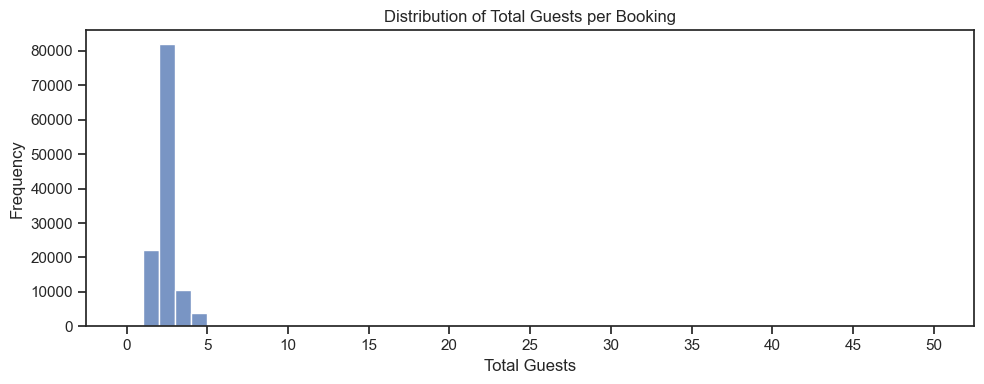

In [103]:
plt.figure(figsize=(10, 4))
sns.histplot(df['adults'] + df['children'] + df['babies'], bins=range(0, 51), kde=False)
plt.title("Distribution of Total Guests per Booking")
plt.xlabel("Total Guests")
plt.ylabel("Frequency")
plt.xticks(range(0, 51, 5))
plt.tight_layout()
plt.show()

In [104]:
suspicious = df[
    (df['adults'] + df['children'] + df['babies'] >= 10) &
    (df['customer_type'] != 'Group')
]

suspicious[['adults', 'children', 'babies', 'customer_type', 'reserved_room_type']]

adults  children  babies    customer_type reserved_room_type
328         2      10.0       0         Contract                  D
46619       2       0.0      10        Transient                  D
78656       1       0.0       9  Transient-Party                  A

In [105]:
df[
    (df['adults'] + df['children'] + df['babies'] >= 10) &
    (df['reserved_room_type'].isin(['A', 'B', 'C', 'D', 'E']))  # Assuming A–C are small/basic types
]

hotel  is_canceled  lead_time  arrival_date_year  \
328    Resort Hotel            1         55               2015   
1539   Resort Hotel            1        304               2015   
1587   Resort Hotel            1        333               2015   
1643   Resort Hotel            1        336               2015   
1752   Resort Hotel            1        340               2015   
1884   Resort Hotel            1        347               2015   
1917   Resort Hotel            1        349               2015   
1962   Resort Hotel            1        352               2015   
2003   Resort Hotel            1        354               2015   
2164   Resort Hotel            1        361               2015   
2173   Resort Hotel            1        338               2015   
2228   Resort Hotel            1        328               2015   
2417   Resort Hotel            1        334               2015   
2418   Resort Hotel            1        334               2015   
46619    City Hotel            0         37               2016   
78656    City Hotel            0         11               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
328                 July                        29                         12   
1539           September                        36                          3   
1587           September                        36                          5   
1643           September                        37                          7   
1752           September                        37                         12   
1884           September                        38                         19   
1917           September                        39                         21   
1962           September                        39                         24   
2003           September                        39                         26   
2164             October                        40                          3   
2173             October                        41                          4   
2228             October                        41                          6   
2417             October                        42                         12   
2418             October                        42                         12   
46619            January                         3                         12   
78656            October                        42                         11   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
328                          4                    10       2  ...   
1539                         0                     3      40  ...   
1587                         2                     5      26  ...   
1643                         1                     2      50  ...   
1752                         2                     5      26  ...   
1884                         2                     5      26  ...   
1917                         1                     3      27  ...   
1962                         1                     3      27  ...   
2003                         2                     5      26  ...   
2164                         2                     5      26  ...   
2173                         2                     0      55  ...   
2228                         2                     5      20  ...   
2417                         2                     5      10  ...   
2418                         2                     5      20  ...   
46619                        0                     2       2  ...   
78656                        2                     1       1  ...   

       days_in_waiting_list    customer_type     adr  \
328                       0         Contract  133.16   
1539                      0            Group    0.00   
1587                      0            Group    0.00   
1643                      0            Group    0.00   
1752                      0            Group    0.00   
188

In [106]:
# Flag entries with total guests >=10, customer_type is 'Group', hotel is 'Resort Hotel', and is_canceled == 1
df['flag_large_group_resort_cancel'] = (
    (df['adults'] + df['children'] + df['babies'] >= 10) &
    (df['hotel'] == 'Resort Hotel') &
    (df['reservation_status'] != 'Check-Out') &
    (df['is_canceled'] == 1)
)

#### High Lead Time

In [107]:
high_threshold = df['lead_time'].quantile(0.99)
df_high_lead = df[df['lead_time'] > high_threshold]

print(f"Number of entries with lead_time > 99th percentile ({high_threshold:.0f} days): {len(df_high_lead)}")

Number of entries with lead_time > 99th percentile (444 days): 1178


In [108]:
df_high_lead

hotel  is_canceled  lead_time  arrival_date_year  \
1       Resort Hotel            0        737               2015   
890     Resort Hotel            0        460               2015   
4182    Resort Hotel            0        709               2016   
5704    Resort Hotel            1        468               2016   
5705    Resort Hotel            1        468               2016   
...              ...          ...        ...                ...   
119102    City Hotel            0        518               2017   
119107    City Hotel            0        518               2017   
119109    City Hotel            0        518               2017   
119111    City Hotel            0        518               2017   
119148    City Hotel            0        457               2017   

       arrival_date_month  arrival_date_week_number  \
1                    July                        27   
890                August                        32   
4182             February                         9   
5704                  May                        20   
5705                  May                        20   
...                   ...                       ...   
119102             August                        34   
119107             August                        34   
119109             August                        34   
119111             August                        34   
119148             August                        34   

        arrival_date_day_of_month  stays_in_weekend_nights  \
1                               1                        0   
890                             3                        2   
4182                           25                        8   
5704                           12                        0   
5705                           12                        0   
...                           ...                      ...   
119102                         26                        2   
119107                         26                        2   
119109                         26                        2   
119111                         26                        2   
119148                         25                        2   

        stays_in_week_nights  adults  ...    customer_type     adr  \
1                          0       2  ...        Transient    0.00   
890                        5       1  ...         Contract   77.54   
4182                      20       2  ...        Transient   68.00   
5704                       2       2  ...  Transient-Party   67.00   
5705                       2       2  ...  Transient-Party   67.00   
...                      ...     ...  ...              ...     ...   
119102                     1       1  ...  Transient-Party    0.00   
119107                     1       2  ...  Transient-Party  112.67   
119109                     1       2  ...  Transient-Party  112.67   
119111                     1       2  ...  Transient-Party  112.67   
119148                     3       2  ...  Transient-Party  122.40   

       required_car_parking_spaces total_of_special_requests  \
1                                0                         0   
890                              0                         0   
4182                             0                         0   
5704                             0                         0   
5705                             0                         0   
...                            ...                       ...   
119102                           0                         0   
119107                           0                         1   
119109                           0                         1   
119111                           0                         1   
119148                           0                         1   

       reservation_status reservation_status_date  flag_adr  adr_outlier  \
1               Check-Out              2015-07-01     False        False   
890             Check-Out              201

In [109]:
df_high_lead.groupby('market_segment')['lead_time'].describe()

count        mean        std    min    25%    50%    75%  \
market_segment                                                             
Direct            2.0  723.000000  19.798990  709.0  716.0  723.0  730.0   
Groups          894.0  514.112975  60.442189  445.0  462.0  493.0  566.0   
Offline TA/TO   282.0  474.716312  18.706699  454.0  457.0  468.0  479.0   

                  max  
market_segment         
Direct          737.0  
Groups          629.0  
Offline TA/TO   532.0

In [110]:
pivot = df_high_lead.pivot_table(
    values='lead_time',
    index=['hotel', 'customer_type'],
    columns='is_canceled',
    aggfunc=('mean', 'count')
)

print(pivot)

                              count               mean            
is_canceled                       0      1           0           1
hotel        customer_type                                        
City Hotel   Group              1.0    NaN  468.000000         NaN
             Transient          NaN  763.0         NaN  521.562254
             Transient-Party  241.0   66.0  470.219917  470.681818
Resort Hotel Contract           5.0    NaN  473.200000         NaN
             Transient          3.0   27.0  638.000000  463.555556
             Transient-Party   42.0   30.0  506.880952  468.000000


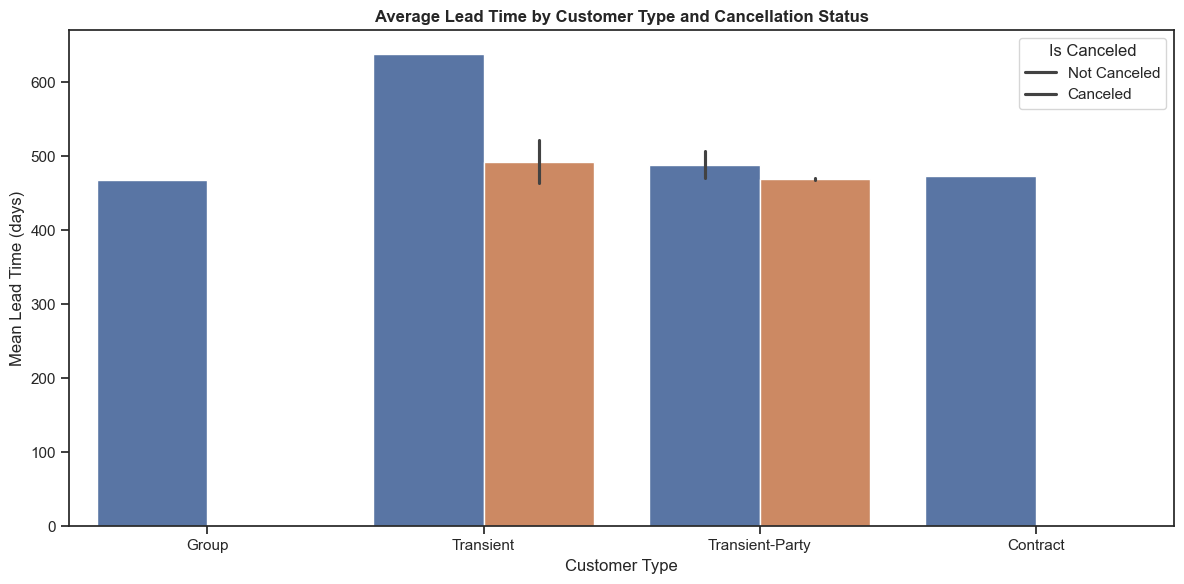

In [111]:
# Prepare the data
plot_df = df_high_lead.groupby(['hotel', 'customer_type', 'is_canceled'])['lead_time'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_df,
    x='customer_type',
    y='lead_time',
    hue='is_canceled',
)

plt.title('Average Lead Time by Customer Type and Cancellation Status', fontweight = 'bold')
plt.ylabel('Mean Lead Time (days)')
plt.xlabel('Customer Type')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

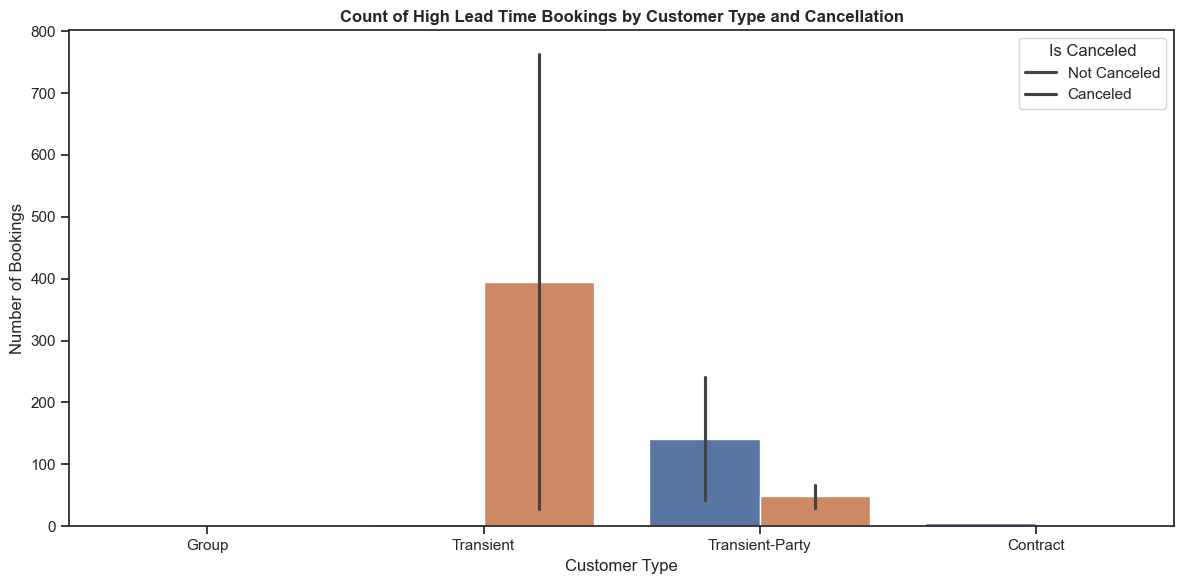

In [112]:
# Prepare count data
count_df = df_high_lead.groupby(['hotel', 'customer_type', 'is_canceled']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=count_df,
    x='customer_type',
    y='count',
    hue='is_canceled',
    palette='deep'
)

plt.title('Count of High Lead Time Bookings by Customer Type and Cancellation', fontweight = 'bold')
plt.ylabel('Number of Bookings')
plt.xlabel('Customer Type')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

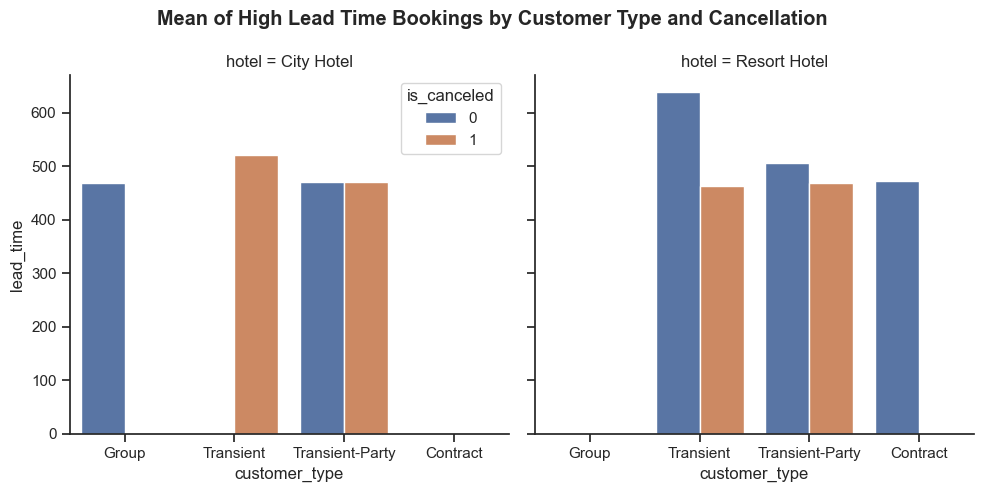

In [113]:
sns.catplot(
    data=plot_df,
    x='customer_type',
    y='lead_time',
    hue='is_canceled',
    col='hotel',
    kind='bar',
    height=5,
    aspect=1,
    legend_out = False
)

plt.suptitle('Mean of High Lead Time Bookings by Customer Type and Cancellation', fontweight = 'bold')
# plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

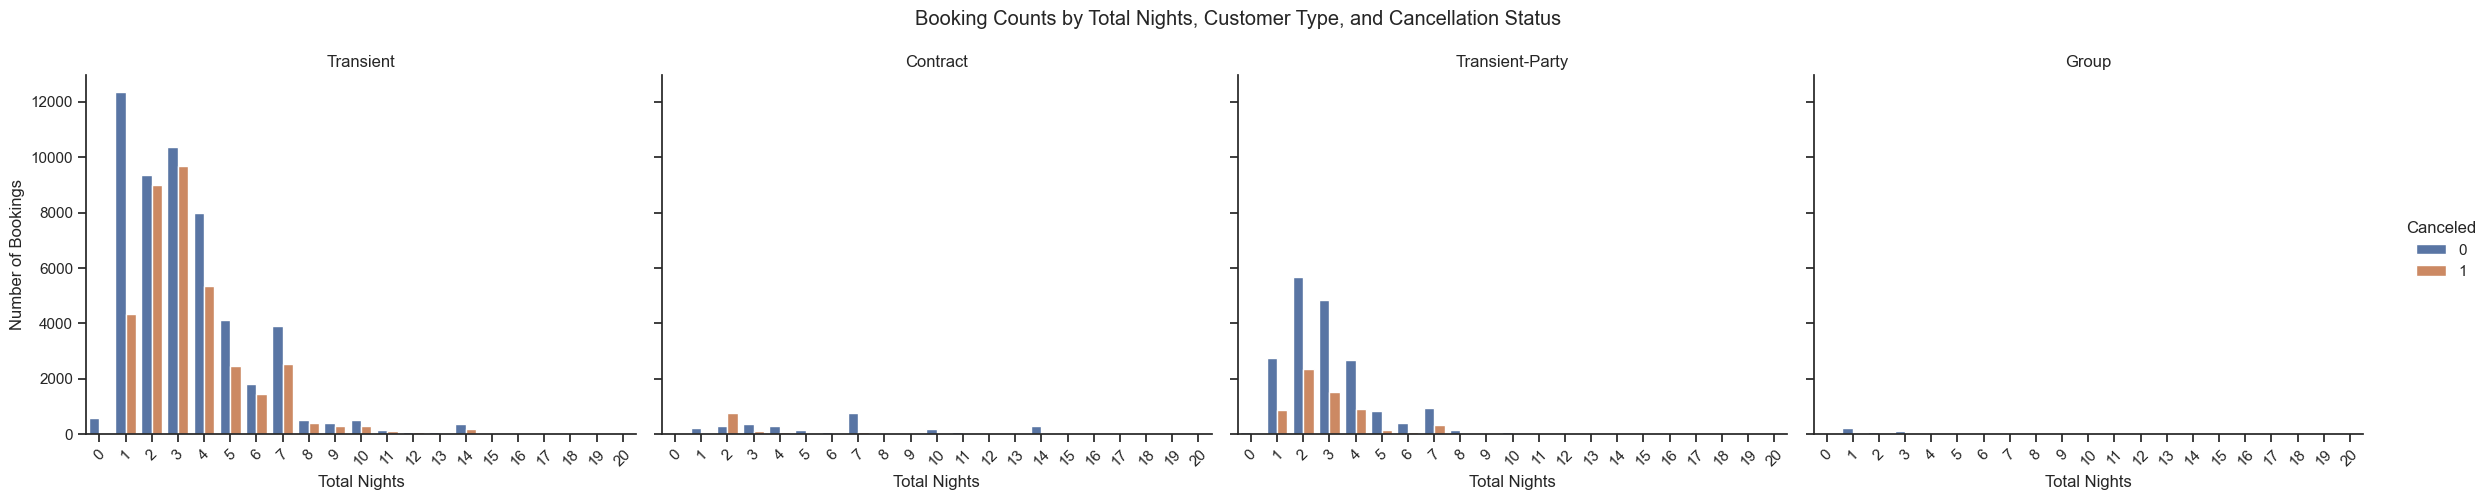

In [114]:
# Filter the data to limit total nights (computed directly without creating a new column)
filtered_df = df[(df['stays_in_week_nights'] + df['stays_in_weekend_nights']) <= 20].copy()

# Plot using seaborn
g = sns.catplot(
    data=filtered_df,
    x=(filtered_df['stays_in_week_nights'] + filtered_df['stays_in_weekend_nights']),
    hue='is_canceled',
    col='customer_type',
    kind='count',
    height=5,
    aspect=1.2,
    palette='deep'
)

# Set plot labels and titles
g.set_axis_labels("Total Nights", "Number of Bookings")
g.set_titles("{col_name}")
g._legend.set_title("Canceled")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.85)
g.figure.suptitle('Booking Counts by Total Nights, Customer Type, and Cancellation Status')

plt.show()

For City Hotel:
- There is only one non-canceled group booking with a high lead time (468 days).
- All transient bookings (763 entries) appear only in canceled reservations, with a high average lead time of approximately 522 days — suggesting that very early transient bookings tend to be unstable, where transient guests who book far in advance are more likely to cancel, possibly due to uncertainty in travel plans, price sensitivity, or alternative offers closer to the booking date.

    (For transient guests at City Hotel, long planning horizons might reflect non-commutal intent or speculative booking behaviour.)

- Transient-party bookings are present in both canceled and non-canceled reservations, with the majority being non-canceled. Their average lead time hovers around 470 days, regardless of cancellation status. This indicates that lead time alone may not be a strong driver of cancellation statuses.

For Resort Hotel:
- There are five non-canceled contract bookings, each with an average lead time of about 473 days. This aligns with expectations - contract bookings are often business-related, less flexible, and typically non-refundable or pre-negotiated, reducing cancellation risk even with long horizons.
- Among transient customers, most high lead time bookings are canceled, averaging ~463 days. The small number of non-canceled transient bookings (3 entries) have a much higher average lead time of 638 days.
- Transient-party bookings show a more balanced pattern: 42 non-canceled bookings have an average lead time of 507 days, while 30 canceled bookings average 468 days.

#### Deposit Type and `is_canceled` (tentative)
This is to verify whther `deposit_type` and `is_canceled` are logically consistent with each other. 

We flagged potentially inconsistent entries where bookings were canceled, but the deposit type suggests a refund should have occurred (Refundable or No Deposit), yet ADR is still positive.

These may reflect data entry errors, delayed refunds, or improperly updated cancellation statuses. Further investigation is recommended if revenue analysis is sensitive to these entries.

In [115]:
df[(df['is_canceled'] == 1) & (df['deposit_type'] == 'Non Refund')]

hotel  is_canceled  lead_time  arrival_date_year  \
2133   Resort Hotel            1         87               2015   
2134   Resort Hotel            1         87               2015   
2135   Resort Hotel            1         87               2015   
2136   Resort Hotel            1         87               2015   
2141   Resort Hotel            1         87               2015   
...             ...          ...        ...                ...   
82930    City Hotel            1        177               2016   
82931    City Hotel            1        177               2016   
82932    City Hotel            1        177               2016   
82933    City Hotel            1        177               2016   
85211    City Hotel            1        304               2016   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
2133             October                        40                          3   
2134             October                        40                          3   
2135             October                        40                          3   
2136             October                        40                          3   
2141             October                        40                          3   
...                  ...                       ...                        ...   
82930                May                        20                          8   
82931                May                        20                          8   
82932                May                        20                          8   
82933                May                        20                          8   
85211           December                        53                         26   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
2133                         0                     1       2  ...   
2134                         0                     1       2  ...   
2135                         0                     1       2  ...   
2136                         0                     1       2  ...   
2141                         0                     1       2  ...   
...                        ...                   ...     ...  ...   
82930                        2                     0       2  ...   
82931                        2                     0       2  ...   
82932                        2                     0       2  ...   
82933                        2                     0       2  ...   
85211                        1                     2       1  ...   

         customer_type     adr required_car_parking_spaces  \
2133         Transient   36.05                           0   
2134         Transient   36.05                           0   
2135         Transient   36.05                           0   
2136         Transient   36.05                           0   
2141         Transient   36.05                           0   
...                ...     ...                         ...   
82930        Transient  121.00                           0   
82931        Transient  121.00                           0   
82932        Transient  121.00                           0   
82933        Transient  121.00                           0   
85211  Transient-Party  106.00                           0   

      total_of_special_requests reservation_status reservation_status_date  \
2133                          0           Canceled              2015-08-12   
2134                          0           Canceled              2015-08-12   
2135                          0           Canceled              2015-08-12   
2136                          0           Canceled              2015-08-12   
2141                          0           Canceled              2015-08-12   
...                         ...                ...                     ...   
82930                         0           Canceled              2016-01-07   
82931                         0           Canceled

This is normal, as the guest canceled the booking but the hotel still kept the money

In [116]:
df[(df['is_canceled'] == 1) & (df['deposit_type'] == 'Refundable') & (df['adr'] > 0)]

hotel  is_canceled  lead_time  arrival_date_year  \
4769   Resort Hotel            1        169               2016   
4774   Resort Hotel            1        169               2016   
4775   Resort Hotel            1        169               2016   
4776   Resort Hotel            1        169               2016   
4777   Resort Hotel            1        169               2016   
4782   Resort Hotel            1        169               2016   
4793   Resort Hotel            1        169               2016   
4794   Resort Hotel            1        169               2016   
8613   Resort Hotel            1        385               2016   
10937  Resort Hotel            1         25               2017   
11048  Resort Hotel            1         94               2017   
11398  Resort Hotel            1        183               2017   
11659  Resort Hotel            1        203               2017   
11687  Resort Hotel            1        162               2017   
11689  Resort Hotel            1        162               2017   
11691  Resort Hotel            1        162               2017   
11714  Resort Hotel            1        212               2017   
11774  Resort Hotel            1         72               2017   
12384  Resort Hotel            1        313               2017   
12718  Resort Hotel            1         36               2017   
13159  Resort Hotel            1         15               2017   
13747  Resort Hotel            1        175               2017   
60531    City Hotel            1        113               2016   
66297    City Hotel            1         14               2017   
66505    City Hotel            1        177               2017   
66509    City Hotel            1        177               2017   
67870    City Hotel            1         47               2017   
71854    City Hotel            1          1               2017   
72142    City Hotel            1         61               2017   
72532    City Hotel            1         13               2017   
72538    City Hotel            1        171               2017   
72541    City Hotel            1        171               2017   
72589    City Hotel            1        315               2017   
72590    City Hotel            1        315               2017   
72591    City Hotel            1        315               2017   
72620    City Hotel            1        132               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
4769               March                        14                         31   
4774               March                        14                         31   
4775               March                        14                         31   
4776               March                        14                         31   
4777               March                        14                         31   
4782               March                        14                         31   
4793               March                        14                         31   
4794               March                        14                         31   
8613             October                        41                          8   
10937              April                        15                         11   
11048              April                        16                         16   
11398                May                        18                          5   
11659                May                        21                         25   
11687                May                        21                         25   
11689                May                        21                         25   
11691                May                        21                         25   
11714                May                        21                         26   
11774                May                        22                         29   
12384               June        

### **Duplicates**
This is to identify any possible duplicates present in the dataset, but if a booking is part of a group, it would not be flagged as duplicate,

In [117]:
# possible duplicates (if multiple entries share all of these fields, they're likely duplicates)
duplicate_subset = [
    'hotel', 
    'arrival_date_year', 
    'arrival_date_month', 
    'arrival_date_day_of_month',
    'adults', 
    'children', 
    'babies', 
    'customer_type',
    'reserved_room_type'
]

In [118]:
df.duplicated(subset = duplicate_subset, keep = False)

0         True
1         True
2         True
3         True
4         True
          ... 
119385    True
119386    True
119387    True
119388    True
119389    True
Length: 118897, dtype: bool

Unfortunately, using the subset to filter any duplicates is flagging too many cases that are not really duplicates. This likely means:
1. fields used in the subset are not sufficient enough to uniquely identify bookings, or
2. the duplicates could be legitimate multiple bookings by different guests who happen to match on those basic fields.

Most of the duplicates using this subset are in customer types: **Transient**, **Transient-Party**, and **Contract**; not just **Group**. This also means that these are probably not actual duplicates, but common booking patterns for solo travelers, business trips, or regular transient guests. So, using `duplicated()` on a few general fields ends up overflagging.

Given the lack of unique booking IDs or personally identifiable information, no reliable logic could be established to distinguish true duplicate bookings from coincidentally similar reservations. As such, we chose not to apply a duplicate-filtering mechanism to avoid mistakenly removing valid entries.

In [119]:
# group based on booking volume patterns

duplicate_check = df.groupby([
    'hotel', 
    'arrival_date_year', 
    'arrival_date_month', 
    'arrival_date_day_of_month',
    'reserved_room_type'
]).size().reset_index(name='count')

# View high-frequency patterns
duplicate_check[duplicate_check['count'] > 3]

hotel  arrival_date_year arrival_date_month  \
0       City Hotel               2015             August   
2       City Hotel               2015             August   
4       City Hotel               2015             August   
5       City Hotel               2015             August   
8       City Hotel               2015             August   
...            ...                ...                ...   
7590  Resort Hotel               2017                May   
7591  Resort Hotel               2017                May   
7594  Resort Hotel               2017                May   
7595  Resort Hotel               2017                May   
7596  Resort Hotel               2017                May   

      arrival_date_day_of_month reserved_room_type  count  
0                             1                  A     33  
2                             2                  A      5  
4                             3                  A    114  
5                             3                  B      4  
8                             4                  A     12  
...                         ...                ...    ...  
7590                         30                  D     17  
7591                         30                  E     13  
7594                         31                  A     45  
7595                         31                  D      5  
7596                         31                  E      5  

[4283 rows x 6 columns]

The code above is to explore booking patterns instead of forcing a strick duplicate check. Rather than trying to say "These two rows are the same booking", we can instead ask, "How often do bookings with the same general pattern happen on the same day?". This helps answer questions like:
1. Are there surges in bookings for a certain room type on a specific dat?
2. Are many people booking the same room type on the same date?
3. Could there be group behaviour or events without it being marked as `customer_type = 'Group'`?

By doing this, instead of saying they're duplicates, we can just say they follow a booking pattern that repeats, which can be interesting.

### **Cleaned Dataframe**

In [120]:
df_cleaned = df[
    (~df['flag_adr']) &
    (~df['adr_outlier']) &
    (~df['zero_night_noncanceled']) &
    (~df['flag_large_group_resort_cancel'])
].copy()

In [121]:
df_cleaned = df_cleaned.drop(columns = ['flag_adr', 'adr_outlier', 'zero_night_noncanceled', 'flag_large_group_resort_cancel'])

In [122]:
df_flagged = df[
    df[['flag_adr', 'adr_outlier', 'zero_night_noncanceled', 'flag_large_group_resort_cancel']].any(axis=1)
]

## **Feature Engineering**

### **Type Casting**

In [123]:
df_cleaned['children'] = df_cleaned['children'].astype(int)
df_cleaned['reservation_status_date'] = pd.to_datetime(df_cleaned['reservation_status_date'], errors='coerce')

### **Feature Construction**

#### **`continent`**

In [124]:
iso3_to_continent = {
    'ABW': 'North America',
    'AGO': 'Africa',
    'AIA': 'North America',
    'ALB': 'Europe',
    'AND': 'Europe',
    'ARE': 'Asia',
    'ARG': 'South America',
    'ARM': 'Asia',
    'ASM': 'Oceania',
    'ATA': 'Antarctica',
    'ATF': 'Antarctica',
    'AUS': 'Oceania',
    'AUT': 'Europe',
    'AZE': 'Asia',
    'BDI': 'Africa',
    'BEL': 'Europe',
    'BEN': 'Africa',
    'BFA': 'Africa',
    'BGD': 'Asia',
    'BGR': 'Europe',
    'BHR': 'Asia',
    'BHS': 'North America',
    'BIH': 'Europe',
    'BLR': 'Europe',
    'BOL': 'South America',
    'BRA': 'South America',
    'BRB': 'North America',
    'BWA': 'Africa',
    'CAF': 'Africa',
    'CHE': 'Europe',
    'CHL': 'South America',
    'CHN': 'Asia',
    'CIV': 'Africa',
    'CMR': 'Africa',
    'COL': 'South America',
    'COM': 'Africa',
    'CPV': 'Africa',
    'CRI': 'North America',
    'CUB': 'North America',
    'CYM': 'North America',
    'CYP': 'Asia',
    'CZE': 'Europe',
    'DEU': 'Europe',
    'DJI': 'Africa',
    'DMA': 'North America',
    'DNK': 'Europe',
    'DOM': 'North America',
    'DZA': 'Africa',
    'ECU': 'South America',
    'EGY': 'Africa',
    'ESP': 'Europe',
    'EST': 'Europe',
    'ETH': 'Africa',
    'FIN': 'Europe',
    'FJI': 'Oceania',
    'FRA': 'Europe',
    'FRO': 'Europe',
    'GAB': 'Africa',
    'GBR': 'Europe',
    'GEO': 'Asia',
    'GGY': 'Europe',
    'GHA': 'Africa',
    'GIB': 'Europe',
    'GIN': 'Africa',
    'GLP': 'North America',
    'GNB': 'Africa',
    'GRC': 'Europe',
    'GTM': 'North America',
    'GUY': 'South America',
    'HKG': 'Asia',
    'HND': 'North America',
    'HRV': 'Europe',
    'HUN': 'Europe',
    'IDN': 'Asia',
    'IMN': 'Europe',
    'IND': 'Asia',
    'IRL': 'Europe',
    'IRN': 'Asia',
    'IRQ': 'Asia',
    'ISL': 'Europe',
    'ISR': 'Asia',
    'ITA': 'Europe',
    'JAM': 'North America',
    'JEY': 'Europe',
    'JOR': 'Asia',
    'JPN': 'Asia',
    'KAZ': 'Asia',
    'KEN': 'Africa',
    'KHM': 'Asia',
    'KIR': 'Oceania',
    'KNA': 'North America',
    'KOR': 'Asia',
    'KWT': 'Asia',
    'LAO': 'Asia',
    'LBN': 'Asia',
    'LBY': 'Africa',
    'LCA': 'North America',
    'LIE': 'Europe',
    'LKA': 'Asia',
    'LTU': 'Europe',
    'LUX': 'Europe',
    'LVA': 'Europe',
    'MAC': 'Asia',
    'MAR': 'Africa',
    'MCO': 'Europe',
    'MDA': 'Europe',
    'MDG': 'Africa',
    'MDV': 'Asia',
    'MEX': 'North America',
    'MKD': 'Europe',
    'MLI': 'Africa',
    'MLT': 'Europe',
    'MMR': 'Asia',
    'MNE': 'Europe',
    'MOZ': 'Africa',
    'MRT': 'Africa',
    'MUS': 'Africa',
    'MWI': 'Africa',
    'MYT': 'Africa',
    'MYS': 'Asia',
    'NAM': 'Africa',
    'NCL': 'Oceania',
    'NER': 'Africa',
    'NGA': 'Africa',
    'NIC': 'North America',
    'NLD': 'Europe',
    'NOR': 'Europe',
    'NPL': 'Asia',
    'NZL': 'Oceania',
    'OMN': 'Asia',
    'PAK': 'Asia',
    'PAN': 'North America',
    'PER': 'South America',
    'PHL': 'Asia',
    'PLW': 'Oceania',
    'POL': 'Europe',
    'PRI': 'North America',
    'PRT': 'Europe',
    'PRY': 'South America',
    'PYF': 'Oceania',
    'QAT': 'Asia',
    'ROU': 'Europe',
    'RUS': 'Europe',
    'RWA': 'Africa',
    'SAU': 'Asia',
    'SDN': 'Africa',
    'SEN': 'Africa',
    'SGP': 'Asia',
    'SLE': 'Africa',
    'SLV': 'North America',
    'SMR': 'Europe',
    'SRB': 'Europe',
    'STP': 'Africa',
    'SUR': 'South America',
    'SVK': 'Europe', 
    'SVN': 'Europe',
    'SWE': 'Europe',
    'SYC': 'Africa',
    'SYR': 'Asia',
    'THA': 'Asia',
    'TJK': 'Asia',
    'TGO': 'Africa',
    'TMP': 'Asia',
    'TUN': 'Africa',
    'TUR': 'Asia',
    'TWN': 'Asia',
    'TZA': 'Africa',
    'UGA': 'Africa',
    'UKR': 'Europe',
    'UMI': 'Oceania',
    'URY': 'South America',
    'USA': 'North America',
    'UZB': 'Asia',
    'VEN': 'South America',
    'VGB': 'North America',
    'VNM': 'Asia',
    'ZAF': 'Africa',
    'ZMB': 'Africa',
    'ZWE': 'Africa'
}

In [125]:
df_cleaned['continent'] = df_cleaned['country'].map(iso3_to_continent)

In [126]:
unmapped = df_cleaned[df_cleaned['continent'].isnull()]['country'].unique()
unmapped

array([], dtype=object)

In [127]:
df_cleaned[df_cleaned['continent'].isnull()]

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, continent]
Index: []

[0 rows x 31 columns]

In [128]:
df_cleaned.groupby('continent')['country'].nunique().sort_values(ascending=False)

continent
Europe           47
Asia             42
Africa           42
North America    22
South America    12
Oceania           9
Antarctica        2
Name: country, dtype: int64

#### **`season`**

In [129]:
month_to_season = {
    'December': 'Winter',
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Autumn',
    'October': 'Autumn',
    'November': 'Autumn'
}

In [130]:
df_cleaned['season'] = df_cleaned['arrival_date_month'].map(month_to_season)

In [131]:
df_cleaned['season'].value_counts()

season
Summer    37234
Spring    32375
Autumn    28106
Winter    20421
Name: count, dtype: int64

#### **`stay_total_nights`**

In [132]:
df_cleaned['stay_total_nights'] = df_cleaned['stays_in_weekend_nights'] + df_cleaned['stays_in_week_nights']

#### **`total_guests`**

In [133]:
df_cleaned['total_guests'] = df_cleaned['adults'] + df_cleaned['children'].fillna(0) + df_cleaned['babies']

#### **`is_family`**

In [134]:
df_cleaned['is_family'] = ((df_cleaned['children'] + df_cleaned['babies']) > 0)

#### **`is_solo`**

In [135]:
df_cleaned['is_solo'] = (df_cleaned['adults'] == 1) & (df_cleaned['children'] == 0) & (df_cleaned['babies'] == 0)

#### **`expected_revenue`**

In [136]:
df_cleaned['expected_revenue'] = df_cleaned['adr'] * df_cleaned['stay_total_nights']

#### **`adr_per_person`**

In [137]:
df_cleaned['adr_per_person'] = df_cleaned['adr'] / df_cleaned['total_guests'].replace(0, np.nan)

#### **`lead_time_bin`**

In [138]:
df_cleaned['lead_time_bin'] = pd.cut(df_cleaned['lead_time'], bins=[0, 30, 90, 180, 365, np.inf],
                                labels=['<1mo', '1–3mo', '3–6mo', '6–12mo', '>1yr'])

In [139]:
df_cleaned.to_csv('C:/Users/Dell/Documents/Purwadhika/Final Project/df_cleaned.csv', index = False)

## **Exploratory Data Analysis**

### **Correlation**

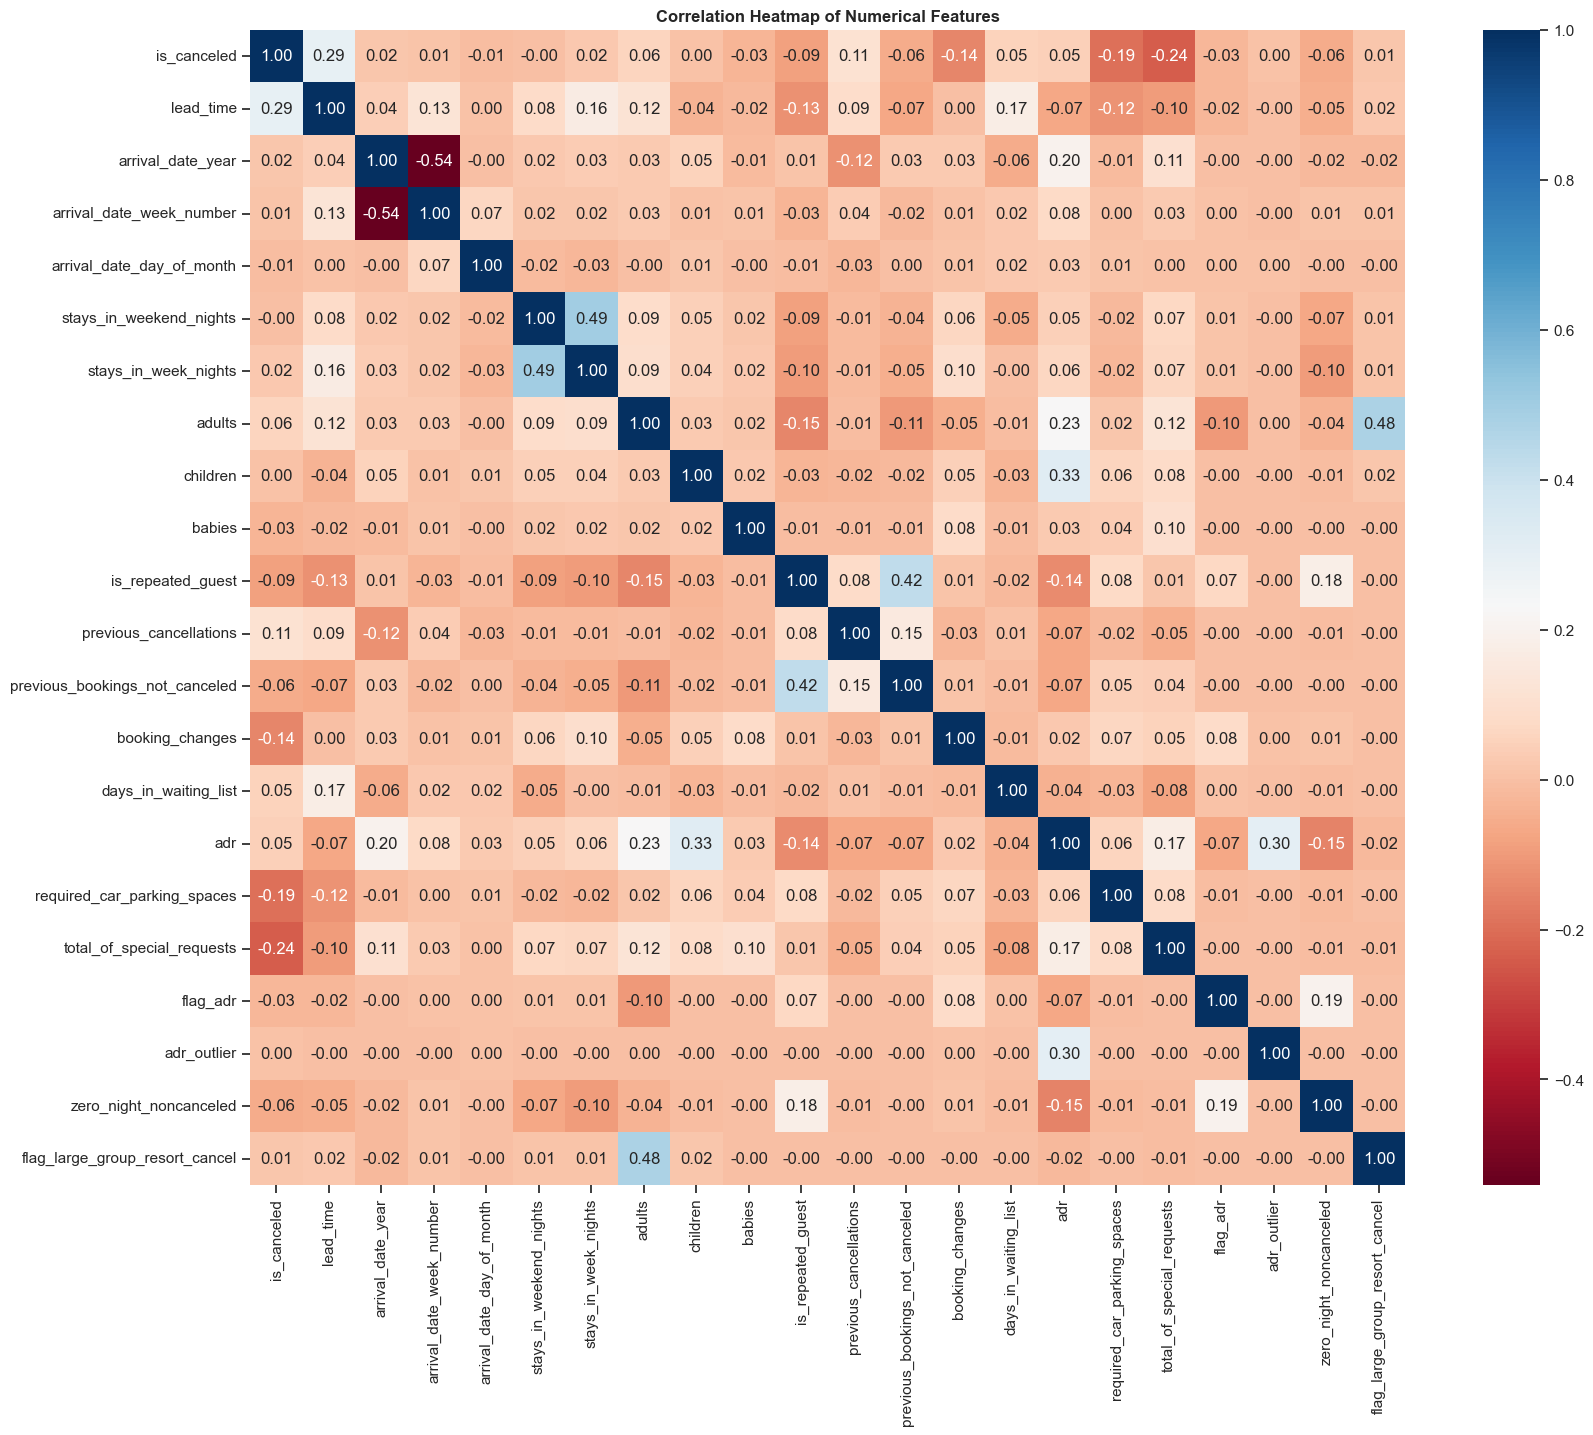

In [140]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'RdBu', square=True)
plt.title('Correlation Heatmap of Numerical Features', fontweight = 'bold')
plt.show()

This correlation heatmap reveals several meaningful relationships between numerical features and booking cancellations in the dataset. The variable most positively correlated with cancellations is lead time (0.29), suggesting that bookings made further in advance are more likely to be canceled. In contrast, variables like total special requests (-0.24), required car parking spaces (-0.19), and booking changes (-0.14) show negative correlations, indicating that guests who are more engaged or have specific needs tend to follow through with their bookings. Other weak but notable signals include repeat guest status (-0.09) and previous cancellations (0.11). Although some features have low individual correlations, they may still contribute meaningfully in non-linear models or through interactions.

### **Cancellation Patterns**
This section explores broad patterns of booking cancellations. By examining trends across hotel types, time (monthly or seasonal), customer types, and booking characteristics, we aim to uncover what drives cancellations and whether specific features (e.g., booking lead time, number of guests, deposit policy) can help explain or predict cancellation behavior. Understanding these patterns helps hotels anticipate risk and design more resilient booking strategies.

#### What is the overall proportion of bookings that were canceled?

In [141]:
df_cleaned['is_canceled'].mean()
print(f"Overall cancellation proportion: {df_cleaned['is_canceled'].mean():.2%}")

Overall cancellation proportion: 37.36%


This means 37% of all bookings were canceled.

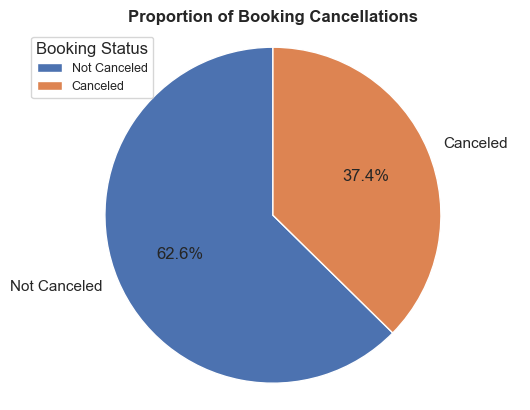

In [142]:
labels = ['Not Canceled', 'Canceled']
sizes = df_cleaned['is_canceled'].value_counts(normalize = True) * 100

plt.pie(sizes, labels = labels, autopct = '%.1f%%', startangle = 90)
plt.legend(loc = 'upper left', title = 'Booking Status', fontsize = 9)
plt.title('Proportion of Booking Cancellations', fontweight = 'bold')
plt.axis('equal')
plt.show()

The pie chart above proves the presence of imbalance between cancelled and non-cancelled bookings, with cancelled bookings at 37.4% and non-canceled bookings at 62.6%.

Thus, imbalance treatment must be done before proceeding to model construction.

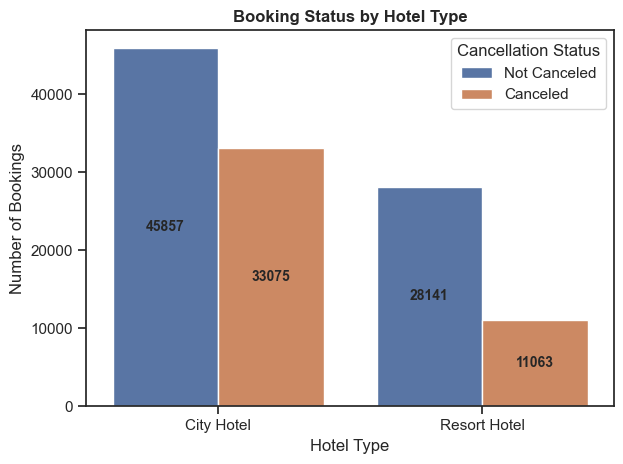

In [143]:
cancel_rate_by_hotel = (
    df_cleaned.groupby(['hotel', 'is_canceled'])
    .size()
    .reset_index(name='count')
)

# Replace binary with labels for readability
cancel_rate_by_hotel['Cancellation Status'] = cancel_rate_by_hotel['is_canceled'].map({0: 'Not Canceled', 1: 'Canceled'})

# plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=cancel_rate_by_hotel,
    x='hotel',
    y='count',
    hue='Cancellation Status'
)

ax.set_title('Booking Status by Hotel Type', fontweight = 'bold')
ax.set_ylabel('Number of Bookings')
ax.set_xlabel('Hotel Type')

for container in ax.containers:
    ax.bar_label(container, fmt = '%.0f', label_type = 'center', fontsize = 10, weight = 'bold')

plt.tight_layout()
plt.show()

The bar chart above illustrates the distribution of booking cancellations across Resort Hotel and City Hotel types. While both hotel types experience cancellations, City Hotels show a notably higher absolute number of cancellations compared to Resort Hotels.

This is partially explained by the fact that City Hotels also receive a larger total volume of bookings. However, the proportion of canceled bookings appears to be relatively higher in City Hotels, suggesting that booking behavior or cancellation policies may differ between hotel types.

#### What are the seasonal patterns of cancellations — by month, season, or week number?

In [144]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

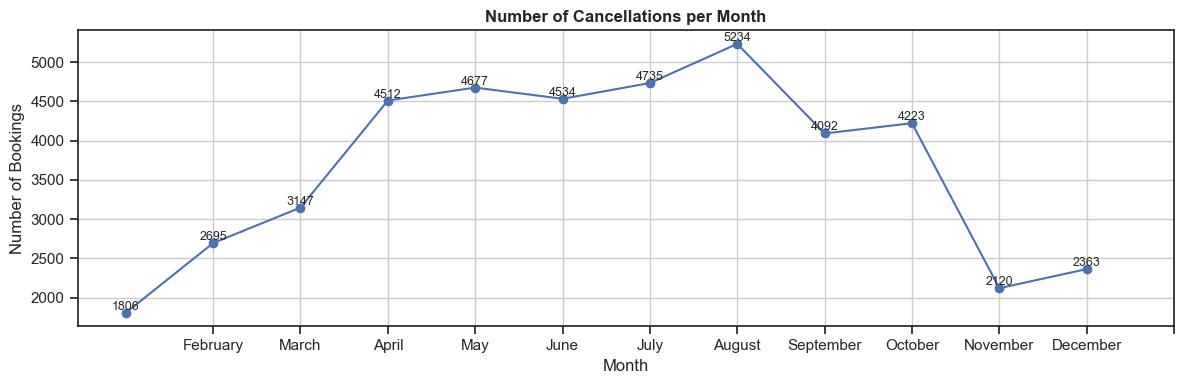

In [145]:
monthly_cancel = df_cleaned[df_cleaned['is_canceled'] == 1]['arrival_date_month'].value_counts().reindex(month_order)

plt.figure(figsize = (12, 4))
plt.plot(monthly_cancel.index, monthly_cancel.values, marker = 'o')
plt.title('Number of Cancellations per Month', fontweight = 'bold')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(1,13))
plt.grid()

for x, y in zip(monthly_cancel.index, monthly_cancel.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

The line chart displays the number of cancellations across different months, from **January** to **December**.
- **Potential Seasonal Trends**
    
    Cancellations often fluctiare due to seasonal factos, holidays, or busines cycles. In this graph, we can see that higher cancellations occur in summer months (July - August) that might be due to last-minute plan changes (i.e. uncertainty in weather that disrupts travel plans like heatwave).

- **Peak Booking Periods**

    Cancellations spike can also be caused by issues with overbooking, that leads to customer dissatisfaction. External factors like weather events can also cause this.


To mitigate this cancellations, hotels could consider implementing stricter cancellation fees or incentives for early commitments.

In [146]:
monthly_cancellation = (
    df_cleaned.groupby('arrival_date_month')['is_canceled']
    .mean()
    .reindex(month_order)
    .reset_index()
)

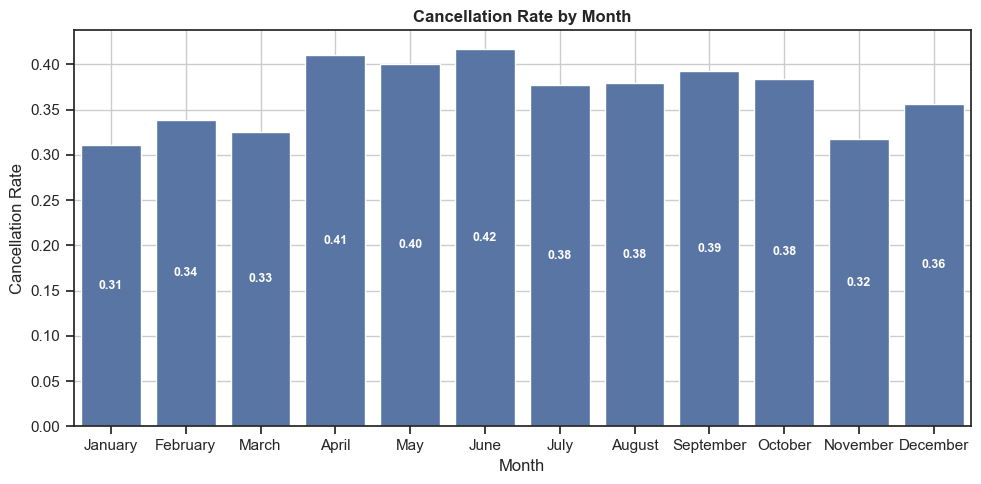

In [147]:
plt.figure(figsize = (10, 5))
ax = sns.barplot(data=monthly_cancellation, x='arrival_date_month', y='is_canceled')

# Add title and labels
ax.set_title('Cancellation Rate by Month', fontweight='bold')
ax.set_ylabel('Cancellation Rate')
ax.set_xlabel('Month')
ax.grid()

# Add value labels inside the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

The bar chart displays the average cancellation rate per month across the dataset. Several seasonal patterns emerge:
- Highest cancellation rates occur during April and June, peaking in June, with over 40% of bookings being canceled.
- Lowest rates are seen in January, and November, all below 33%.

In [148]:
seasonal_cancellation = (
    df_cleaned.groupby('season')['is_canceled']
    .mean()
    .reindex(['Winter', 'Spring', 'Summer', 'Autumn'])  # Ensure order
    .reset_index()
)

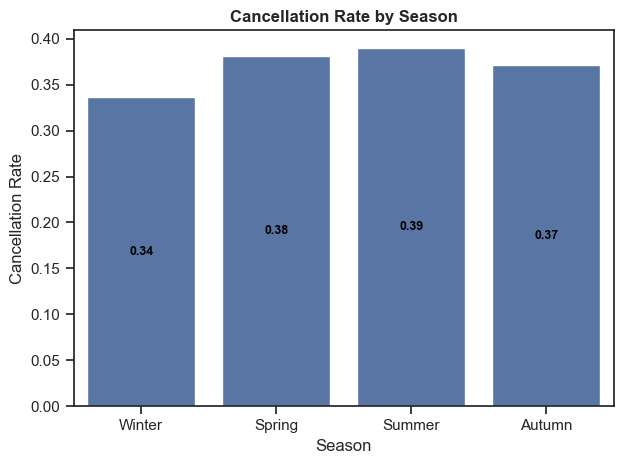

In [149]:
ax = sns.barplot(data=seasonal_cancellation, x='season', y='is_canceled')

ax.set_title('Cancellation Rate by Season', fontweight='bold')
ax.set_ylabel('Cancellation Rate')
ax.set_xlabel('Season')

# Add value labels inside the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='black', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

This chart presents the average cancellation rate across the four seasons:
- Summer shows the highest cancellation rate, just under 39%.
- Spring and Autumn follow closely, both around 37–38%.
- Winter has the lowest cancellation rate, approximately 34%.

These seasonal trends suggest that bookings made during warmer or transitional periods (Spring, Summer, Autumn) are more likely to be canceled; possibly due to flexible travel plans, seasonal promotions, or last-minute changes in vacation arrangements. Conversely, Winter bookings appear more stable, potentially linked to end-of-year holidays and more committed travel intentions.

In [150]:
weekly_cancellation = (
    df_cleaned.groupby('arrival_date_week_number')['is_canceled']
    .mean()
    .reset_index()
)

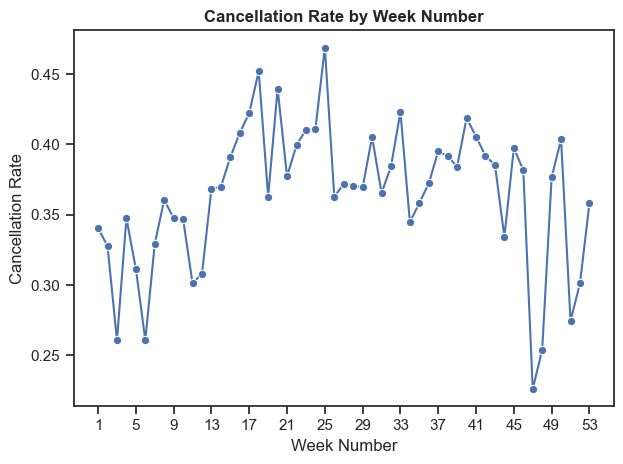

In [151]:
sns.lineplot(data=weekly_cancellation, x='arrival_date_week_number', y='is_canceled', marker='o')
plt.title('Cancellation Rate by Week Number', fontweight = 'bold')
plt.ylabel('Cancellation Rate')
plt.xlabel('Week Number')
plt.xticks(range(1, 54, 4))
plt.tight_layout()
plt.show()

This line chart illustrates the weekly trend in booking cancellation rates across all data. It shows a level of volatility and fine-grained seasonality that's not immediately obvious from monthly or seasonal views.

1. Mid-Year Spike (Weeks 17–28)
    - This period (late April to mid-July) shows a clear and sustained rise in cancellations, peaking around weeks 25–26.
    - Possible explanations:
        - School holiday periods or vacation planning uncertainty.
        - Guests may book early but cancel later as travel plans solidify.

2. Volatility in the Middle (Weeks 29–45)
    - Cancellation rates fluctuate between ~35–42%, without a clear upward or downward trend.
    - Could indicate diverse booking behaviors in different travel segments.

3. Year-End Dip (Weeks 46–49)
    - Sharp drop in cancellations near late November to early December.
    - This aligns with holiday bookings, which are often more firm.
    - Guests may be less likely to cancel trips that involve holidays or family plans.

4. Late-Year Rebound (Weeks 50–52)
    - Slight rebound before tapering again.
    - Could represent last-minute adjustments or cancellations from bookings made earlier in the year.

#### Do cancellations cluster around certain week numbers regardless of year?
This question digs into whether certain weeks consistently show high cancellation behavior across multiple years, i.e., temporal clustering.

In [152]:
weekly_cancellation = (
    df_cleaned.groupby(['arrival_date_year', 'arrival_date_week_number'])['is_canceled']
    .mean()
    .reset_index()
    .rename(columns={'is_canceled': 'cancellation_rate'})
)

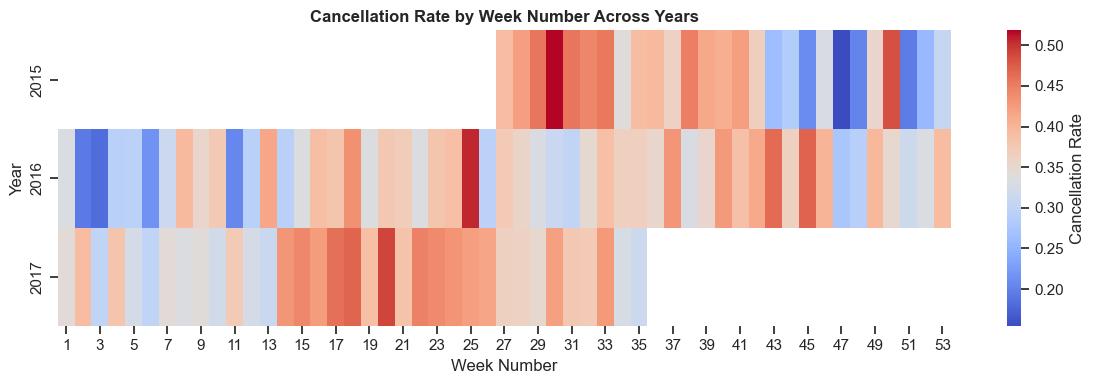

In [153]:
heatmap_data = weekly_cancellation.pivot(index='arrival_date_year', columns='arrival_date_week_number', values='cancellation_rate')

plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt=".2f", cbar_kws={'label': 'Cancellation Rate'})
plt.title("Cancellation Rate by Week Number Across Years", fontweight = 'bold')
plt.xlabel("Week Number")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

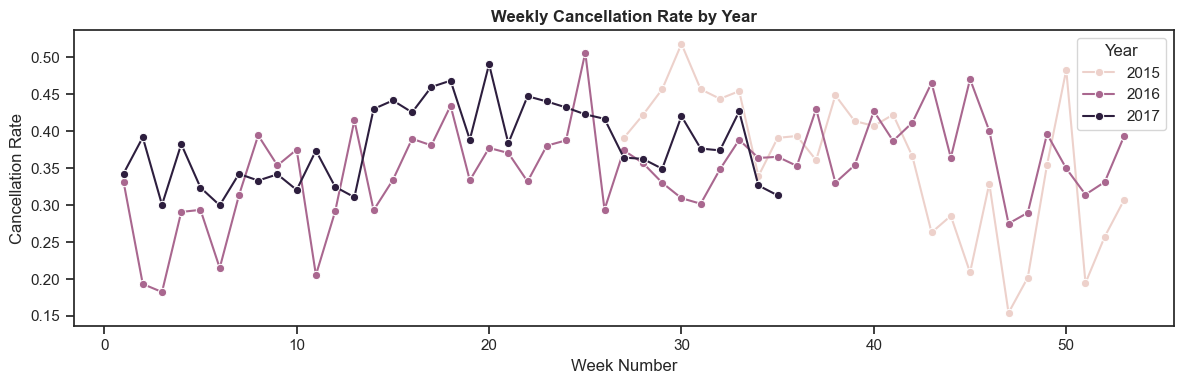

In [154]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=weekly_cancellation, x='arrival_date_week_number', y='cancellation_rate', hue='arrival_date_year', marker='o')
plt.title("Weekly Cancellation Rate by Year", fontweight = 'bold')
plt.xlabel("Week Number")
plt.ylabel("Cancellation Rate")
plt.legend(title="Year")
plt.tight_layout()
plt.show()

Both charts (heatmap and line graph) consistently show that:
- Cancellation rates vary significantly on a seasonal basis throughout the year.
- 2017 was the most problematic year in terms of high and consistent cancellation rates.
- There are specific periods within the year where cancellation rates tend to spike (e.g., around weeks 15-25 and 28-32).

### **Cancellation by Guest Type and Booking Traits**
In this section, we investigate how booking cancellations vary based on guest characteristics and booking behaviors. Understanding these patterns can help identify profiles of bookings that are more prone to cancellation.

#### Do repeated guests cancel less often than first-time guests?

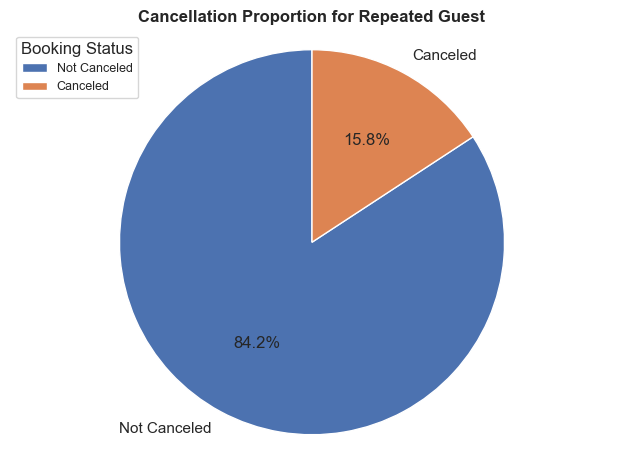

In [155]:
repeated = df_cleaned[df_cleaned['is_repeated_guest'] == 1]['is_canceled'].value_counts()
labels = ['Not Canceled', 'Canceled']

# plt.figure(figsize=(5,5))
plt.pie(repeated, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Cancellation Proportion for Repeated Guest', fontweight = 'bold')
plt.legend(loc = 'upper left', title = 'Booking Status', fontsize = 9)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [156]:
cancel_by_guest_type = (
    df_cleaned.groupby('is_repeated_guest')['is_canceled']
    .mean()
    .reset_index()
    .rename(columns={'is_canceled': 'cancellation_rate'})
)

cancel_by_guest_type

is_repeated_guest  cancellation_rate
0                  0           0.380212
1                  1           0.157714

This shows that guests with repeated bookings have lower cancellation rate than non repeated guests. This suggest that customer loyalty and prior experience might significantly influence cancellation behavior.

- **Trust and Familiarity**

    Repeated guests are already familiar with the hotel's service/product that reduces uncertainty that often leads to cancellations (e.g., fear of poor quality, mismatched expectations)

- **Intentionality of Bookings**

    Repeat guests often book with stronger intent (e.g., returning for a specific event, brand preference).

- **Rewards/Loyalty Programs**

    Incentives (e.g., discounts, perks for repeat customers) discourage cancellations to maintain benefits. For example, airlines waive cancellation fees for frequent flyers, but guests rarely us ethis option to preserve loyalty status.

- **Behavioral Patterns**

    Repeat guests may have more predictable schedules (e.g., business travelers with recurring trips) compared to one-time guests who face higher variability.

To further improve cancellation rate, hotel could consider:
1. **Boost Repeat Bookings**
    
    Launch targeted retention campaigns (e.g., discounts, personalized offers).

2. **Improve First-Time Guest Experience**

    Reduce cancellations among new guests by enhancing transparency (e.g., clear photos, reviews, flexible policies).

3. **Leverage Data**

    Identify "high-risk" new guests (e.g., those booking during peak cancellation weeks) and engage them preemptively (e.g., reminder emails with value-added contents).

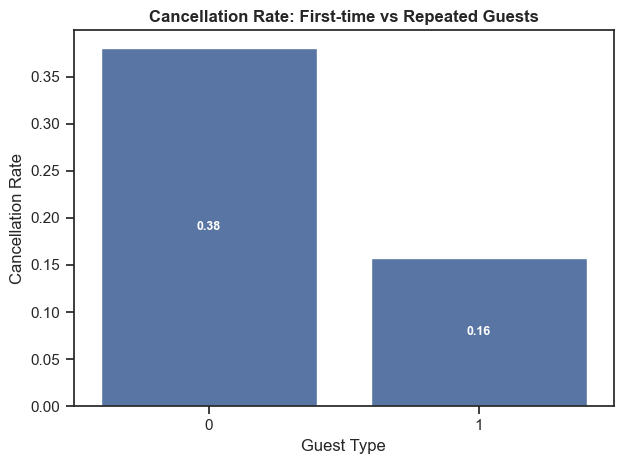

In [157]:
# plt.figure(figsize=(6, 4))
ax = sns.barplot(data=cancel_by_guest_type, x='is_repeated_guest', y='cancellation_rate')

# Add title and axis labels
ax.set_title('Cancellation Rate: First-time vs Repeated Guests', fontweight='bold')
ax.set_xlabel('Guest Type')
ax.set_ylabel('Cancellation Rate')

# Add value labels inside the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

To test the proportion using the z-test, the hypotheses are:
1. $H_0 = $ Cancellation rates are the same for both groups.
2. $H_1 = $ Cancellation rate is lower for repeated guests.

In [158]:
# Count cancellations in each group
repeated = df_cleaned[df_cleaned['is_repeated_guest'] == 1]
first_time = df_cleaned[df_cleaned['is_repeated_guest'] == 0]

# Successes (cancellations)
successes = [repeated['is_canceled'].sum(), first_time['is_canceled'].sum()]

# Observations (total bookings)
n_obs = [len(repeated), len(first_time)]

# Perform one-sided (repeated < first-time) z-test
zstat, pval = proportions_ztest(count=successes, nobs=n_obs, alternative='smaller')

print(f"Z-statistic: {zstat:.3f}")
print(f"P-value: {pval:.5f}")

Z-statistic: -26.804
P-value: 0.00000


With p-value below 0.05, we conclude to reject the null hypothesis. This showed a significantly lower cancellation rate among repeated guests (z = -26.804, p < 0.05), supporting the hypothesis that guest loyalty is associated with more reliable booking behavior.

#### Guest Profile and Cancellation Risk

In [159]:
family_cancel = (
    df_cleaned.groupby('is_family')['is_canceled']
    .mean()
    .reset_index()
    .replace({True: 'Family w/ Kids', False: 'No Kids'})
)

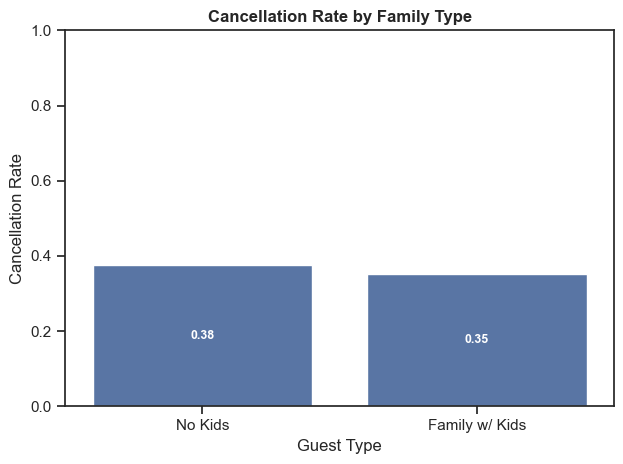

In [160]:
# plt.figure(figsize=(6, 4))
ax = sns.barplot(data=family_cancel, x='is_family', y='is_canceled')

# Add title and axis labels
ax.set_title('Cancellation Rate by Family Type', fontweight='bold')
ax.set_xlabel('Guest Type')
ax.set_ylabel('Cancellation Rate')
ax.set_ylim(0, 1)

# Add value labels inside the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

The chart clearly shows that people who don't have kids cancel their bookings about as often as families with kids. Both groups cancel roughly 37-38% of the time. 

This tells us that whether someone has children or not doesn't really affect how likely they are to cancel. So, if we want to stop cancellations, we shouldn't focus only on if they're a family or not. We should look at other reasons instead, like when they booked or how much they paid.

In [161]:
guests_cancel = (
    df_cleaned.groupby('total_guests')['is_canceled']
    .mean()
    .reset_index()
    .rename(columns={'is_canceled': 'cancellation_rate'})
)

guests_cancel

total_guests  cancellation_rate
0             0           0.326087
1             1           0.295861
2             2           0.399126
3             3           0.323310
4             4           0.420864
5             5           0.250000
6             6           1.000000
7            10           0.000000
8            12           0.000000

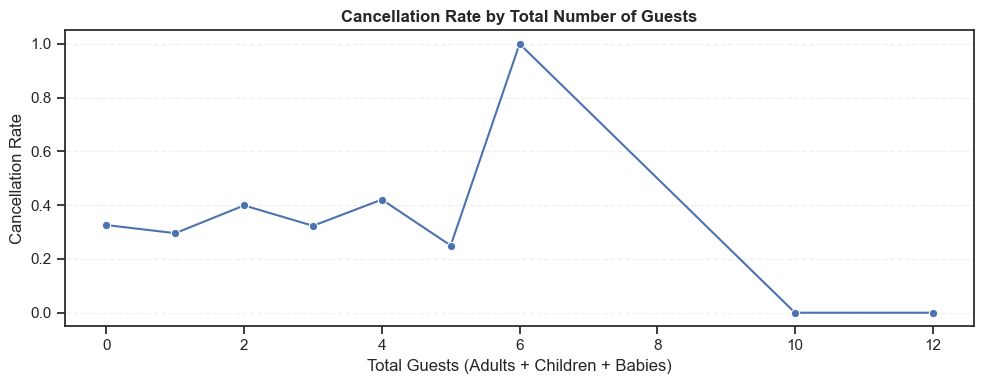

In [162]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=guests_cancel, x='total_guests', y='cancellation_rate', marker='o')
plt.title('Cancellation Rate by Total Number of Guests', fontweight = 'bold')
plt.xlabel('Total Guests (Adults + Children + Babies)')
plt.ylabel('Cancellation Rate')
# plt.xticks(range(df['total_guests'].min(), df['total_guests'].max()+1))
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

The biggest thing to notice is that bookings for 6 guests almost always get cancelled. This needs to be looked into immediately. Other small groups (0-5) cancel sometimes, but very large groups (10+) almost never do.

In [163]:
df_cleaned['has_children'] = df_cleaned['children'] > 0
df_cleaned['has_babies'] = df_cleaned['babies'] > 0

In [164]:
# Children
children_cancel = df_cleaned.groupby('has_children')['is_canceled'].mean().reset_index()
children_cancel['Group'] = children_cancel['has_children'].map({True: 'With Children', False: 'No Children'})

# Babies
babies_cancel = df_cleaned.groupby('has_babies')['is_canceled'].mean().reset_index()
babies_cancel['Group'] = babies_cancel['has_babies'].map({True: 'With Babies', False: 'No Babies'})

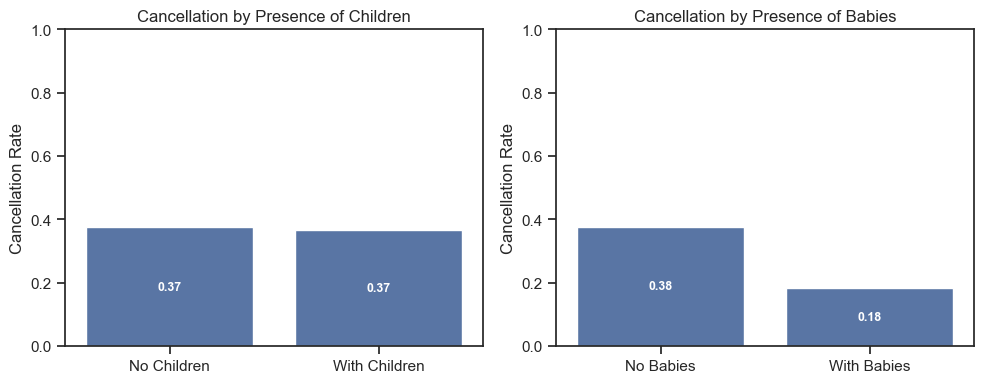

In [165]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# First subplot: Children
sns.barplot(data=children_cancel, x='Group', y='is_canceled', ax=axes[0])
axes[0].set_title('Cancellation by Presence of Children')
axes[0].set_ylabel('Cancellation Rate')
axes[0].set_xlabel('')

# Second subplot: Babies
sns.barplot(data=babies_cancel, x='Group', y='is_canceled', ax=axes[1])
axes[1].set_title('Cancellation by Presence of Babies')
axes[1].set_ylabel('Cancellation Rate')
axes[1].set_xlabel('')

# Add value labels inside each bar
for ax in axes:
    ax.set_ylim(0, 1)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center', color='white', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()


Bookings with older children cancel at the same rate as bookings without them. However, bookings that include babies are much less likely to be cancelled. This suggests that people traveling with babies are more committed to their bookings.

In [166]:
# Group counts
family_yes = df_cleaned[df_cleaned['is_family'] == True]
family_no = df_cleaned[df_cleaned['is_family'] == False]

successes = [family_yes['is_canceled'].sum(), family_no['is_canceled'].sum()]
n_obs = [len(family_yes), len(family_no)]

zstat, pval = proportions_ztest(count=successes, nobs=n_obs, alternative='two-sided')

print(f"Z-statistic: {zstat:.3f}")
print(f"P-value: {pval:.5f}")

Z-statistic: -4.620
P-value: 0.00000


In [167]:
mean_adr = df_cleaned.groupby('is_canceled')[['adr', 'lead_time', 'is_repeated_guest']].mean()
mean_adr

adr   lead_time  is_repeated_guest
is_canceled                                           
0            101.220794   80.820482           0.039839
1            104.948247  144.872604           0.012506

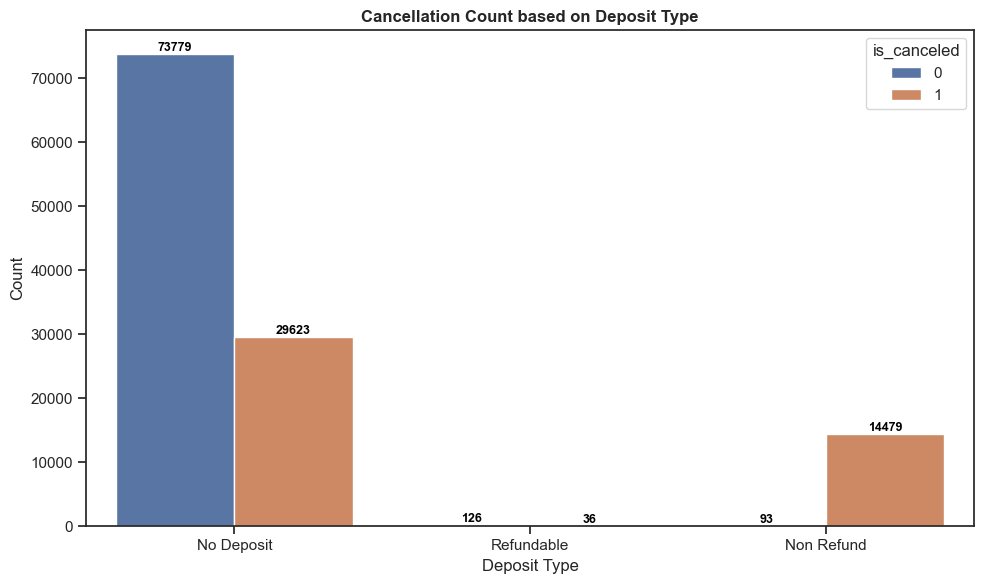

In [168]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='deposit_type', hue='is_canceled', data=df_cleaned)
ax.set_title('Cancellation Count based on Deposit Type', fontweight='bold')
ax.set_ylabel('Count')
ax.set_xlabel('Deposit Type')

# Add value labels inside each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', color='black', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

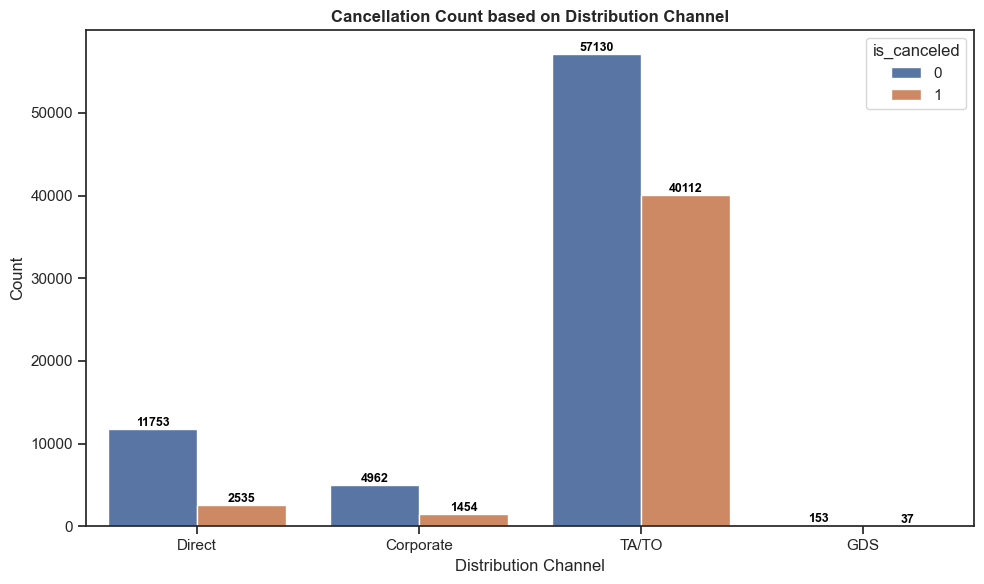

In [169]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='distribution_channel', hue='is_canceled', data=df_cleaned)

# Title and axis labels
ax.set_title('Cancellation Count based on Distribution Channel', fontweight='bold')
ax.set_ylabel('Count')
ax.set_xlabel('Distribution Channel')

# Add value labels inside each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', color='black', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

Most bookings come from Travel Agents/Tour Operators, and this is also where most cancellations happen. Direct bookings are more reliable (fewer cancellations). Corporate and GDS channels are not used much.

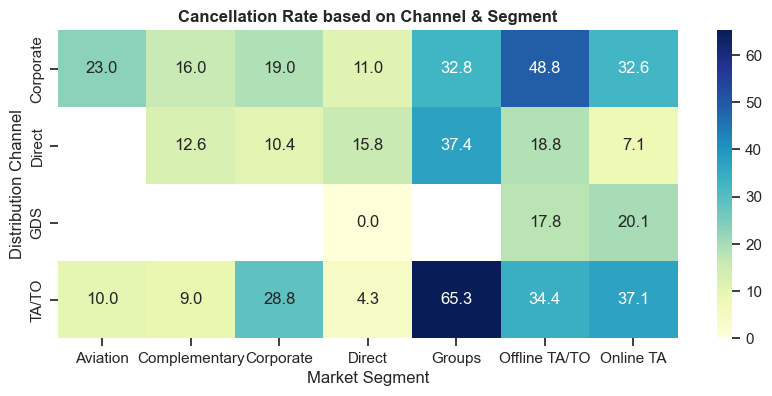

In [170]:
pivot = df_cleaned.pivot_table(index = 'distribution_channel', columns = 'market_segment', 
                       values = 'is_canceled', aggfunc = 'mean')

plt.figure(figsize=(10, 4))
sns.heatmap(pivot*100, annot = True, fmt = '.1f', cmap = 'YlGnBu')
plt.title('Cancellation Rate based on Channel & Segment', fontweight = 'bold')
plt.xlabel('Market Segment')
plt.ylabel('Distribution Channel')
plt.show()

The biggest issue is "Groups", they cancel their bookings much more often, especially when booked through Travel Agents/Tour Operators or Corporate channels. On the other hand, bookings for aviation, complimentary, and large groups booked directly or through GDS are very reliable and rarely cancel.

#### Does length of stay affect the likelihood of cancellation?

In [171]:
# Group by total nights
stay_cancel = (
    df_cleaned[df_cleaned['stay_total_nights'] > 0]  # Exclude zero-night bookings
    .groupby('stay_total_nights')['is_canceled']
    .mean()
    .reset_index()
    .rename(columns={'is_canceled': 'cancellation_rate'})
)

# Count for plotting context
stay_counts = df_cleaned['stay_total_nights'].value_counts().sort_index()

# Optional: Filter only popular lengths to avoid sparse data
filtered_stay_cancel = stay_cancel[stay_cancel['stay_total_nights'] <= 15]

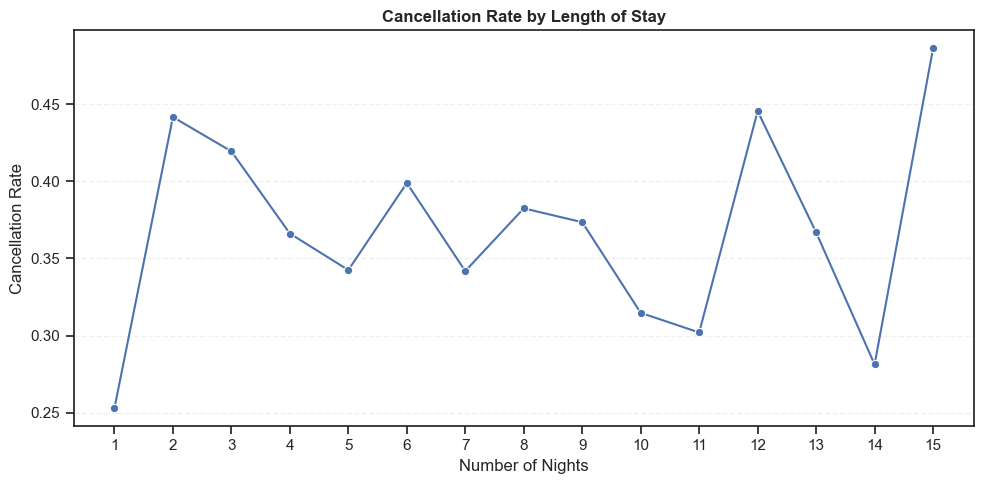

In [172]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=filtered_stay_cancel, x='stay_total_nights', y='cancellation_rate', marker='o')
plt.title('Cancellation Rate by Length of Stay', fontweight = 'bold')
plt.xlabel('Number of Nights')
plt.ylabel('Cancellation Rate')
plt.xticks(range(1, 16))
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Bookings for 2 nights, 12 nights, and especially 15 nights are the most likely to be cancelled. Stays of 1 night, 10-11 nights, and 14 nights tend to have lower cancellation rates. This chart suggests that the duration of the stay clearly affects how often bookings get cancelled.

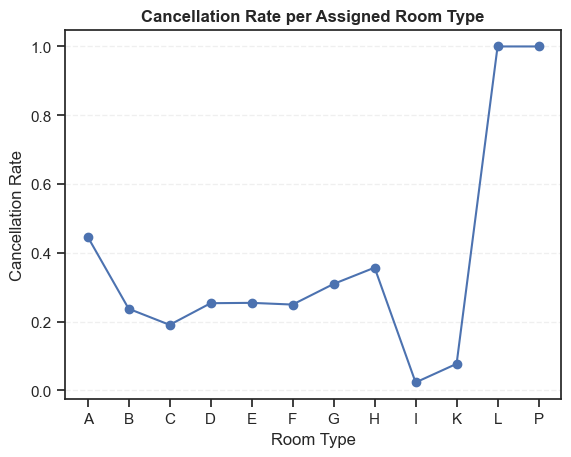

In [173]:
room_cancel = df_cleaned.groupby('assigned_room_type')['is_canceled'].mean()

plt.plot(room_cancel.index, room_cancel.values, marker='o',)
plt.title('Cancellation Rate per Assigned Room Type', fontweight = 'bold')
plt.xlabel('Room Type')
plt.ylabel('Cancellation Rate')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Bookings for Room Types L and P are always cancelled, which is a big problem. Room Type A also has a higher cancellation rate. On the other hand, Room Types I and K are very safe and rarely cancelled. For most other room types, cancellations happen at a moderate rate.

C:\Users\Dell\AppData\Local\Temp\ipykernel_68300\2034479068.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_cancel_rate = df_cleaned.groupby('lead_time_bin')['is_canceled'].mean()


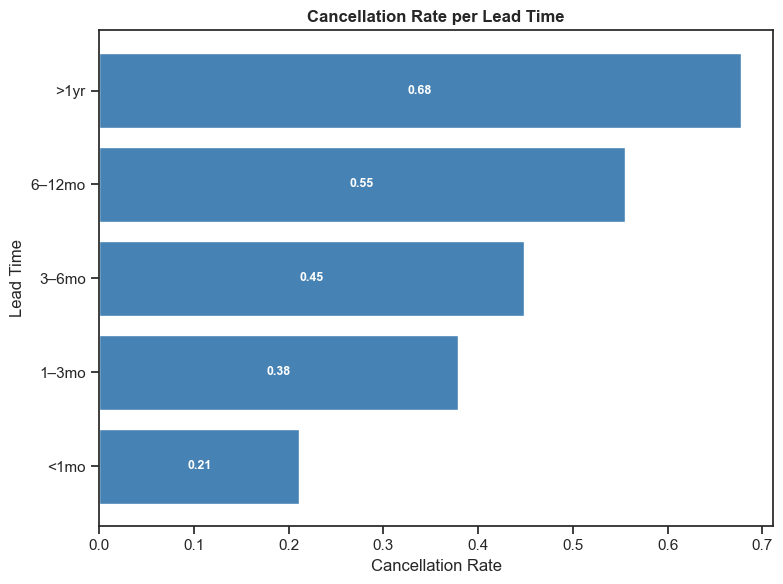

In [174]:
lead_cancel_rate = df_cleaned.groupby('lead_time_bin')['is_canceled'].mean()

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(lead_cancel_rate.index, lead_cancel_rate.values, color='steelblue')
ax.set_title('Cancellation Rate per Lead Time', fontweight='bold')
ax.set_xlabel('Cancellation Rate')
ax.set_ylabel('Lead Time')

# Add labels inside the bars
ax.bar_label(bars, fmt='%.2f', label_type='center', color='white', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()


This bar chart shows how cancellation rates vary based on how far in advance booking are made. The x-axis represents different lead time brackets, while y-axis shows cancellation rates from 0% to 70%. From this bar chart, we can know:

1. **High Lead Times = Higher Cancellations**
    
    Bookings made > 1 year in advance likely have the highest cancellation rates (potentially approaching 70%). This might be due to impulse bookings in advance to get best room price, last-minute changes, or emergencies disrupts plans.

2. **Short Lead Times = Lower Cancellations**

    Bookings made < 1 month in advance show the lowest cancellation rates (closer to 0%). This might due to bookings made close to the date often involve urgent/planned needs, where cancellations are costlier or less likely.


Recommendations to mitigate the risks of higher cancellation:
- **For Long Lead Times**
    
    *Flexible Policies* - Offer "free rescheduling" (not refunds) to retain revenue.

- **For Short Lead Times**

    *Capitalize on Low Risk* - Overbook strategically (if cancellations are rare) or offer last-minute discounts to fill inventory.

## **Modelling**

In [175]:
df_model = df_cleaned.copy()

We drop the a few columns that might trigger data leakage into model.
- `assigned_room_type`
- `reservation_status`
- `reservation_status_date`

In [176]:
num_features = ['adr', 'adults', 'arrival_date_day_of_month', 'arrival_date_week_number', 'arrival_date_year',
                'babies', 'booking_changes', 'children', 'days_in_waiting_list', 'lead_time', 'previous_bookings_not_canceled',
                'previous_cancellations', 'required_car_parking_spaces', 'stays_in_weekend_nights', 'stays_in_week_nights',
                'total_of_special_requests']

cat_features = ['arrival_date_month', 'country', 'customer_type', 'deposit_type', 'distribution_channel', 
                'hotel', 'is_repeated_guest', 'market_segment', 'meal', 'reserved_room_type']

In [177]:
results = {
    col: (
        lambda vc: {
            'Total unique labels': len(vc),
            '# of labels commonly used': (vc >= 0.05).sum(),
            '# of labels not commonly used': (vc < 0.05).sum()
        }
    )(df[col].value_counts(normalize=True))
    if col in df_model[cat_features] else "Column not found in DataFrame"
    for col in cat_features
}

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

Total unique labels  # of labels commonly used  \
arrival_date_month                     12                         11   
country                               176                          5   
customer_type                           4                          2   
deposit_type                            3                          2   
distribution_channel                    4                          3   
hotel                                   2                          2   
is_repeated_guest                       2                          1   
market_segment                          7                          4   
meal                                    5                          3   
reserved_room_type                     10                          3   

                      # of labels not commonly used  
arrival_date_month                                1  
country                                         171  
customer_type                                     2  
deposit_type                                      1  
distribution_channel                              1  
hotel                                             0  
is_repeated_guest                                 1  
market_segment                                    3  
meal                                              2  
reserved_room_type                                7

In [178]:
baseline_features = num_features + cat_features

In [179]:
# Define X and y
X = df_model[baseline_features]
y = df_model['is_canceled']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

### **Baseline**

In [180]:
class BinaryEncoderWrapper(BaseEstimator):
    """Wrapper to make BinaryEncoder fully sklearn-compatible"""
    def __init__(self):
        self.encoder = BinaryEncoder()
    
    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self
    
    def transform(self, X):
        return self.encoder.transform(X)
    
    def get_feature_names_out(self, input_features=None):
        return self.encoder.get_feature_names()

In [181]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat_one', OneHotEncoder(drop='first', handle_unknown='ignore'), [
        'arrival_date_month', 'customer_type', 'deposit_type', 'distribution_channel',
        'hotel', 'is_repeated_guest', 'market_segment', 'meal', 'reserved_room_type'
    ]),
    ('cat_binary', BinaryEncoderWrapper(), ['country'])
])

In [182]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

In [183]:
def evaluate_model(model, X_train, y_train, X_test, y_test, sampling = None, print_report = True):
    '''
    Evaluates a model and optionally prints the classification report.

    Args:
        print_report (bool): If True, prints the classification report. Always retun the report dict.
    '''

    # Choose pipeline based on sampling
    if sampling == 'undersample':
        pipe = ImbPipeline([
            ('preprocessor', preprocessor),
            ('undersampler', RandomUnderSampler(random_state=42)),
            ('classifier', model)
        ])
    else:
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
    
    # Train and evaluate
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    f2 = fbeta_score(y_test, y_pred, beta = 2, pos_label = 1)

    report['f1_score'] = f1
    report['f2_score'] = f2

    # Print the classification report if requested
    if print_report:
        print(f"\n{'-' * 50}")
        print(f"Model: {model.__class__.__name__} | Sampling: {'Undersampled' if sampling else 'None'}")
        print(f"{'-' * 50}")
        print(classification_report(y_test, y_pred))
        print(f"F1 Score: {f1:.4f}")
        print(f"F2 Score: {f2:.4f}")

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize = (6, 5))
        sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
                    xticklabels = ['Predicted 0', 'Predicted 1'],
                    yticklabels = ['Actual 0', 'Actual 1'])
        plt.title(f'{model.__class__.__name__} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()
    
    return report


--------------------------------------------------
Model: LogisticRegression | Sampling: None
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     14800
           1       0.82      0.63      0.71      8828

    accuracy                           0.81     23628
   macro avg       0.81      0.77      0.78     23628
weighted avg       0.81      0.81      0.80     23628

F1 Score: 0.7119
F2 Score: 0.6616


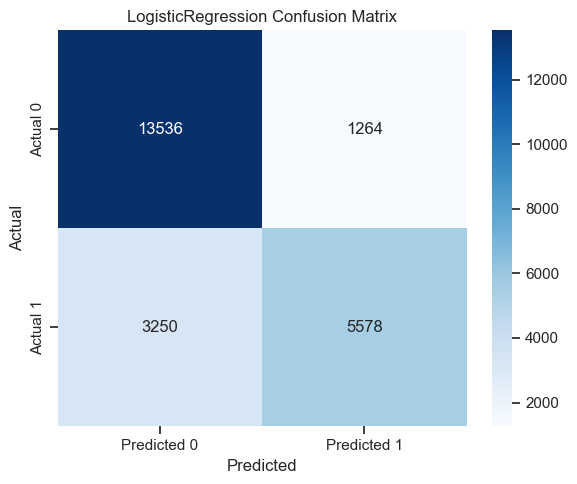


--------------------------------------------------
Model: LogisticRegression | Sampling: Undersampled
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     14800
           1       0.71      0.74      0.73      8828

    accuracy                           0.79     23628
   macro avg       0.78      0.78      0.78     23628
weighted avg       0.79      0.79      0.79     23628

F1 Score: 0.7257
F2 Score: 0.7356


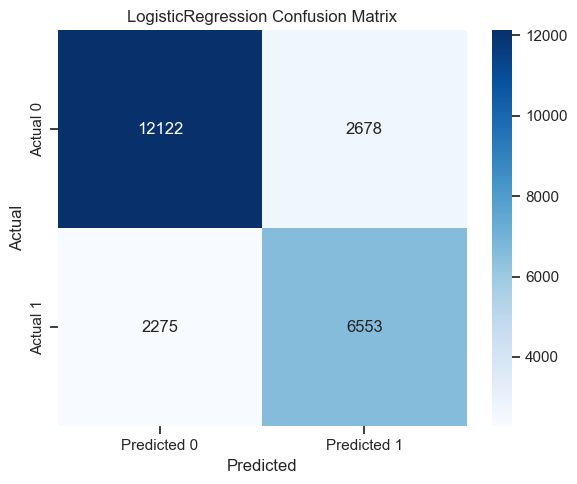


--------------------------------------------------
Model: DecisionTreeClassifier | Sampling: None
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     14800
           1       0.79      0.79      0.79      8828

    accuracy                           0.84     23628
   macro avg       0.83      0.83      0.83     23628
weighted avg       0.84      0.84      0.84     23628

F1 Score: 0.7910
F2 Score: 0.7920


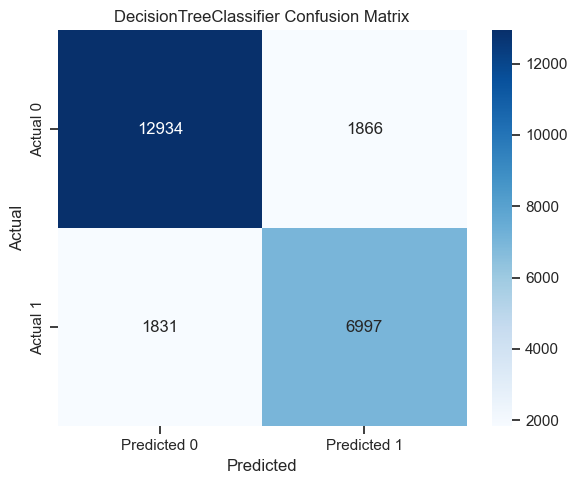


--------------------------------------------------
Model: DecisionTreeClassifier | Sampling: Undersampled
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.82      0.86     14800
           1       0.74      0.84      0.78      8828

    accuracy                           0.83     23628
   macro avg       0.82      0.83      0.82     23628
weighted avg       0.84      0.83      0.83     23628

F1 Score: 0.7839
F2 Score: 0.8141


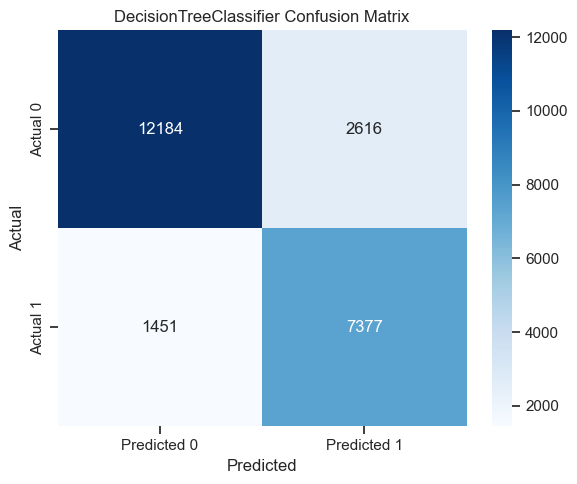


--------------------------------------------------
Model: KNeighborsClassifier | Sampling: None
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.88      0.87     14800
           1       0.79      0.75      0.77      8828

    accuracy                           0.83     23628
   macro avg       0.82      0.81      0.82     23628
weighted avg       0.83      0.83      0.83     23628

F1 Score: 0.7670
F2 Score: 0.7561


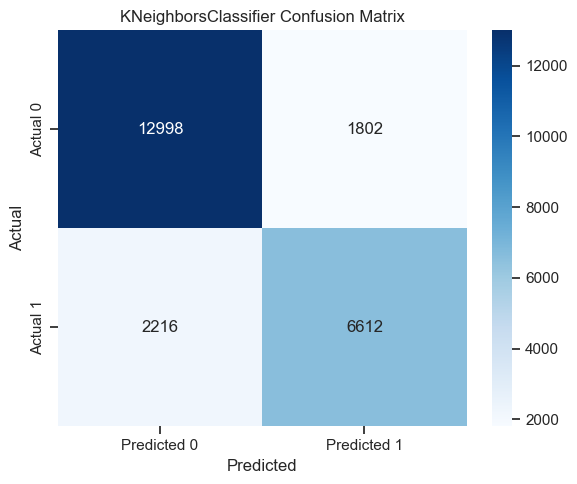


--------------------------------------------------
Model: KNeighborsClassifier | Sampling: Undersampled
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     14800
           1       0.71      0.82      0.76      8828

    accuracy                           0.81     23628
   macro avg       0.79      0.81      0.80     23628
weighted avg       0.82      0.81      0.81     23628

F1 Score: 0.7582
F2 Score: 0.7923


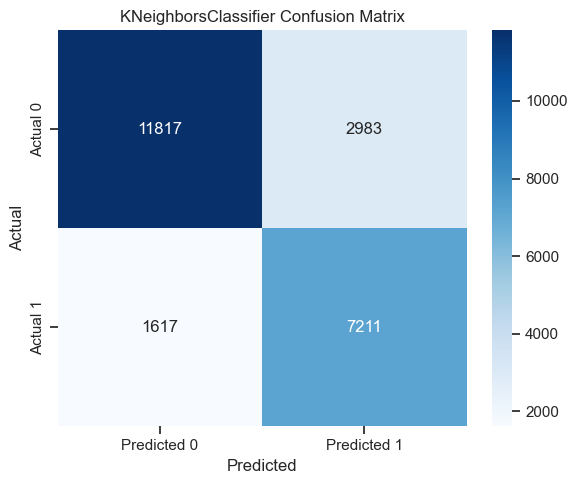


--------------------------------------------------
Model: RandomForestClassifier | Sampling: None
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     14800
           1       0.88      0.80      0.84      8828

    accuracy                           0.89     23628
   macro avg       0.88      0.87      0.87     23628
weighted avg       0.89      0.89      0.88     23628

F1 Score: 0.8385
F2 Score: 0.8132


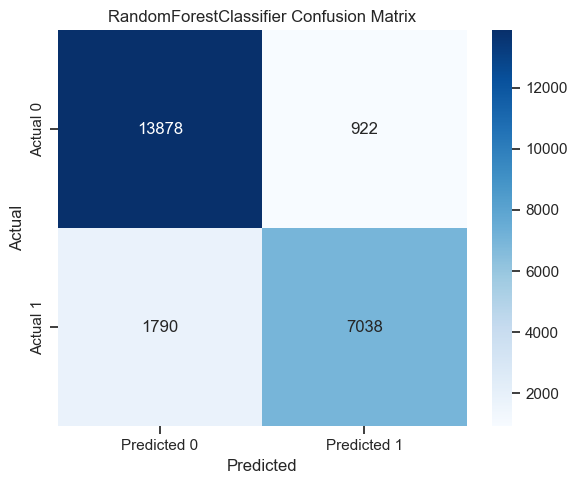


--------------------------------------------------
Model: RandomForestClassifier | Sampling: Undersampled
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     14800
           1       0.82      0.86      0.84      8828

    accuracy                           0.88     23628
   macro avg       0.86      0.87      0.87     23628
weighted avg       0.88      0.88      0.88     23628

F1 Score: 0.8375
F2 Score: 0.8508


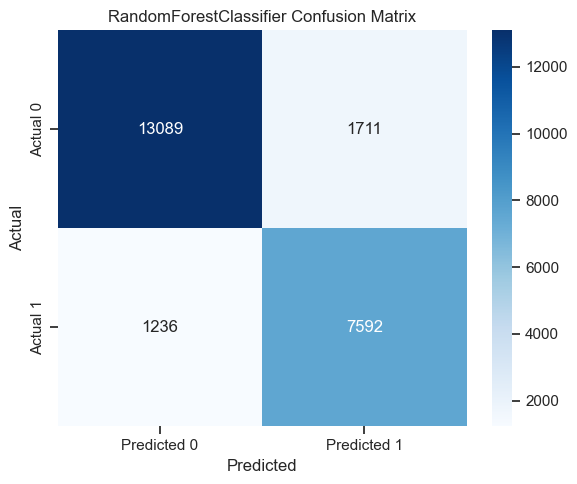


--------------------------------------------------
Model: GradientBoostingClassifier | Sampling: None
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     14800
           1       0.85      0.68      0.76      8828

    accuracy                           0.84     23628
   macro avg       0.84      0.81      0.82     23628
weighted avg       0.84      0.84      0.83     23628

F1 Score: 0.7569
F2 Score: 0.7111


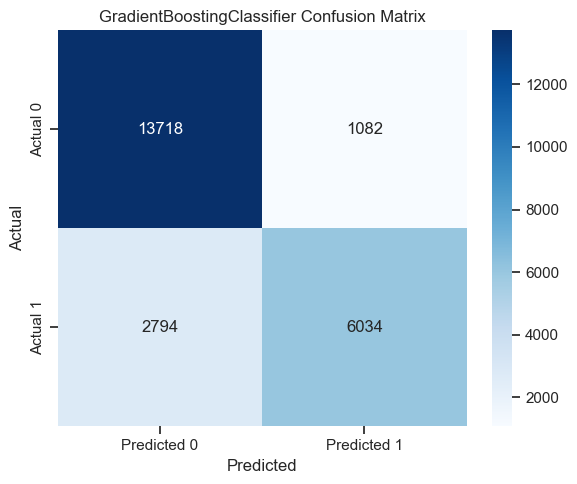


--------------------------------------------------
Model: GradientBoostingClassifier | Sampling: Undersampled
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     14800
           1       0.76      0.80      0.78      8828

    accuracy                           0.83     23628
   macro avg       0.82      0.83      0.82     23628
weighted avg       0.84      0.83      0.83     23628

F1 Score: 0.7820
F2 Score: 0.7939


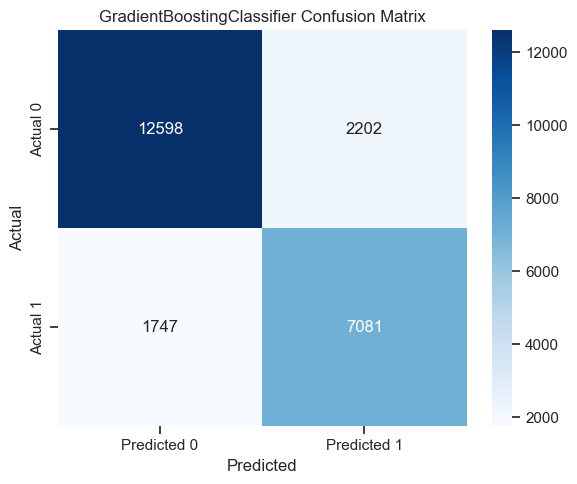


--------------------------------------------------
Model: AdaBoostClassifier | Sampling: None
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.96      0.86     14800
           1       0.89      0.54      0.67      8828

    accuracy                           0.80     23628
   macro avg       0.83      0.75      0.76     23628
weighted avg       0.82      0.80      0.79     23628

F1 Score: 0.6689
F2 Score: 0.5825


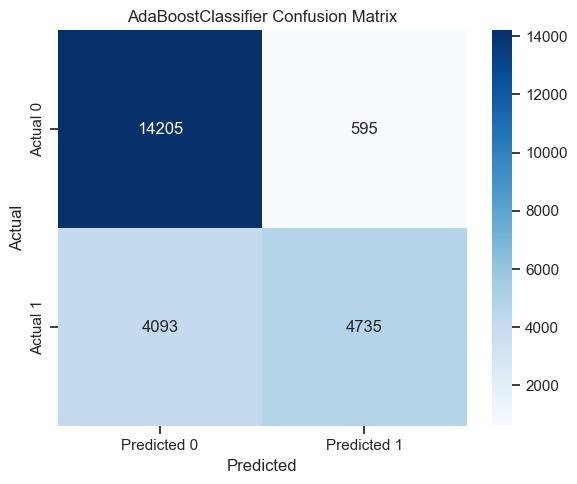


--------------------------------------------------
Model: AdaBoostClassifier | Sampling: Undersampled
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     14800
           1       0.73      0.72      0.73      8828

    accuracy                           0.80     23628
   macro avg       0.78      0.78      0.78     23628
weighted avg       0.80      0.80      0.80     23628

F1 Score: 0.7263
F2 Score: 0.7254


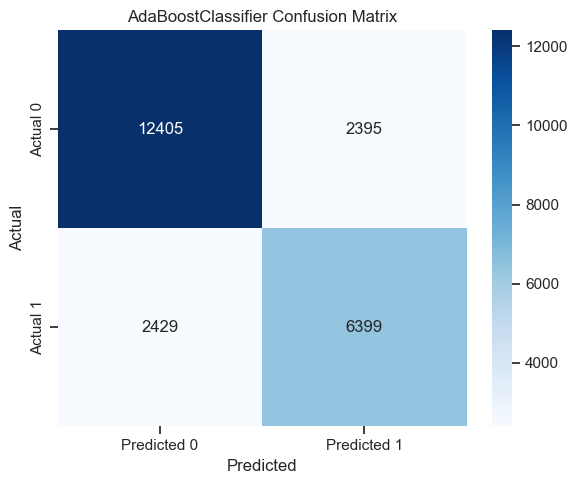


--------------------------------------------------
Model: ExtraTreesClassifier | Sampling: None
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     14800
           1       0.87      0.79      0.83      8828

    accuracy                           0.88     23628
   macro avg       0.88      0.86      0.87     23628
weighted avg       0.88      0.88      0.88     23628

F1 Score: 0.8322
F2 Score: 0.8089


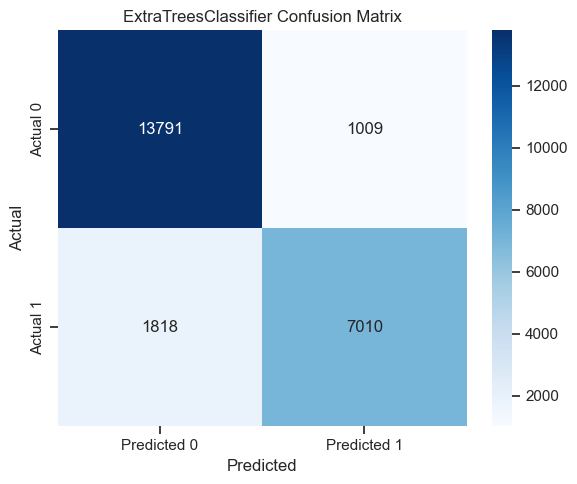


--------------------------------------------------
Model: ExtraTreesClassifier | Sampling: Undersampled
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     14800
           1       0.80      0.85      0.83      8828

    accuracy                           0.87     23628
   macro avg       0.86      0.86      0.86     23628
weighted avg       0.87      0.87      0.87     23628

F1 Score: 0.8281
F2 Score: 0.8430


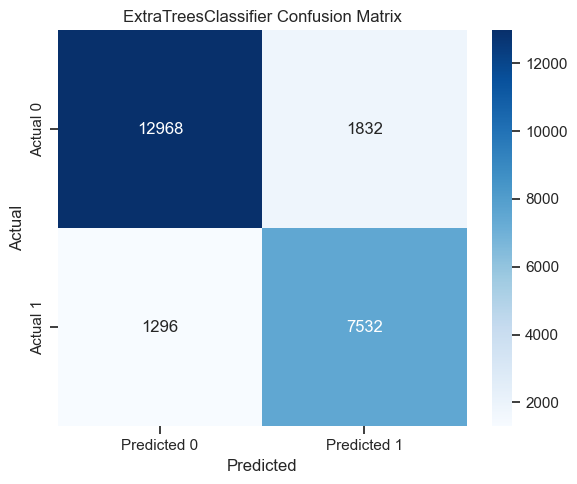


--------------------------------------------------
Model: XGBClassifier | Sampling: None
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     14800
           1       0.85      0.78      0.82      8828

    accuracy                           0.87     23628
   macro avg       0.86      0.85      0.86     23628
weighted avg       0.87      0.87      0.87     23628

F1 Score: 0.8155
F2 Score: 0.7955


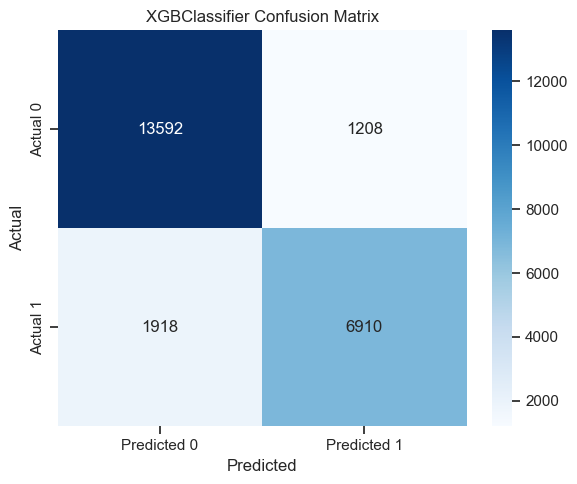


--------------------------------------------------
Model: XGBClassifier | Sampling: Undersampled
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     14800
           1       0.78      0.86      0.82      8828

    accuracy                           0.86     23628
   macro avg       0.85      0.86      0.85     23628
weighted avg       0.86      0.86      0.86     23628

F1 Score: 0.8182
F2 Score: 0.8425


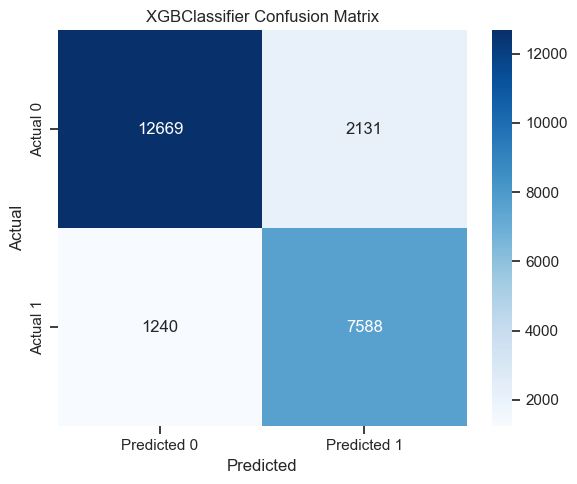

[LightGBM] [Info] Number of positive: 35310, number of negative: 59198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 94508, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373619 -> initscore=-0.516722
[LightGBM] [Info] Start training from score -0.516722


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--------------------------------------------------
Model: LGBMClassifier | Sampling: None
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     14800
           1       0.84      0.77      0.80      8828

    accuracy                           0.86     23628
   macro avg       0.86      0.84      0.85     23628
weighted avg       0.86      0.86      0.86     23628

F1 Score: 0.8048
F2 Score: 0.7827


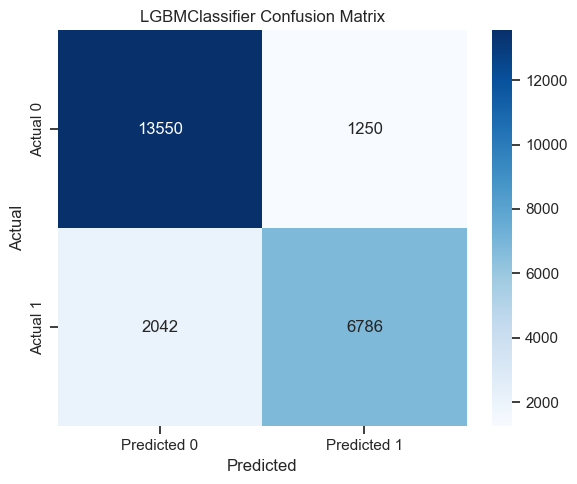

[LightGBM] [Info] Number of positive: 35310, number of negative: 35310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 70620, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--------------------------------------------------
Model: LGBMClassifier | Sampling: Undersampled
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     14800
           1       0.78      0.84      0.81      8828

    accuracy                           0.85     23628
   macro avg       0.84      0.85      0.85     23628
weighted avg       0.86      0.85      0.85     23628

F1 Score: 0.8112
F2 Score: 0.8308


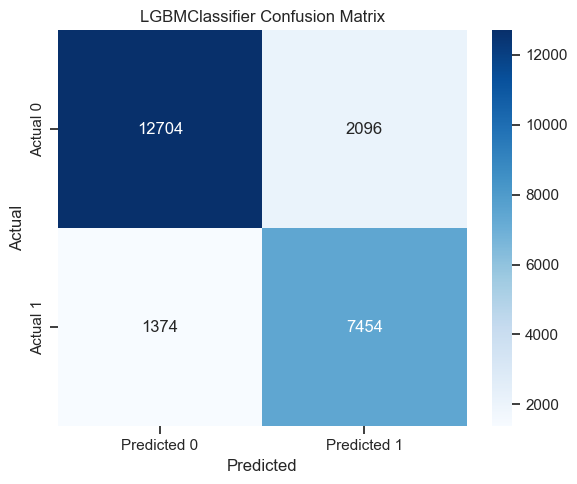


--------------------------------------------------
Model: CatBoostClassifier | Sampling: None
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     14800
           1       0.85      0.79      0.82      8828

    accuracy                           0.87     23628
   macro avg       0.87      0.85      0.86     23628
weighted avg       0.87      0.87      0.87     23628

F1 Score: 0.8210
F2 Score: 0.8023


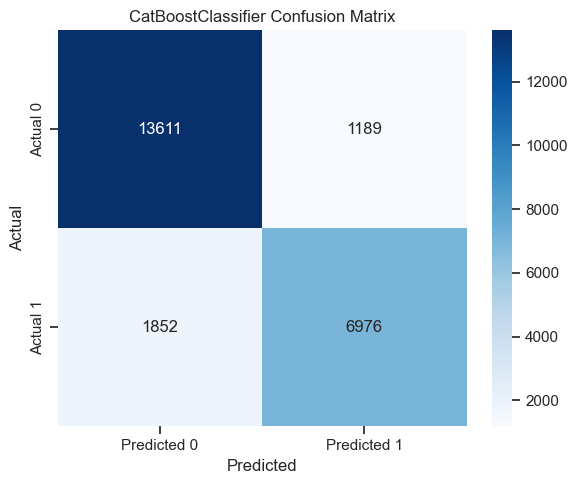


--------------------------------------------------
Model: CatBoostClassifier | Sampling: Undersampled
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     14800
           1       0.79      0.86      0.82      8828

    accuracy                           0.86     23628
   macro avg       0.85      0.86      0.85     23628
weighted avg       0.87      0.86      0.86     23628

F1 Score: 0.8225
F2 Score: 0.8430


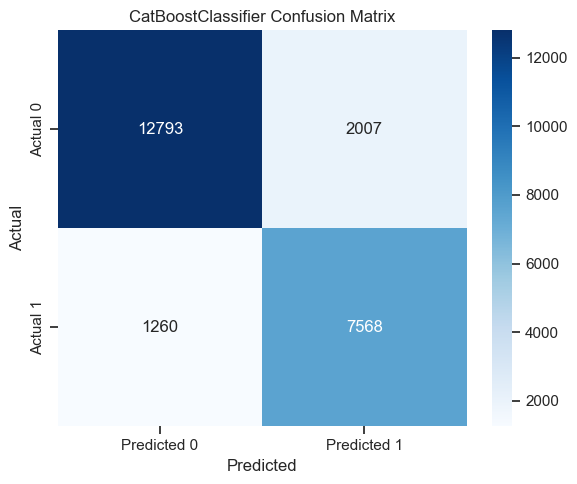

In [184]:
results_no_sampling = {}
results_undersampled = {}

for name, model in models.items():
    results_no_sampling[name] = evaluate_model(model, X_train, y_train, X_test, y_test)
    results_undersampled[name] = evaluate_model(model, X_train, y_train, X_test, y_test, sampling='undersample')

# Convert to DataFrame for comparison
df_no_sampling = pd.DataFrame(results_no_sampling).T
df_undersampled = pd.DataFrame(results_undersampled).T

In [185]:
df_no_sampling

0  \
Logistic Regression  {'precision': 0.8063862742761825, 'recall': 0....   
Decision Tree        {'precision': 0.875990518117169, 'recall': 0.8...   
KNN                  {'precision': 0.8543446825292493, 'recall': 0....   
Random Forest        {'precision': 0.8857544038805208, 'recall': 0....   
Gradient Boosting    {'precision': 0.8307897286821705, 'recall': 0....   
AdaBoost             {'precision': 0.7763143512952235, 'recall': 0....   
Extra Trees          {'precision': 0.8835287334230252, 'recall': 0....   
XGBoost              {'precision': 0.8763378465506125, 'recall': 0....   
LightGBM             {'precision': 0.8690354027706516, 'recall': 0....   
CatBoost             {'precision': 0.8802302269934683, 'recall': 0....   

                                                                     1  \
Logistic Regression  {'precision': 0.8152586962876351, 'recall': 0....   
Decision Tree        {'precision': 0.7894618075143857, 'recall': 0....   
KNN                  {'precision': 0.7858331352507725, 'recall': 0....   
Random Forest        {'precision': 0.8841708542713568, 'recall': 0....   
Gradient Boosting    {'precision': 0.8479482855536818, 'recall': 0....   
AdaBoost             {'precision': 0.8883677298311444, 'recall': 0....   
Extra Trees          {'precision': 0.8741738371368001, 'recall': 0....   
XGBoost              {'precision': 0.8511948755851195, 'recall': 0....   
LightGBM             {'precision': 0.844449975111996, 'recall': 0.7...   
CatBoost             {'precision': 0.8543784445805266, 'recall': 0....   

                     accuracy  \
Logistic Regression  0.808955   
Decision Tree        0.843533   
KNN                  0.829948   
Random Forest        0.885221   
Gradient Boosting    0.835957   
AdaBoost             0.801591   
Extra Trees          0.880354   
XGBoost              0.867699   
LightGBM             0.860674   
CatBoost             0.871297   

                                                             macro avg  \
Logistic Regression  {'precision': 0.8108224852819088, 'recall': 0....   
Decision Tree        {'precision': 0.8327261628157774, 'recall': 0....   
KNN                  {'precision': 0.820088908890011, 'recall': 0.8...   
Random Forest        {'precision': 0.8849626290759388, 'recall': 0....   
Gradient Boosting    {'precision': 0.8393690071179262, 'recall': 0....   
AdaBoost             {'precision': 0.8323410405631839, 'recall': 0....   
Extra Trees          {'precision': 0.8788512852799126, 'recall': 0....   
XGBoost              {'precision': 0.8637663610678661, 'recall': 0....   
LightGBM             {'precision': 0.8567426889413239, 'recall': 0....   
CatBoost             {'precision': 0.8673043357869974, 'recall': 0....   

                                                          weighted avg  \
Logistic Regression  {'precision': 0.8097012286319091, 'recall': 0....   
Decision Tree        {'precision': 0.8436612707326518, 'recall': 0....   
KNN                  {'precision': 0.8287470890226303, 'recall': 0....   
Random Forest        {'precision': 0.8851627509285275, 'recall': 0....   
Gradient Boosting    {'precision': 0.837200586142036, 'recall': 0.8...   
AdaBoost             {'precision': 0.8181802403131306, 'recall': 0....   
Extra Trees          {'precision': 0.8800335148512123, 'recall': 0....   
XGBoost              {'precision': 0.8669438162609828, 'recall': 0....   
LightGBM             {'precision': 0.8598496843276767, 'recall': 0....   
CatBoost             {'precision': 0.8705713673717717, 'recall': 0....   

                     f1_score  f2_score  
Logistic Regression  0.711934  0.661622  
Decision Tree        0.791024  0.791964  
KNN                  0.766964  0.756072  
Random Forest        0.838456  0.813228  
Gradient Boosting    0.756899  0.711087  
AdaBoost              0.66888  0.582525  
Extra Trees          0.832196   0.80889  
XGBoost              0.815532  0.795533  
LightGBM             0.804791  0.782735  
CatBoost             0.82

In [186]:
df_undersampled

0  \
Logistic Regression  {'precision': 0.8419809682572759, 'recall': 0....   
Decision Tree        {'precision': 0.8935826916024936, 'recall': 0....   
KNN                  {'precision': 0.8796337650736936, 'recall': 0....   
Random Forest        {'precision': 0.913717277486911, 'recall': 0.8...   
Gradient Boosting    {'precision': 0.878215406064831, 'recall': 0.8...   
AdaBoost             {'precision': 0.8362545503572874, 'recall': 0....   
Extra Trees          {'precision': 0.9091418956814358, 'recall': 0....   
XGBoost              {'precision': 0.9108490905169315, 'recall': 0....   
LightGBM             {'precision': 0.9024009092200597, 'recall': 0....   
CatBoost             {'precision': 0.9103394293033515, 'recall': 0....   

                                                                     1  \
Logistic Regression  {'precision': 0.7098905860686816, 'recall': 0....   
Decision Tree        {'precision': 0.7382167517262084, 'recall': 0....   
KNN                  {'precision': 0.7073768883657053, 'recall': 0....   
Random Forest        {'precision': 0.8160808341395249, 'recall': 0....   
Gradient Boosting    {'precision': 0.762792200797156, 'recall': 0.8...   
AdaBoost             {'precision': 0.727655219467819, 'recall': 0.7...   
Extra Trees          {'precision': 0.8043571123451516, 'recall': 0....   
XGBoost              {'precision': 0.7807387591315978, 'recall': 0....   
LightGBM             {'precision': 0.780523560209424, 'recall': 0.8...   
CatBoost             {'precision': 0.7903916449086162, 'recall': 0....   

                     accuracy  \
Logistic Regression  0.790376   
Decision Tree        0.827874   
KNN                  0.805316   
Random Forest        0.875275   
Gradient Boosting    0.832868   
AdaBoost             0.795835   
Extra Trees          0.867615   
XGBoost               0.85733   
LightGBM              0.85314   
CatBoost             0.861732   

                                                             macro avg  \
Logistic Regression  {'precision': 0.7759357771629787, 'recall': 0....   
Decision Tree        {'precision': 0.815899721664351, 'recall': 0.8...   
KNN                  {'precision': 0.7935053267196994, 'recall': 0....   
Random Forest        {'precision': 0.8648990558132179, 'recall': 0....   
Gradient Boosting    {'precision': 0.8205038034309935, 'recall': 0....   
AdaBoost             {'precision': 0.7819548849125532, 'recall': 0....   
Extra Trees          {'precision': 0.8567495040132938, 'recall': 0....   
XGBoost              {'precision': 0.8457939248242647, 'recall': 0....   
LightGBM             {'precision': 0.8414622347147418, 'recall': 0....   
CatBoost             {'precision': 0.850365537105984, 'recall': 0.8...   

                                                          weighted avg  \
Logistic Regression  {'precision': 0.7926287635018624, 'recall': 0....   
Decision Tree        {'precision': 0.8355341679344792, 'recall': 0....   
KNN                  {'precision': 0.8152743733529335, 'recall': 0....   
Random Forest        {'precision': 0.877237908861944, 'recall': 0.8...   
Gradient Boosting    {'precision': 0.8350904671744029, 'recall': 0....   
AdaBoost             {'precision': 0.7956791782101642, 'recall': 0....   
Extra Trees          {'precision': 0.86999173200729, 'recall': 0.86...   
XGBoost              {'precision': 0.8622366812791744, 'recall': 0....   
LightGBM             {'precision': 0.8568645440149686, 'recall': 0....   
CatBoost             {'precision': 0.8655239967387367, 'recall': 0....   

                     f1_score  f2_score  
Logistic Regression  0.725732  0.735581  
Decision Tree        0.783912  0.814149  
KNN                  0.758175  0.792313  
Random Forest        0.837461  0.850835  
Gradient Boosting    0.781956  0.793923  
AdaBoost             0.726251  0.725412  
Extra Trees          0.828056  0.842958  
XGBoost              0.818246  0.842531  
LightGBM             0.811187   0.83077  
CatBoost             0.82

In [187]:
def generate_markdown_table(results_dict, title):
    markdown = f"### {title}\n"
    markdown += "| Model              | Class | Precision | Recall | F1-Score | Support |\n"
    markdown += "|--------------------|-------|-----------|--------|----------|---------|\n"
    
    for name, report in results_dict.items():
        markdown += f"| {name.ljust(18)} | 0     | {report['0']['precision']:.3f} | {report['0']['recall']:.3f} | {report['0']['f1-score']:.3f} | {report['0']['support']} |\n"
        markdown += f"| {' '.ljust(18)} | 1     | {report['1']['precision']:.3f} | {report['1']['recall']:.3f} | {report['1']['f1-score']:.3f} | {report['1']['support']} |\n"
    
    return markdown

# Generate tables
print(generate_markdown_table(results_no_sampling, "Without Sampling"))
print(generate_markdown_table(results_undersampled, "With Undersampling"))

### Without Sampling
| Model              | Class | Precision | Recall | F1-Score | Support |
|--------------------|-------|-----------|--------|----------|---------|
| Logistic Regression | 0     | 0.806 | 0.915 | 0.857 | 14800.0 |
|                    | 1     | 0.815 | 0.632 | 0.712 | 8828.0 |
| Decision Tree      | 0     | 0.876 | 0.874 | 0.875 | 14800.0 |
|                    | 1     | 0.789 | 0.793 | 0.791 | 8828.0 |
| KNN                | 0     | 0.854 | 0.878 | 0.866 | 14800.0 |
|                    | 1     | 0.786 | 0.749 | 0.767 | 8828.0 |
| Random Forest      | 0     | 0.886 | 0.938 | 0.911 | 14800.0 |
|                    | 1     | 0.884 | 0.797 | 0.838 | 8828.0 |
| Gradient Boosting  | 0     | 0.831 | 0.927 | 0.876 | 14800.0 |
|                    | 1     | 0.848 | 0.684 | 0.757 | 8828.0 |
| AdaBoost           | 0     | 0.776 | 0.960 | 0.858 | 14800.0 |
|                    | 1     | 0.888 | 0.536 | 0.669 | 8828.0 |
| Extra Trees        | 0     | 0.884 | 0.932 | 0.907 | 148

### **Hyperparameter Tuning**

In [188]:
class BinaryEncoderWrapper(BaseEstimator):
    """Wrapper to make BinaryEncoder fully sklearn-compatible"""
    def __init__(self):
        self.encoder = BinaryEncoder()
    
    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self
    
    def transform(self, X):
        return self.encoder.transform(X)
    
    def get_feature_names_out(self, input_features=None):
        return self.encoder.get_feature_names()

In [189]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat_one', OneHotEncoder(drop='first', handle_unknown='ignore'), [
        'arrival_date_month', 'customer_type', 'deposit_type', 'distribution_channel',
        'hotel', 'is_repeated_guest', 'market_segment', 'meal', 'reserved_room_type'
    ]),
    ('cat_binary', BinaryEncoderWrapper(), ['country'])
])

In [190]:
top_models = [
    'RandomForestClassifier',
    'ExtraTreesClassifier',
    'CatBoostClassifier',
    'XGBClassifier'
]

In [191]:
# F1 Score
f1 = make_scorer(f1_score, pos_label = 1)

# F2 scorer
f2 = make_scorer(fbeta_score, beta = 2, pos_label = 1)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary of models and params
model_configs = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [10, 20, None],
            'classifier__class_weight': ['balanced']
        }
    },
    'ExtraTrees': {
        'model': ExtraTreesClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [10, 20, None],
            'classifier__class_weight': ['balanced']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [3, 6],
            'classifier__learning_rate': [0.05, 0.1],
            'classifier__scale_pos_weight': [1, (y_train == 0).sum() / (y_train == 1).sum()]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(verbose=0, allow_writing_files=False, random_state=42),
        'params': {
            'classifier__iterations': [500, 1000],
            'classifier__depth': [4, 6],
            'classifier__learning_rate': [0.01, 0.05],
            'classifier__scale_pos_weight': [1, (y_train == 0).sum() / (y_train == 1).sum()]
        }
    }
}


In [192]:
results = []

for name, cfg in model_configs.items():
    print(f"\nTuning: {name}")
    
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('undersample', RandomUnderSampler(random_state=42)),
        ('classifier', cfg['model'])
    ])
    
    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=cfg['params'],
        scoring=f1,
        refit=True,
        cv=cv,
        n_iter=10,
        random_state=42,
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )
    
    search.fit(X_train, y_train)

    results.append({
        'Model': name,
        'Best F1': search.best_score_,
        'Best Params': search.best_params_
    })

# Final summary
results_df = pd.DataFrame(results).sort_values(by='Best F1', ascending=False)
print(results_df)


Tuning: RandomForest
Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
results_df

Model   Best F1                                        Best Params
0  RandomForest  0.836416  {'classifier__n_estimators': 200, 'classifier_...
1    ExtraTrees  0.826316  {'classifier__n_estimators': 200, 'classifier_...
3      CatBoost  0.819371  {'classifier__scale_pos_weight': 1, 'classifie...
2       XGBoost  0.813401  {'classifier__scale_pos_weight': 1, 'classifie...


Evaluating: RandomForest
F2 Score: 0.8487
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     14800
           1       0.81      0.86      0.84      8828

    accuracy                           0.87     23628
   macro avg       0.86      0.87      0.87     23628
weighted avg       0.88      0.87      0.87     23628



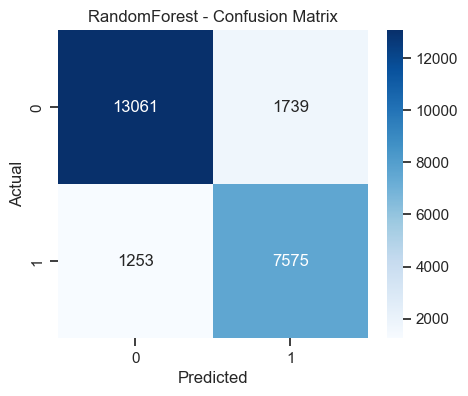


Evaluating: ExtraTrees
F2 Score: 0.8445
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     14800
           1       0.81      0.85      0.83      8828

    accuracy                           0.87     23628
   macro avg       0.86      0.87      0.86     23628
weighted avg       0.87      0.87      0.87     23628



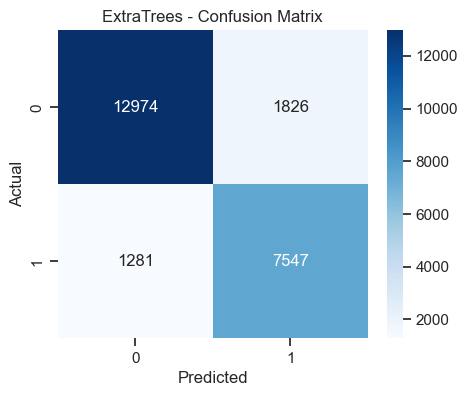


Evaluating: CatBoost
F2 Score: 0.8422
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     14800
           1       0.79      0.86      0.82      8828

    accuracy                           0.86     23628
   macro avg       0.85      0.86      0.85     23628
weighted avg       0.86      0.86      0.86     23628



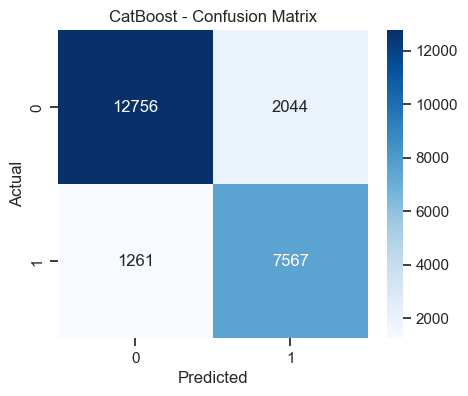


Evaluating: XGBoost
F2 Score: 0.8356
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     14800
           1       0.78      0.85      0.81      8828

    accuracy                           0.85     23628
   macro avg       0.84      0.85      0.85     23628
weighted avg       0.86      0.85      0.86     23628



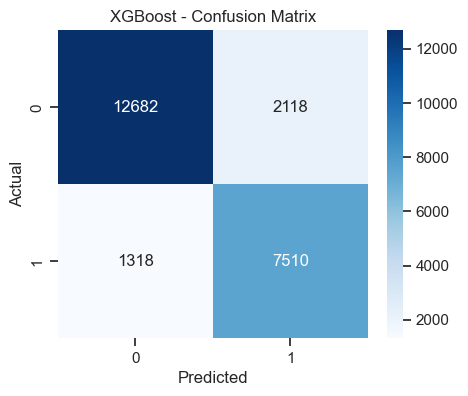

Model   Test F2  Test Recall 0  Test Recall 1  Test Precision 0  \
0  RandomForest  0.848720       0.882500       0.858065          0.912463   
1    ExtraTrees  0.844467       0.876622       0.854894          0.910137   
2      CatBoost  0.842219       0.861892       0.857159          0.910038   
3       XGBoost  0.835559       0.856892       0.850702          0.905857   

   Test Precision 1  
0          0.813292  
1          0.805185  
2          0.787327  
3          0.780017

In [ ]:
# Your base models
model_classes = {
    'RandomForest': RandomForestClassifier,
    'ExtraTrees': ExtraTreesClassifier,
    'XGBoost': XGBClassifier,
    'CatBoost': lambda **kwargs: CatBoostClassifier(verbose=0, allow_writing_files=False, **kwargs)
}

# To store results again
final_results = []

for _, row in results_df.iterrows():
    name = row['Model']
    print(f"\n{'='*50}\nEvaluating: {name}\n{'='*50}")
    
    best_params = row['Best Params']
    base_model_class = model_classes[name]
    
    # Instantiate model with best params (remove 'classifier__' prefix)
    clean_params = {k.replace('classifier__', ''): v for k, v in best_params.items()}
    model = base_model_class(**clean_params)
    
    # Rebuild pipeline
    pipe = ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampler', RandomUnderSampler(random_state=42)),
        ('classifier', model)
    ])
    
    # Fit and predict
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    # Evaluate
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_test = f1_score(y_test, y_pred, pos_label = 1)
    f2_test = fbeta_score(y_test, y_pred, beta=2, pos_label=1)

    final_results.append({
        'Model': name,
        'Test F1': f1_test,
        'Test F2': f2_test,
        'Test Recall 0': report['0']['recall'],
        'Test Recall 1': report['1']['recall'],
        'Test Precision 0': report['0']['precision'],
        'Test Precision 1': report['1']['precision']
    })
    
    # Print report
    print(f"F1 Score: {f1_test:.4f}")
    print(f"F2 Score: {f2_test:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Convert to DataFrame
final_results_df = pd.DataFrame(final_results).sort_values(by='Test F1', ascending=False)
display(final_results_df)

### Best Model

In [181]:
from custom_encoders import BinaryEncoderWrapper

In [182]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat_one', OneHotEncoder(drop='first', handle_unknown='ignore'), [
        'arrival_date_month', 'customer_type', 'deposit_type', 'distribution_channel',
        'hotel', 'is_repeated_guest', 'market_segment', 'meal', 'reserved_room_type'
    ]),
    ('cat_binary', BinaryEncoderWrapper(), ['country'])
])

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90     14800
           1       0.82      0.86      0.84      8828

    accuracy                           0.88     23628
   macro avg       0.86      0.87      0.87     23628
weighted avg       0.88      0.88      0.88     23628

F2 Score: 0.8508349209906982
Accuracy: 0.8752750973421365


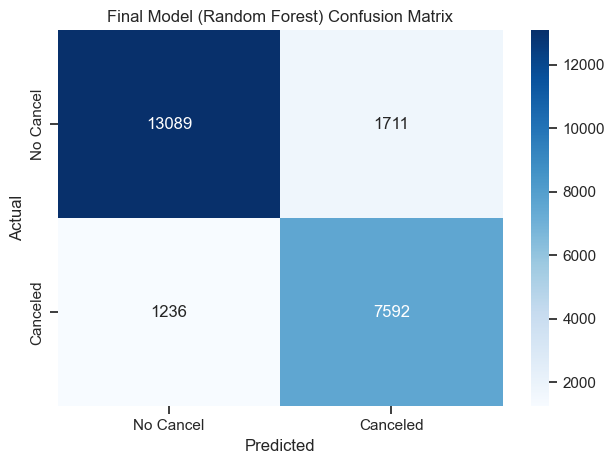

In [183]:
best_model = ImbPipeline([
    ('preprocessor', preprocessor),
    ('undersample', RandomUnderSampler(random_state = 42)),
    ('classifier', RandomForestClassifier(random_state = 42))
])

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluation metrics
print('Classification Report:\n', classification_report(y_test, y_pred))
print('F2 Score:', fbeta_score(y_test, y_pred, beta = 2, pos_label = 1))
print('Accuracy:', accuracy_score(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['No Cancel', 'Canceled'],
            yticklabels = ['No Cancel', 'Canceled'])
plt.title('Final Model (Random Forest) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [184]:
import joblib

# Save the model with optional compression
joblib.dump(best_model, "model.joblib", compress=9)

['model.joblib']

In [231]:
import gzip

with gzip.open('best_model.pkl.gz', 'wb') as file:
    pickle.dump(best_model, file, protocol=pickle.HIGHEST_PROTOCOL)

C:\Users\Dell\AppData\Local\Temp\ipykernel_35336\3308134791.py:14: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  return self.encoder.get_feature_names()


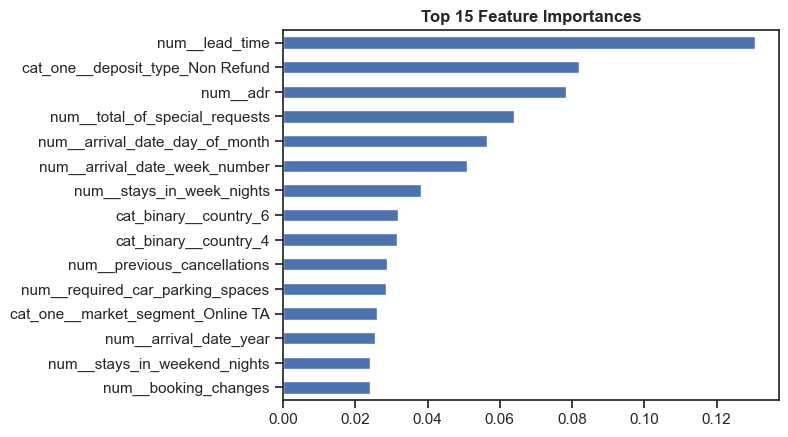

In [228]:
importances = best_model.named_steps['classifier'].feature_importances_
feature_names = preprocessor.get_feature_names_out()
feat_imp_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot top 15 features
feat_imp_series.head(15).plot(kind='barh')
plt.title('Top 15 Feature Importances', fontweight = 'bold')
plt.gca().invert_yaxis()
plt.show()


In [197]:
import shap
shap.initjs()

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Extract the fitted preprocessor and classifier from the pipeline
fitted_preprocessor = best_model.named_steps['preprocessor']
rf_model = best_model.named_steps['classifier']

# Transform the training set using the preprocessor
X_train_transformed = fitted_preprocessor.transform(X_train)

# Get feature names (after encoding)
feature_names = fitted_preprocessor.get_feature_names_out()

# Convert to DataFrame
X_train_trans_df = pd.DataFrame(X_train_transformed.toarray() if hasattr(X_train_transformed, 'toarray') else X_train_transformed,
                                columns = feature_names)

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_trans_df)

C:\Users\Dell\AppData\Local\Temp\ipykernel_33952\3308134791.py:14: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  return self.encoder.get_feature_names()


## **Conclusion and Recommendations**
Based on the in-depth analysis above, below are the conclusions and recommendations:

### **Conclusions**

#### Data Conclusion

📊 Data Conclusion
This project analyzed patterns in hotel booking cancellations using a dataset of over 119,000 bookings from both City Hotel and Resort Hotel. Through extensive exploratory data analysis (EDA) and classification modeling, several key insights and conclusions were drawn:

🔍 Key Findings

1. Cancellation Rate is Substantial
    
    Approximately 37% of all bookings were canceled, with a higher rate in City Hotels than in Resort Hotels. This makes cancellation a non-trivial and important outcome to predict.

2. Lead Time is a Strong Indicator
    
    Longer lead times (days between booking and check-in) are strongly associated with higher cancellation rates, especially for transient guests. This suggests a behavioral pattern where early planners are more likely to change plans.

3. Customer Type and Booking Behavior Matter
    - Transient guests (often solo or one-time customers) tend to cancel more often.
    - Repeated guests show significantly lower cancellation rates, indicating loyalty or stronger commitment.
    - Group bookings, though sometimes large, tend to have lower cancellation rates and need special consideration.

4. Seasonal and Weekly Trends Exist
    
    Cancellations cluster around specific months of the year — especially during peak seasons like summer — suggesting the influence of external events or travel policies.

|Metrics            |Value      |Insight                                         |
|-------------------|-----------|------------------------------------------------|
|Total Bookings     |118,135    |This value captures the total number of reservations from two hotels (Resort Hotel & City Hotel)|
|Average Lead Time  |104.8 Days |The average lead time for guests to book a room is more than 3 months before arrival|
|Total Cancelled    |44,138     |Around 37% bookings were cancelled, which is still significant|
|Cancel Rate        |37.36%     |High value in cancel rate shows the importance in prediction and preventive actions|


Majority of guests booked in this hotel is from Europe with percentage of 90,64%
Countries with the highest number of booking:
- 🇵🇹 Portugal: 40,60%
- 🇬🇧 Britain: 10,24%
- 🇫🇷 France: 8,80%
- 🇪🇸 Spain: 7,23%
- 🇩🇪 Germany: 6,17%

#### Modeling Conclusion

- The Random Forest Classifier with undersampling for class imbalance yielded the best performance when evaluating based on the F1-score, focusing on minimizing false negatives.
- Feature Importances confirmed that lead time, customer type, deposit type, and total special requests were consistently among the top contributors to cancellation prediction.

### **Recommendations**

#### Practical Implications
- Revenue Management Teams can use cancellation predictions to anticipate overbooking needs and adjust pricing strategies.
- Marketing Teams can target customers with high cancellation risk for confirmation follow-ups or incentives to reduce no-shows.
- Booking Platforms can flag risky reservations early and suggest refundable options to mitigate customer dissatisfaction.

#### Business Recommendations
From the analysis, the recommendation 

1. **Optimize Room Type A as the Core Product**
    - Room Type A shows the highest demand across bookings. Ensure consistent availability, especially during peak seasons.
    - Monitor weekly booking trends and implement dynamic room allocation across channels (OTA, direct, corporate) to avoid sellouts.

2. **Implement Upselling Strategy from Room Type A**
    - Design targeted offers (e.g., "Upgrade + Free Breakfast") to encourage customers to move from Room Type A to higher-ADR room types.
    - Engage front-desk staff in check-in upselling, and use pre-arrival email marketing to promote upgrades.

3. **Bundle Low-Demand, High-ADR Rooms**
    - For room types with high ADR but low occupancy, offer value-added packages (e.g., spa, dinner, airport pickup).
    - Use time-based dynamic pricing strategies: early bird or last-minute deals depending on occupancy levels.

4. **Manage Cancellation Risk by Booking Channel**
    - Bookings made via Online Travel Agents (OTAs) show significantly higher cancellation rates. Apply:

        - Stricter deposit or non-refundable policies for OTA bookings.
        - Incentives for customers choosing non-refundable options.

    - Direct bookings and corporate clients tend to be more reliable. Strengthen this segment with:

        - Loyalty programs or exclusive corporate rates.
        - Investment in SEO, email campaigns, and retargeting ads to increase direct bookings.

5. **Leverage Geographic Segmentation and Market Expansion**
    - Focus promotional campaigns and retargeting ads on top-contributing countries:
        🇵🇹 Portugal, 🇬🇧 United Kingdom, 🇫🇷 France.
    - Create localized seasonal packages aligned with local holidays and travel patterns.
    - Countries like China and Brazil, while currently contributing <2%, show potential for international expansion. Consider:
        - Partnerships with travel agencies in those countries.
        - Multilingual marketing content (e.g., Mandarin, Portuguese).

6. **Apply Dynamic Pricing Ahead of High Seasons**
    - Use weekly and monthly trend forecasts to adjust pricing dynamically.
    - Prepare and promote high-season bundles well in advance (3–4 months) to attract international travelers who book early.

7. **Integrate Insights into Daily Operations**
    - Use these insights to build a cancellation prediction model to flag high-risk bookings.
    - Implement early-warning systems for risky bookings and follow up with reminder emails or verification steps.

8. **Empower Teams Through Dashboard Usage**
    - The dashboard supports time-based and segment-based decision-making.
    - Ensure that operations, marketing, and revenue management teams have daily access to the dashboard to:
        - Track real-time cancellation trends.
        - Adjust pricing and room allocation strategies promptly.


#### For Future Improvements
1. Add Customer Satisfaction Metrics
    - Integrate post-stay surveys or review scores (e.g., from Booking.com or TripAdvisor) to explore how satisfaction links with cancellations and booking behavior.
    - Use satisfaction as a target for a second model or as a key segment in analysis.

2. Enhance Feature Engineering
    - Bucket `lead_time`, `stays_in_nights`, and `booking_changes` to capture nonlinear patterns.
    - Use target or frequency encoding for high-cardinality features like country instead of dropping or one-hot encoding.

3. Incorporate Business Cost Perspective
    - Evaluate models not just on recall or F1-score, but on simulated business cost (e.g., overbooking loss, refund risk).
    - Use confusion matrix outcomes to estimate financial tradeoffs.
